# Importing libraries

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extracting data set

In [286]:
df = pd.read_excel(r"C:\Users\navee\Downloads\data.xlsx")

In [287]:
df

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01              present   
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1               assistant manager            Indore      m 1989-10-04   
2                systems engineer           Chennai      f 1992-08-03   
3        senior software engineer           Gurgaon      m 1989-12-05   
4                             get           Manesar      m 1991-02-27   
...                           ...               ...    ...        ...   
3993            software engineer        New Delhi       m 1987-04-15   
3994             technical writer         Hyderabad      f 1992-08-27   
3995  associate software engineer         Bangalore      m 1991-07-03   
3996           software developer  Asifabadbanglore      f 1992-03-20   
3997      senior systems engineer           Chennai      f 1991-02-26   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0            84.30  ...              -1              -1              -1   
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
4            78.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
4         0.09163                -0.1295  
...           ...                    ...  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  
3997      1.

# Data Transformation

In [288]:
df.rename(columns={'Unnamed: 0': 'DataSource'}, inplace=True)

In [289]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

In [290]:
df['DOL'] =df['DOL'].replace('present', '9999-12-31')
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')

C:\Users\navee\AppData\Local\Temp\ipykernel_10360\732515677.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [291]:
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

In [292]:
from datetime import datetime

df['DOJ'] = pd.to_datetime(df['DOJ'])
df['YearsOfExperience'] = (datetime.now() - df['DOJ']).dt.days // 365

In [293]:
df['EmploymentStatus'] = 'Present'  
df.loc[df['DOL'].notna(), 'EmploymentStatus'] = 'Left'

In [294]:
df

DataSource      ID   Salary        DOJ        DOL  \
0         train  203097   420000 2012-06-01        NaT   
1         train  579905   500000 2013-09-01        NaT   
2         train  810601   325000 2014-06-01        NaT   
3         train  267447  1100000 2011-07-01        NaT   
4         train  343523   200000 2014-03-01 2015-03-01   
...         ...     ...      ...        ...        ...   
3993      train   47916   280000 2011-10-01 2012-10-01   
3994      train  752781   100000 2013-07-01 2013-07-01   
3995      train  355888   320000 2013-07-01        NaT   
3996      train  947111   200000 2014-07-01 2015-01-01   
3997      train  324966   400000 2013-02-01        NaT   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1               assistant manager            Indore      m 1989-10-04   
2                systems engineer           Chennai      f 1992-08-03   
3        senior software engineer           Gurgaon      m 1989-12-05   
4                             get           Manesar      m 1991-02-27   
...                           ...               ...    ...        ...   
3993            software engineer        New Delhi       m 1987-04-15   
3994             technical writer         Hyderabad      f 1992-08-27   
3995  associate software engineer         Bangalore      m 1991-07-03   
3996           software developer  Asifabadbanglore      f 1992-03-20   
3997      senior systems engineer           Chennai      f 1991-02-26   

      10percentage  ... ElectricalEngg  TelecomEngg  CivilEngg  \
0            84.30  ...             -1           -1         -1   
1            85.40  ...             -1           -1         -1   
2            85.00  ...             -1           -1         -1   
3            85.60  ...             -1           -1         -1   
4            78.00  ...             -1           -1         -1   
...            ...  ...            ...          ...        ...   
3993         52.09  ...             -1           -1         -1   
3994         90.00  ...             -1           -1         -1   
3995         81.86  ...             -1           -1         -1   
3996         78.72  ...             -1           -1         -1   
3997         70.60  ...             -1           -1         -1   

     conscientiousness  agreeableness  extraversion nueroticism  \
0               0.9737         0.8128        0.5269     1.35490   
1              -0.7335         0.3789        1.2396    -0.10760   
2               0.2718         1.7109        0.1637    -0.86820   
3               0.0464         0.3448       -0.3440    -0.40780   
4              -0.8810        -0.2793       -1.0697     0.09163   
...                ...            ...           ...         ...   
3993           -0.1082         0.3448        0.2366     0.64980   
3994           -0.3027         0.8784        0.9322     0.77980   
3995           -1.5765        -1.5273       -1.5051    -1.31840   
3996           -0.1590         0.0459       -0.4511    -0.36120   
3997           -1.1128        -0.2793       -0.6343     1.32553   

     openess_to_experience  YearsOfExperience  EmploymentStatus  
0                  -0.4455                 11           Present  
1                   0.8637                 10           Present  
2                   0.6721                  9           Present  
3                  -0.9194                 12           Present  
4                  -0.1295                  9              Left  
...                    ...                ...               ...  
3993               -0.9194                 12              Left  
3994               -0.0943                 10              Left  
3995               -0.7615                 10           Present  
3996               -0.0943                  9              Left  
3997               -0.6035                 11           Present  

[3998 rows x 41 columns]

In [295]:
df.head(10)

DataSource       ID   Salary        DOJ        DOL  \
0      train   203097   420000 2012-06-01        NaT   
1      train   579905   500000 2013-09-01        NaT   
2      train   810601   325000 2014-06-01        NaT   
3      train   267447  1100000 2011-07-01        NaT   
4      train   343523   200000 2014-03-01 2015-03-01   
5      train  1027655   300000 2014-06-01        NaT   
6      train   947847   300000 2014-08-01 2015-05-01   
7      train   912934   400000 2014-07-01 2015-07-01   
8      train   552574   600000 2013-07-01        NaT   
9      train  1203363   230000 2014-07-01        NaT   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19         84.30  ...   
1         assistant manager     Indore      m 1989-10-04         85.40  ...   
2          systems engineer    Chennai      f 1992-08-03         85.00  ...   
3  senior software engineer    Gurgaon      m 1989-12-05         85.60  ...   
4                       get    Manesar      m 1991-02-27         78.00  ...   
5           system engineer  Hyderabad      m 1992-07-02         89.92  ...   
6    java software engineer   Banglore      m 1993-02-01         86.08  ...   
7       mechanical engineer  Bangalore      m 1992-05-27         92.00  ...   
8       electrical engineer      Noida      m 1991-09-17         90.00  ...   
9          project engineer    Kolkata      m 1993-06-13         77.00  ...   

  ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  agreeableness  \
0             -1           -1         -1            0.9737         0.8128   
1             -1           -1         -1           -0.7335         0.3789   
2             -1           -1         -1            0.2718         1.7109   
3             -1           -1         -1            0.0464         0.3448   
4             -1           -1         -1           -0.8810        -0.2793   
5             -1           -1         -1           -0.3027        -0.6201   
6             -1           -1         -1            1.7081        -0.1054   
7             -1           -1         -1           -0.0154         1.2114   
8             -1           -1         -1           -0.1590         0.5454   
9             -1           -1         -1           -1.3080         0.5454   

   extraversion nueroticism openess_to_experience  YearsOfExperience  \
0        0.5269     1.35490               -0.4455                 11   
1        1.2396    -0.10760                0.8637                 10   
2        0.1637    -0.86820                0.6721                  9   
3       -0.3440    -0.40780               -0.9194                 12   
4       -1.0697     0.09163               -0.1295                  9   
5       -2.2954    -0.74150               -0.8608                  9   
6       -1.0379    -2.00920               -1.0872                  9   
7        0.0100     0.14590                1.2470                  9   
8       -0.6048    -0.74150               -0.2859                 10   
9       -0.9122     0.90660                0.0973                  9   

   EmploymentStatus  
0           Present  
1           Present  
2           Present  
3           Present  
4              Left  
5           Present  
6              Left  
7              Left  
8           Present  
9           Present  

[10 rows x 41 columns]

In [296]:
df.shape

(3998, 41)

In [297]:
print("No of colums",df.shape[0])
print("No of rows",df.shape[1])

No of colums 3998
No of rows 41


In [298]:
df.isnull()

DataSource     ID  Salary    DOJ    DOL  Designation  JobCity  Gender  \
0          False  False   False  False   True        False    False   False   
1          False  False   False  False   True        False    False   False   
2          False  False   False  False   True        False    False   False   
3          False  False   False  False   True        False    False   False   
4          False  False   False  False  False        False    False   False   
...          ...    ...     ...    ...    ...          ...      ...     ...   
3993       False  False   False  False  False        False    False   False   
3994       False  False   False  False  False        False    False   False   
3995       False  False   False  False   True        False    False   False   
3996       False  False   False  False  False        False    False   False   
3997       False  False   False  False   True        False    False   False   

        DOB  10percentage  ...  ElectricalEngg  TelecomEngg  CivilEngg  \
0     False         False  ...           False        False      False   
1     False         False  ...           False        False      False   
2     False         False  ...           False        False      False   
3     False         False  ...           False        False      False   
4     False         False  ...           False        False      False   
...     ...           ...  ...             ...          ...        ...   
3993  False         False  ...           False        False      False   
3994  False         False  ...           False        False      False   
3995  False         False  ...           False        False      False   
3996  False         False  ...           False        False      False   
3997  False         False  ...           False        False      False   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0                 False          False         False        False   
1                 False          False         False        False   
2                 False          False         False        False   
3                 False          False         False        False   
4                 False          False         False        False   
...                 ...            ...           ...          ...   
3993              False          False         False        False   
3994              False          False         False        False   
3995              False          False         False        False   
3996              False          False         False        False   
3997              False          False         False        False   

      openess_to_experience  YearsOfExperience  EmploymentStatus  
0                     False              False             False  
1                     False              False             False  
2                     False              False             False  
3                     False              False             False  
4                     False              False             False  
...                     ...                ...               ...  
3993                  False              False             False  
3994                  False              False             False  
3995                  False              False             False  
3996                  False              False             False  
3997                  False              False             False  

[3998 rows x 41 columns]

In [299]:
df.head()

DataSource      ID   Salary        DOJ        DOL               Designation  \
0      train  203097   420000 2012-06-01        NaT   senior quality engineer   
1      train  579905   500000 2013-09-01        NaT         assistant manager   
2      train  810601   325000 2014-06-01        NaT          systems engineer   
3      train  267447  1100000 2011-07-01        NaT  senior software engineer   
4      train  343523   200000 2014-03-01 2015-03-01                       get   

     JobCity Gender        DOB  10percentage  ... ElectricalEngg  TelecomEngg  \
0  Bangalore      f 1990-02-19          84.3  ...             -1           -1   
1     Indore      m 1989-10-04          85.4  ...             -1           -1   
2    Chennai      f 1992-08-03          85.0  ...             -1           -1   
3    Gurgaon      m 1989-12-05          85.6  ...             -1           -1   
4    Manesar      m 1991-02-27          78.0  ...             -1           -1   

   CivilEngg conscientiousness  agreeableness  extraversion nueroticism  \
0         -1            0.9737         0.8128        0.5269     1.35490   
1         -1           -0.7335         0.3789        1.2396    -0.10760   
2         -1            0.2718         1.7109        0.1637    -0.86820   
3         -1            0.0464         0.3448       -0.3440    -0.40780   
4         -1           -0.8810        -0.2793       -1.0697     0.09163   

  openess_to_experience  YearsOfExperience  EmploymentStatus  
0               -0.4455                 11           Present  
1                0.8637                 10           Present  
2                0.6721                  9           Present  
3               -0.9194                 12           Present  
4               -0.1295                  9              Left  

[5 rows x 41 columns]

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DataSource             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    2123 non-null   datetime64[ns]
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

# EDA

In [301]:
df.describe()

ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min    1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max    1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

                                 DOL                            DOB  \
count                           2123                           3998   
mean   2014-07-18 09:29:45.586434304  1990-12-06 06:01:15.637819008   
min              2005-03-01 00:00:00            1977-10-30 00:00:00   
25%              2014-03-01 00:00:00            1989-11-16 06:00:00   
50%              2014-12-01 00:00:00            1991-03-07 12:00:00   
75%              2015-04-01 00:00:00            1992-03-13 18:00:00   
max              2015-12-01 00:00:00            1997-05-27 00:00:00   
std                              NaN                            NaN   

       10percentage  12graduation  12percentage     CollegeID  CollegeTier  \
count   3998.000000   3998.000000   3998.000000   3998.000000  3998.000000   
mean      77.925443   2008.087544     74.466366   5156.851426     1.925713   
min       43.000000   1995.000000     40.000000      2.000000     1.000000   
25%       71.680000   2007.000000     66.000000    494.000000     2.000000   
50%       79.150000   2008.000000     74.400000   3879.000000     2.000000   
75%       85.670000   2009.000000     82.600000   8818.000000     2.000000   
max       97.760000   2013.000000     98.700000  18409.000000     2.000000   
std        9.850162      1.653599     10.999933   4802.261482     0.262270   

       ...  MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count  ...     3998.000000     3998.000000  3998.000000  3998.000000   
mean   ...       22.974737       16.478739    31.851176     2.683842   
min    ...       -1.000000       -1.000000    -1.000000    -1.000000   
25%    ...       -1.000000       -1.000000    -1.000000    -1.000000   
50%    ...       -1.000000       -1.000000    -1.000000    -1.000000   
75%    ...       -1.000000       -1.000000    -1.000000    -1.000000   
max    ...      623.000000      676.000000   548.000000   516.000000   
std    ...       98.123311       87.585634   104.852845    36.658505   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        3998.000000    3998.000000   3998.000000  3998.000000   
mean           -0.037831       0.146496      0.002763    -0.169033   
min            -4.126700      -5.781600     -4.600900    -2.643000   
25%            -0.713525      -0.287100     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.234400   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.535400     3.352500   
std             1.028666       0.941782      0.951471     1.007580   

       openess_to_experience  YearsOfExperience  
count            3998.000000        3998.000000  
mean               -0.138110          10.128564  
min                -7.375700           8.000000  
25%                -0.669200           9.000000  
50%                -0.094300          10.000000  
75%                 0.502400          11.000000  
max                 1.822400          32.000000  
std                 1.008075           1.313687  

[8 rows x 31 columns]

In [302]:
df.replace(-1, 0, inplace=True)

In [303]:
df

DataSource      ID   Salary        DOJ        DOL  \
0         train  203097   420000 2012-06-01        NaT   
1         train  579905   500000 2013-09-01        NaT   
2         train  810601   325000 2014-06-01        NaT   
3         train  267447  1100000 2011-07-01        NaT   
4         train  343523   200000 2014-03-01 2015-03-01   
...         ...     ...      ...        ...        ...   
3993      train   47916   280000 2011-10-01 2012-10-01   
3994      train  752781   100000 2013-07-01 2013-07-01   
3995      train  355888   320000 2013-07-01        NaT   
3996      train  947111   200000 2014-07-01 2015-01-01   
3997      train  324966   400000 2013-02-01        NaT   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1               assistant manager            Indore      m 1989-10-04   
2                systems engineer           Chennai      f 1992-08-03   
3        senior software engineer           Gurgaon      m 1989-12-05   
4                             get           Manesar      m 1991-02-27   
...                           ...               ...    ...        ...   
3993            software engineer        New Delhi       m 1987-04-15   
3994             technical writer         Hyderabad      f 1992-08-27   
3995  associate software engineer         Bangalore      m 1991-07-03   
3996           software developer  Asifabadbanglore      f 1992-03-20   
3997      senior systems engineer           Chennai      f 1991-02-26   

      10percentage  ... ElectricalEngg  TelecomEngg  CivilEngg  \
0            84.30  ...              0            0          0   
1            85.40  ...              0            0          0   
2            85.00  ...              0            0          0   
3            85.60  ...              0            0          0   
4            78.00  ...              0            0          0   
...            ...  ...            ...          ...        ...   
3993         52.09  ...              0            0          0   
3994         90.00  ...              0            0          0   
3995         81.86  ...              0            0          0   
3996         78.72  ...              0            0          0   
3997         70.60  ...              0            0          0   

     conscientiousness  agreeableness  extraversion nueroticism  \
0               0.9737         0.8128        0.5269     1.35490   
1              -0.7335         0.3789        1.2396    -0.10760   
2               0.2718         1.7109        0.1637    -0.86820   
3               0.0464         0.3448       -0.3440    -0.40780   
4              -0.8810        -0.2793       -1.0697     0.09163   
...                ...            ...           ...         ...   
3993           -0.1082         0.3448        0.2366     0.64980   
3994           -0.3027         0.8784        0.9322     0.77980   
3995           -1.5765        -1.5273       -1.5051    -1.31840   
3996           -0.1590         0.0459       -0.4511    -0.36120   
3997           -1.1128        -0.2793       -0.6343     1.32553   

     openess_to_experience  YearsOfExperience  EmploymentStatus  
0                  -0.4455                 11           Present  
1                   0.8637                 10           Present  
2                   0.6721                  9           Present  
3                  -0.9194                 12           Present  
4                  -0.1295                  9              Left  
...                    ...                ...               ...  
3993               -0.9194                 12              Left  
3994               -0.0943                 10              Left  
3995               -0.7615                 10           Present  
3996               -0.0943                  9              Left  
3997               -0.6035                 11           Present  

[3998 rows x 41 columns]

In [304]:
df[['MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].head(30)

MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg
0                0               0            0          0
1                0               0            0          0
2                0               0            0          0
3                0               0            0          0
4                0               0            0          0
5                0               0            0          0
6                0               0            0          0
7              469               0            0          0
8                0               0            0          0
9                0               0            0          0
10               0               0            0          0
11               0               0            0          0
12               0               0          206          0
13               0               0            0          0
14               0               0            0          0
15               0               0            0          0
16               0               0            0          0
17               0               0            0          0
18               0               0            0          0
19               0               0            0          0
20               0               0            0          0
21               0               0            0          0
22               0               0            0          0
23               0               0            0          0
24               0               0            0          0
25               0               0            0          0
26             313               0            0        320
27               0               0            0          0
28               0               0          313          0
29               0               0            0          0

In [305]:
df.isna().sum()

DataSource                  0
ID                          0
Salary                      0
DOJ                         0
DOL                      1875
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg 

In [306]:
df[['DOL']]

DOL
0           NaT
1           NaT
2           NaT
3           NaT
4    2015-03-01
...         ...
3993 2012-10-01
3994 2013-07-01
3995        NaT
3996 2015-01-01
3997        NaT

[3998 rows x 1 columns]

In [307]:
df.replace(pd.NaT, 'Not Applicable', inplace=True)

In [308]:
df.isna().sum()

DataSource               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [309]:
df.describe()

ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min    1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max    1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

                                 DOB  10percentage  12graduation  \
count                           3998   3998.000000   3998.000000   
mean   1990-12-06 06:01:15.637819008     77.925443   2008.087544   
min              1977-10-30 00:00:00     43.000000   1995.000000   
25%              1989-11-16 06:00:00     71.680000   2007.000000   
50%              1991-03-07 12:00:00     79.150000   2008.000000   
75%              1992-03-13 18:00:00     85.670000   2009.000000   
max              1997-05-27 00:00:00     97.760000   2013.000000   
std                              NaN      9.850162      1.653599   

       12percentage     CollegeID  CollegeTier   collegeGPA  ...  \
count   3998.000000   3998.000000  3998.000000  3998.000000  ...   
mean      74.466366   5156.851426     1.925713    71.486171  ...   
min       40.000000      2.000000     1.000000     6.450000  ...   
25%       66.000000    494.000000     2.000000    66.407500  ...   
50%       74.400000   3879.000000     2.000000    71.720000  ...   
75%       82.600000   8818.000000     2.000000    76.327500  ...   
max       98.700000  18409.000000     2.000000    99.930000  ...   
std       10.999933   4802.261482     0.262270     8.167338  ...   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count     3998.000000     3998.000000  3998.000000  3998.000000   
mean        23.915958       17.438469    32.757629     3.673337   
min          0.000000        0.000000     0.000000     0.000000   
25%          0.000000        0.000000     0.000000     0.000000   
50%          0.000000        0.000000     0.000000     0.000000   
75%          0.000000        0.000000     0.000000     0.000000   
max        623.000000      676.000000   548.000000   516.000000   
std         97.893295       87.394072   104.568796    36.559052   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        3998.000000    3998.000000   3998.000000  3998.000000   
mean           -0.037831       0.146496      0.002763    -0.169033   
min            -4.126700      -5.781600     -4.600900    -2.643000   
25%            -0.713525      -0.287100     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.234400   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.535400     3.352500   
std             1.028666       0.941782      0.951471     1.007580   

       openess_to_experience  YearsOfExperience  
count            3998.000000        3998.000000  
mean               -0.138110          10.128564  
min                -7.375700           8.000000  
25%                -0.669200           9.000000  
50%                -0.094300          10.000000  
75%                 0.502400          11.000000  
max                 1.822400          32.000000  
std                 1.008075           1.313687  

[8 rows x 30 columns]

In [310]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
            cat.append(column)

In [311]:
cat

['DataSource',
 'Gender',
 'CollegeTier',
 'Degree',
 'CollegeCityTier',
 'EmploymentStatus']

In [312]:
num_df = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = min(len(num), 5)

In [313]:
num

['ID',
 'Salary',
 'DOJ',
 'DOL',
 'Designation',
 'JobCity',
 'DOB',
 '10percentage',
 '10board',
 '12graduation',
 '12percentage',
 '12board',
 'CollegeID',
 'Specialization',
 'collegeGPA',
 'CollegeCityID',
 'CollegeState',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'YearsOfExperience']

In [314]:
cat

['DataSource',
 'Gender',
 'CollegeTier',
 'Degree',
 'CollegeCityTier',
 'EmploymentStatus']

In [315]:
num_columns

5

In [316]:
cat

['DataSource',
 'Gender',
 'CollegeTier',
 'Degree',
 'CollegeCityTier',
 'EmploymentStatus']

In [317]:
df.head()

DataSource      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01       Not Applicable   
1      train  579905   500000 2013-09-01       Not Applicable   
2      train  810601   325000 2014-06-01       Not Applicable   
3      train  267447  1100000 2011-07-01       Not Applicable   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  agreeableness  \
0              0            0          0            0.9737         0.8128   
1              0            0          0           -0.7335         0.3789   
2              0            0          0            0.2718         1.7109   
3              0            0          0            0.0464         0.3448   
4              0            0          0           -0.8810        -0.2793   

   extraversion nueroticism openess_to_experience  YearsOfExperience  \
0        0.5269     1.35490               -0.4455                 11   
1        1.2396    -0.10760                0.8637                 10   
2        0.1637    -0.86820                0.6721                  9   
3       -0.3440    -0.40780               -0.9194                 12   
4       -1.0697     0.09163               -0.1295                  9   

   EmploymentStatus  
0           Present  
1           Present  
2           Present  
3           Present  
4              Left  

[5 rows x 41 columns]

In [318]:
df["Salary"]

0        420000
1        500000
2        325000
3       1100000
4        200000
         ...   
3993     280000
3994     100000
3995     320000
3996     200000
3997     400000
Name: Salary, Length: 3998, dtype: int64

# Univariate Analysis
# Histogram plots using Seaborn. It visualizes the distribution of numerical columns

C:\Users\navee\AppData\Local\Temp\ipykernel_10360\2184033872.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



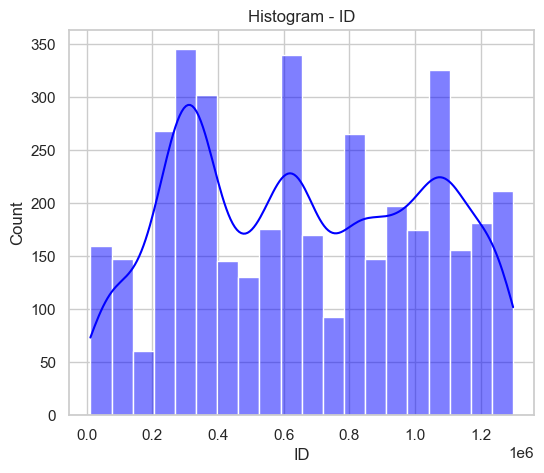

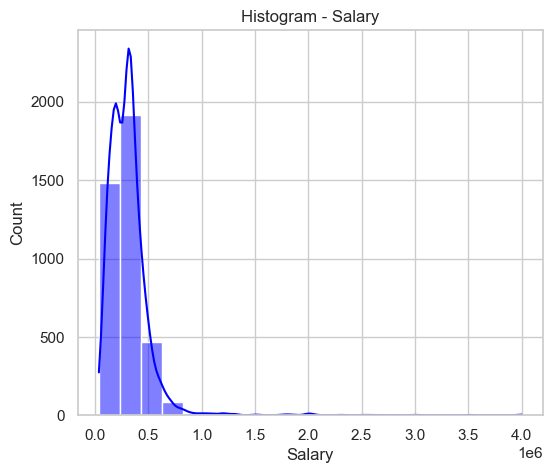

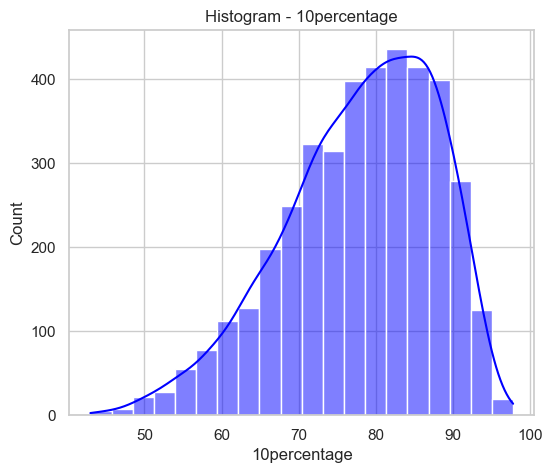

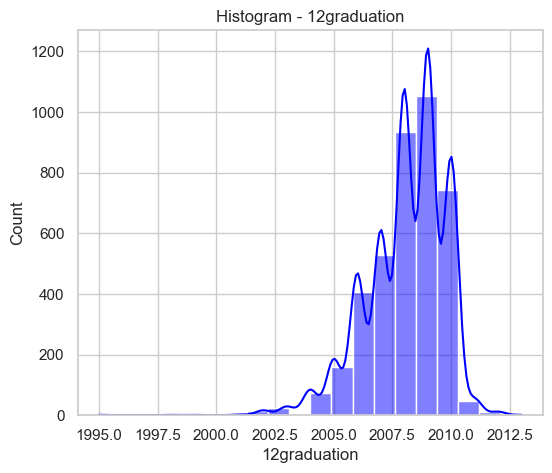

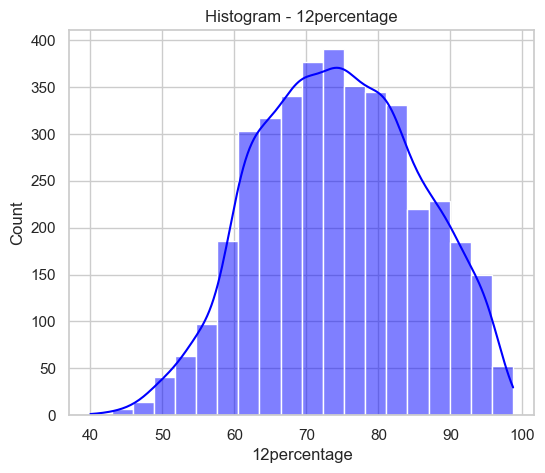

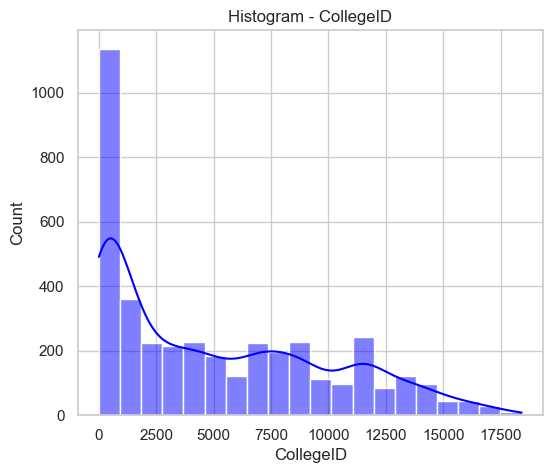

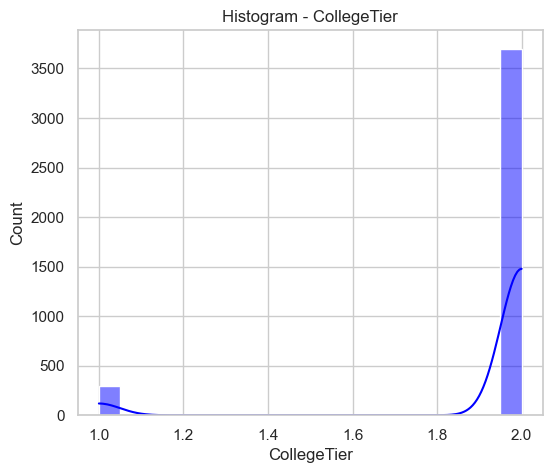

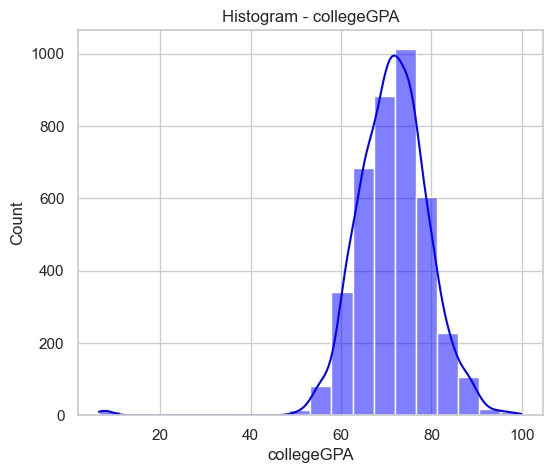

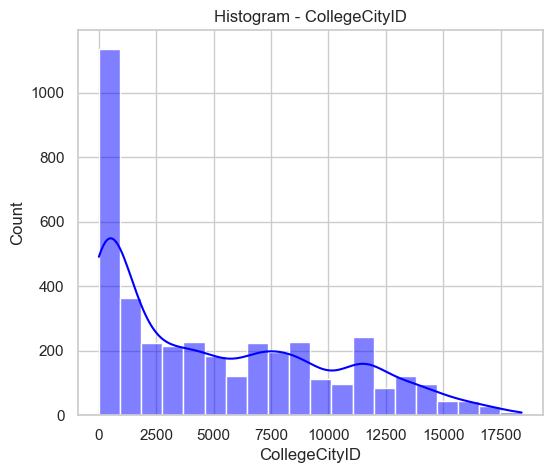

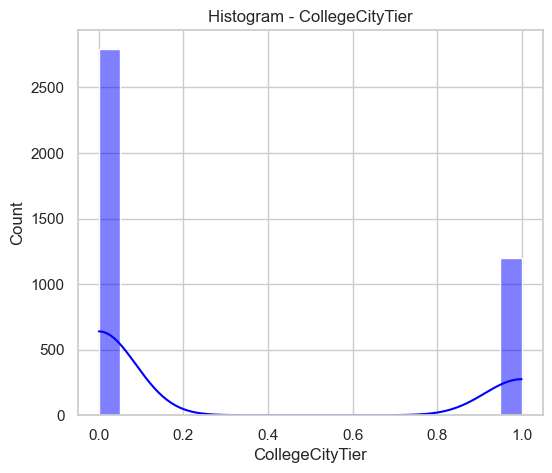

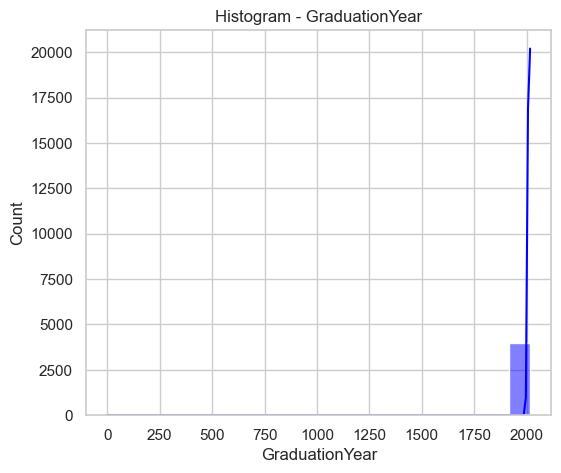

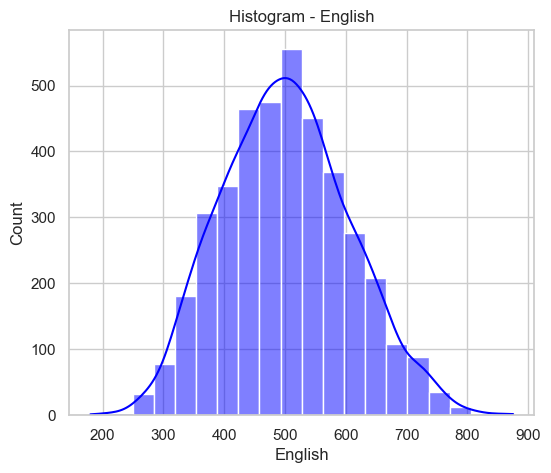

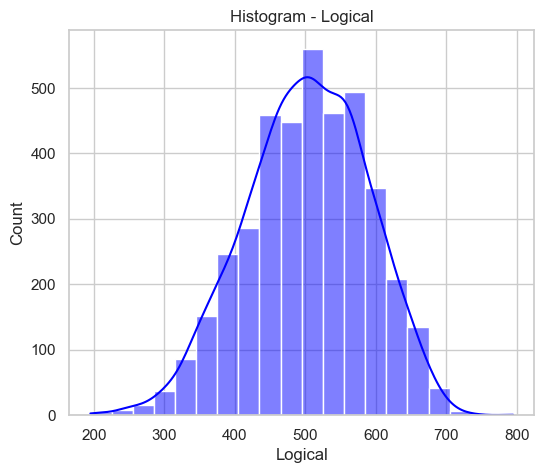

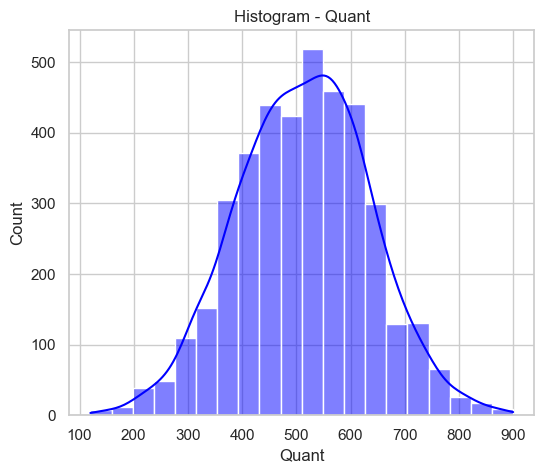

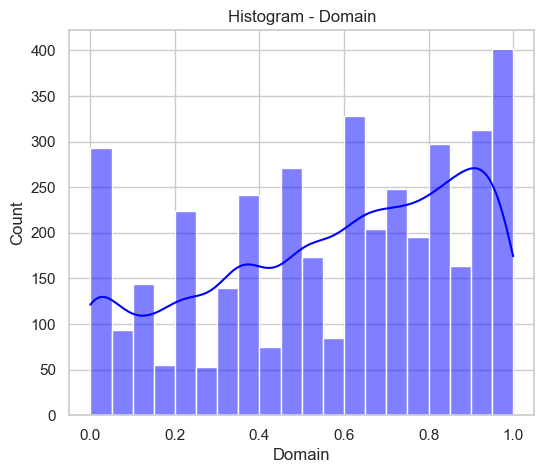

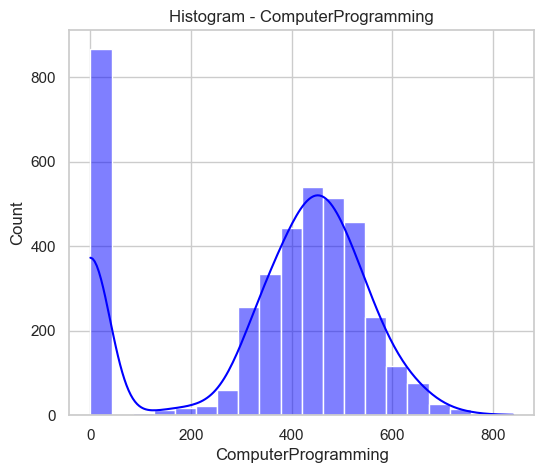

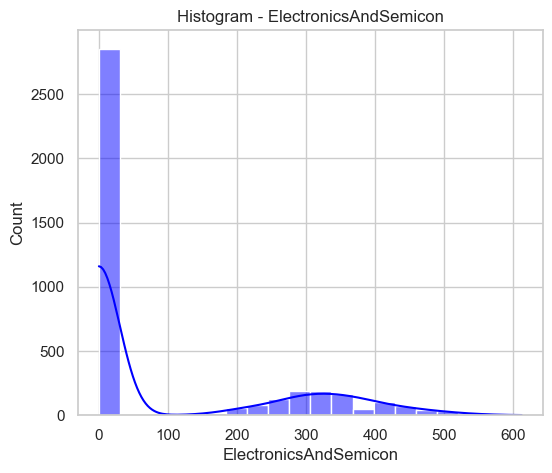

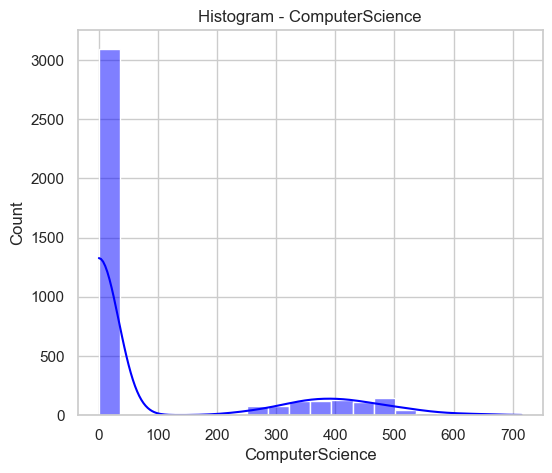

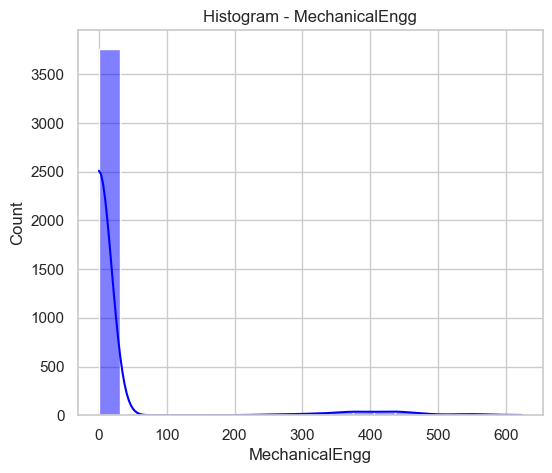

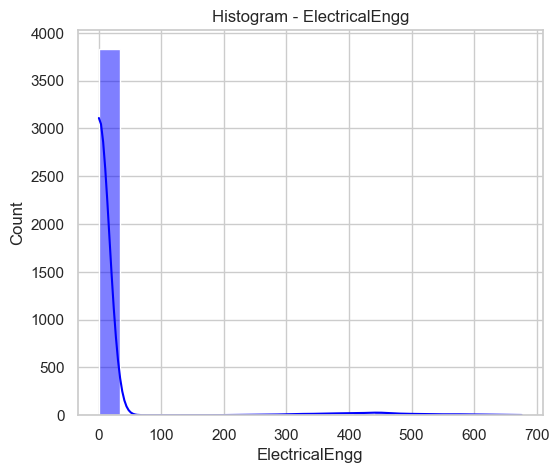

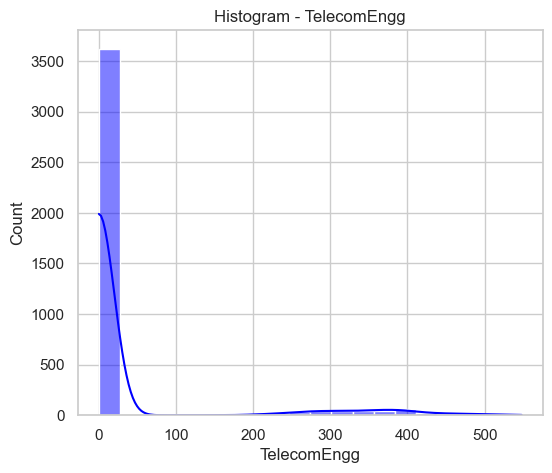

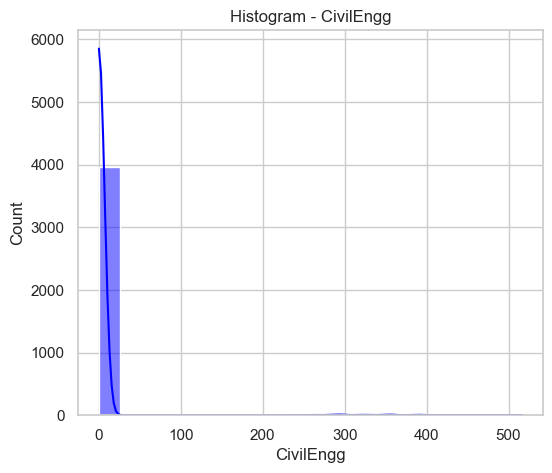

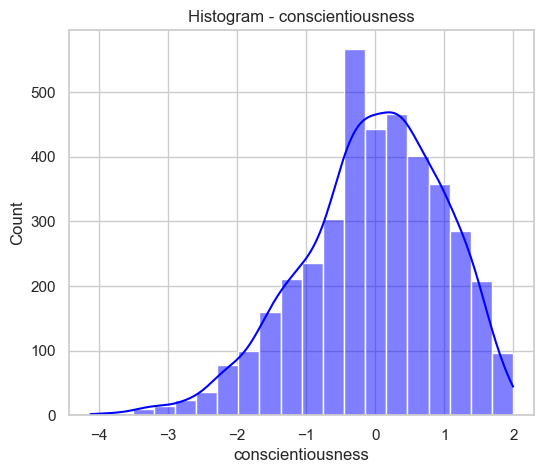

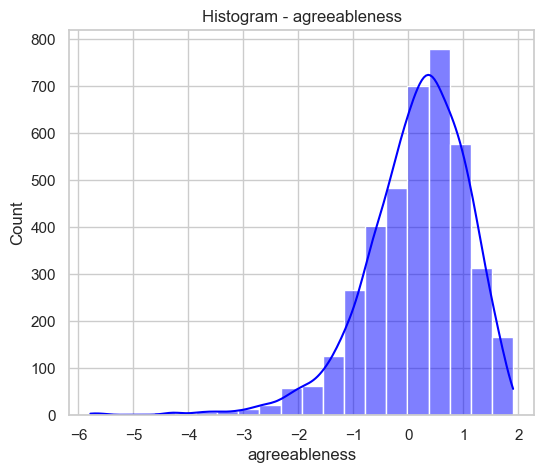

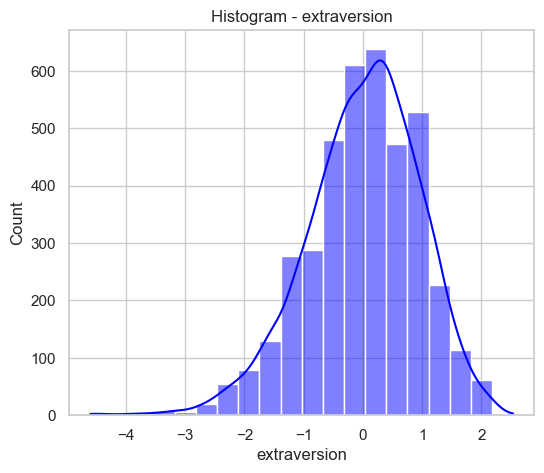

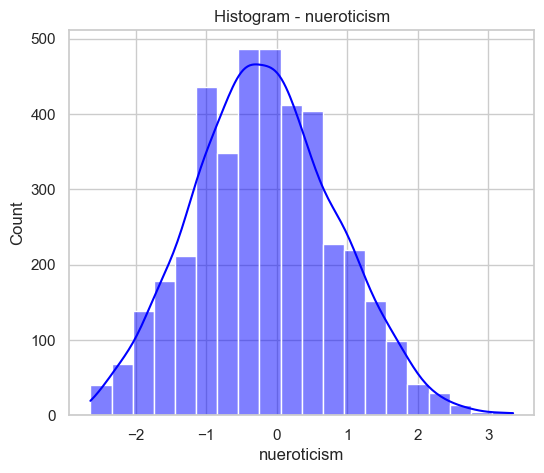

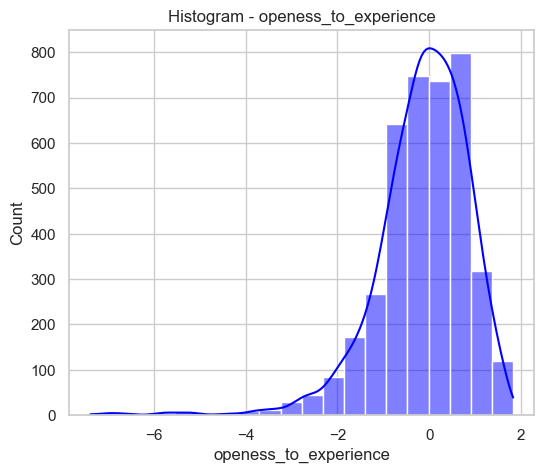

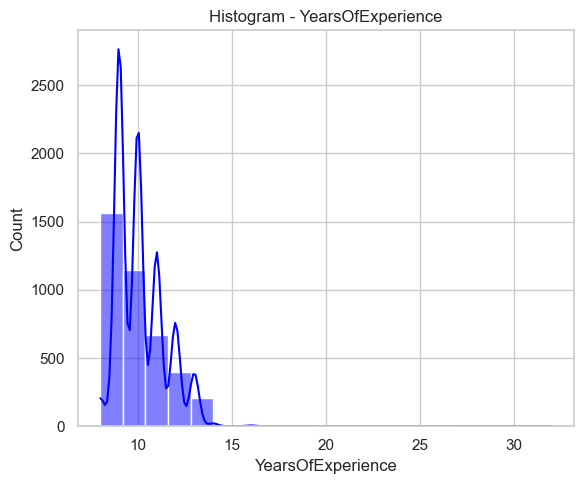

In [319]:
for i, column in enumerate(num_df,1):
    plt.figure(figsize=(6,5))
    sns.histplot(df[column], bins=20, kde=True, color='blue')
    plt.title(f"Histogram - {column}")
plt.tight_layout()
plt.show()

In [320]:
df["Salary"].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

# observations:-
#### 1. The dataset contains both categorical and numerical columns.
#### 2. The 'Salary' column seems to be of particular interest, as it's used for visualizations.
#### 3. The dataset does not seem to have any missing values based on the 'df.isnull()' check.
#### 4. Histograms have been plotted for the 'Salary' column, providing insights into its distribution.
#### 5. The histograms show that the salary data is right-skewed, with a majority of values clustered towards the lower end of the salary range.

# AMCAT Scores

In [321]:
scores = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'] 
standard_scores = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'] 

In [322]:
df[scores].describe()

English      Logical        Quant       Domain  \
count  3998.000000  3998.000000  3998.000000  3998.000000   
mean    501.649075   501.598799   513.378189     0.572020   
std     104.940021    86.783297   122.302332     0.302460   
min     180.000000   195.000000   120.000000     0.000000   
25%     425.000000   445.000000   430.000000     0.342315   
50%     500.000000   505.000000   515.000000     0.622643   
75%     570.000000   565.000000   595.000000     0.842248   
max     875.000000   795.000000   900.000000     0.999910   

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count          3998.000000            3998.000000      3998.000000   
mean            353.319910              96.042271        91.516758   
std             204.981129             157.806602       174.867677   
min               0.000000               0.000000         0.000000   
25%             295.000000               0.000000         0.000000   
50%             415.000000               0.000000         0.000000   
75%             495.000000             233.000000         0.000000   
max             840.000000             612.000000       715.000000   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  
count     3998.000000     3998.000000  3998.000000  3998.000000  
mean        23.915958       17.438469    32.757629     3.673337  
std         97.893295       87.394072   104.568796    36.559052  
min          0.000000        0.000000     0.000000     0.000000  
25%          0.000000        0.000000     0.000000     0.000000  
50%          0.000000        0.000000     0.000000     0.000000  
75%          0.000000        0.000000     0.000000     0.000000  
max        623.000000      676.000000   548.000000   516.000000

# boxplot plots using Seaborn. It visualizes the distribution of numerical columns in the DataFrame

C:\Users\navee\AppData\Local\Temp\ipykernel_10360\2022127867.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



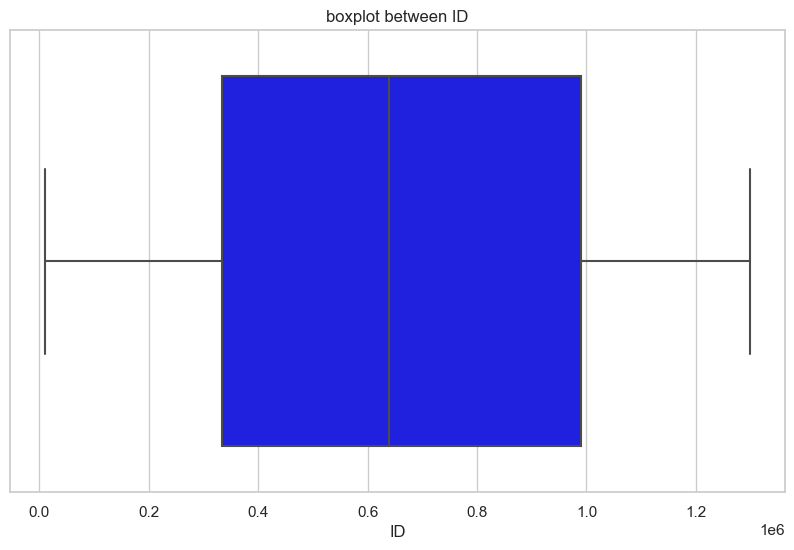

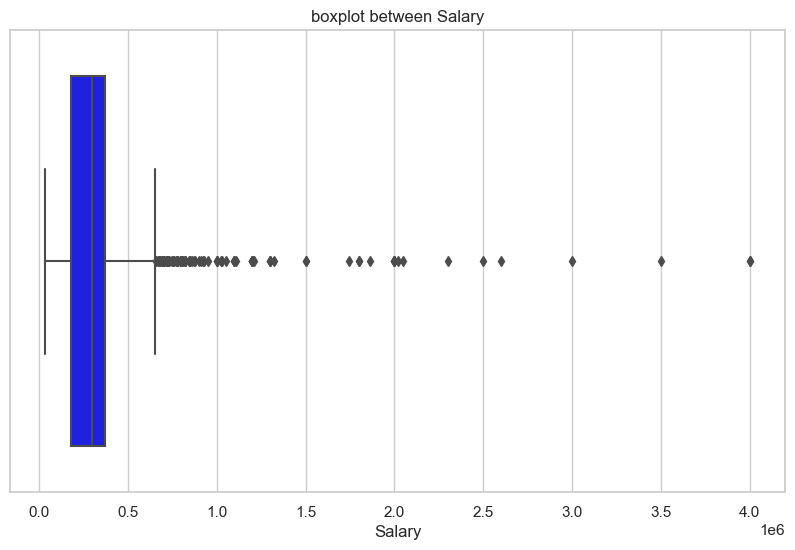

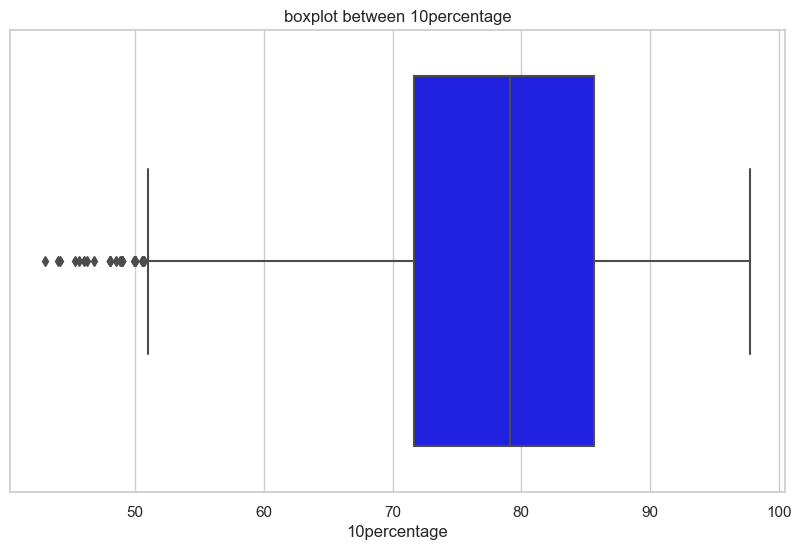

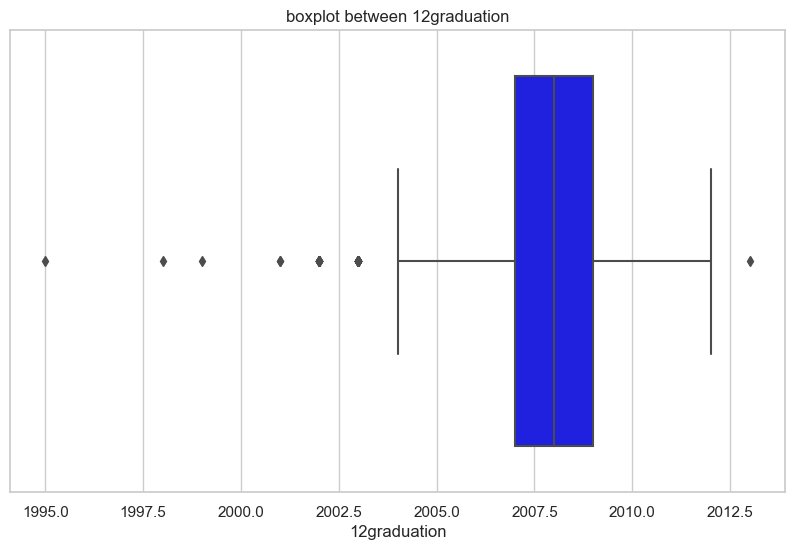

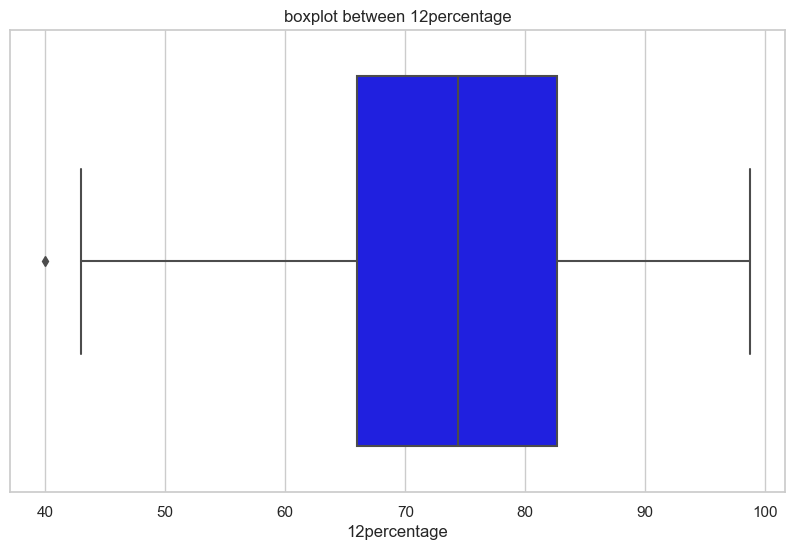

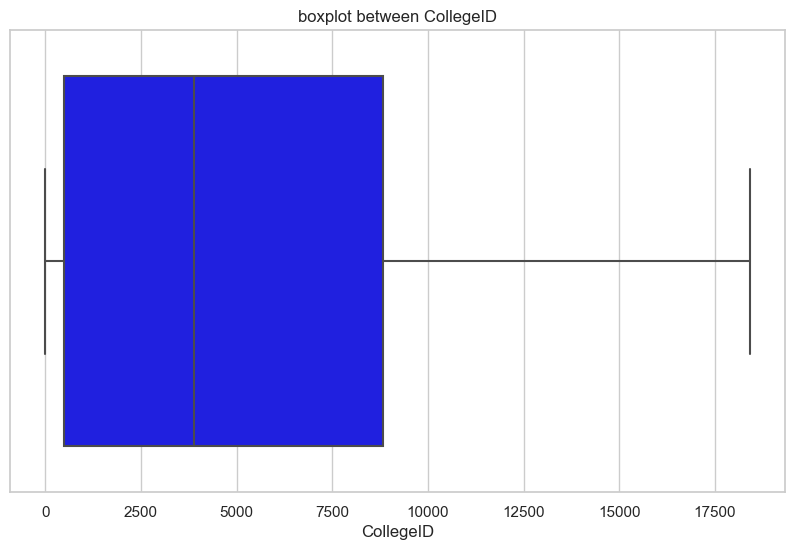

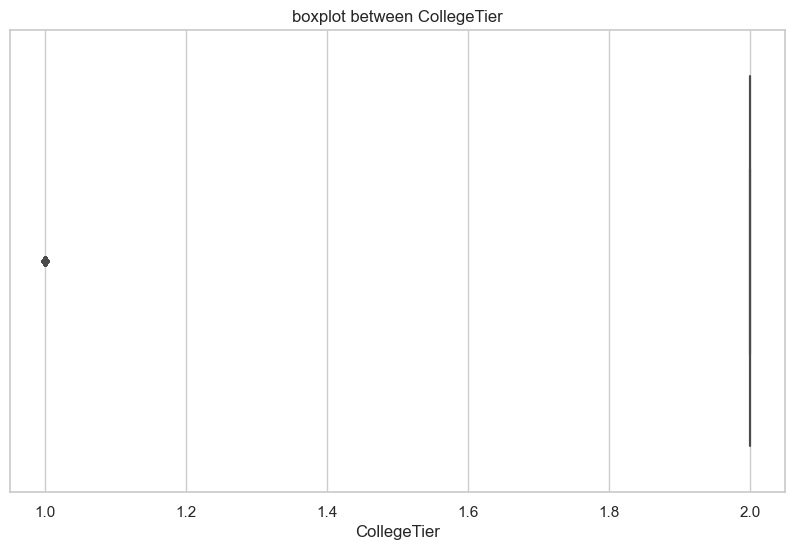

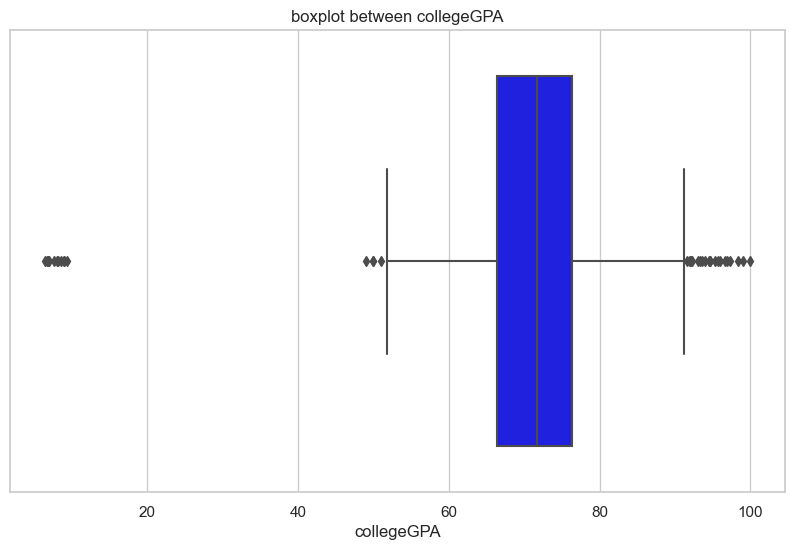

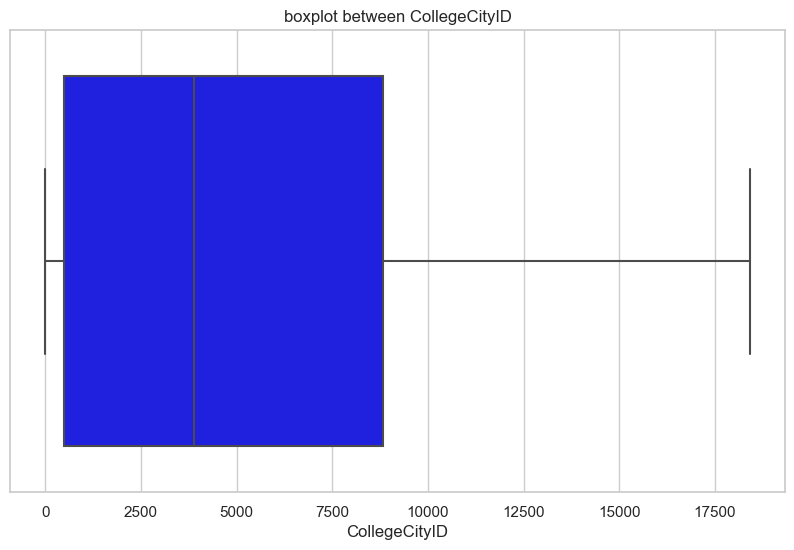

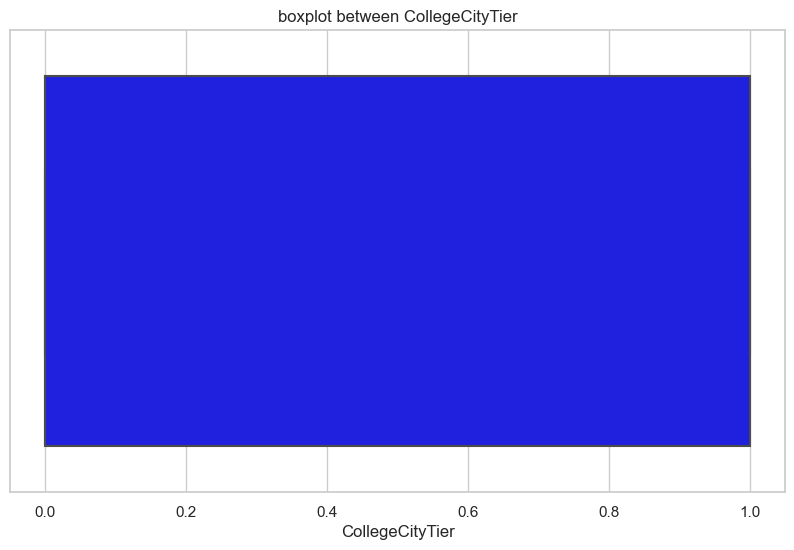

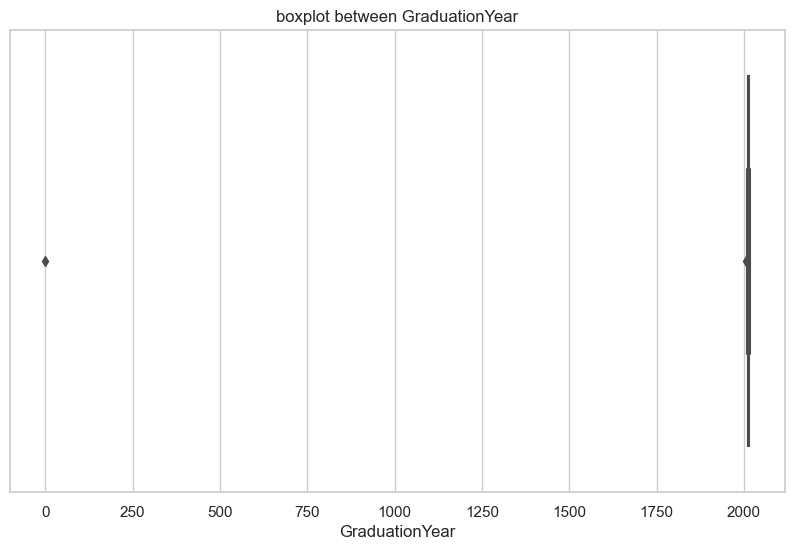

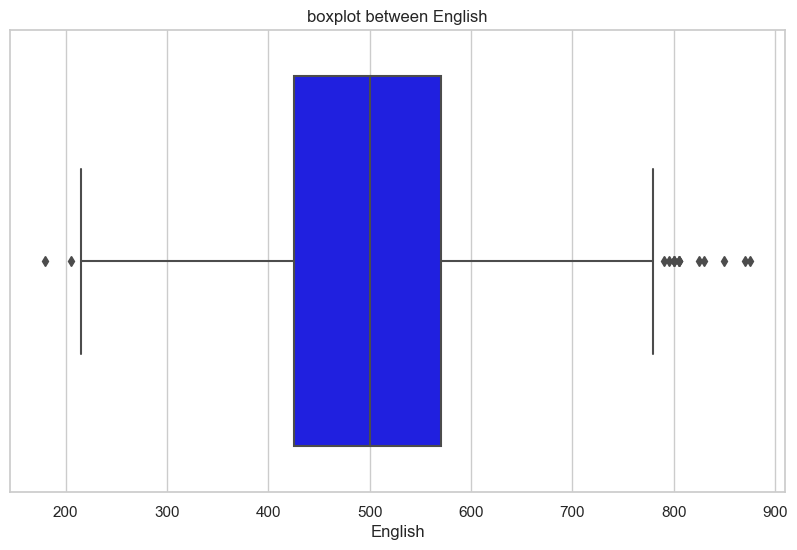

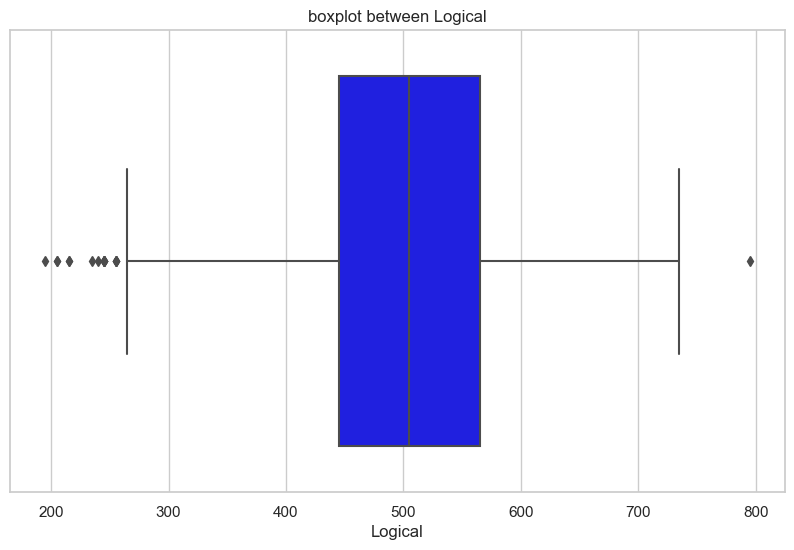

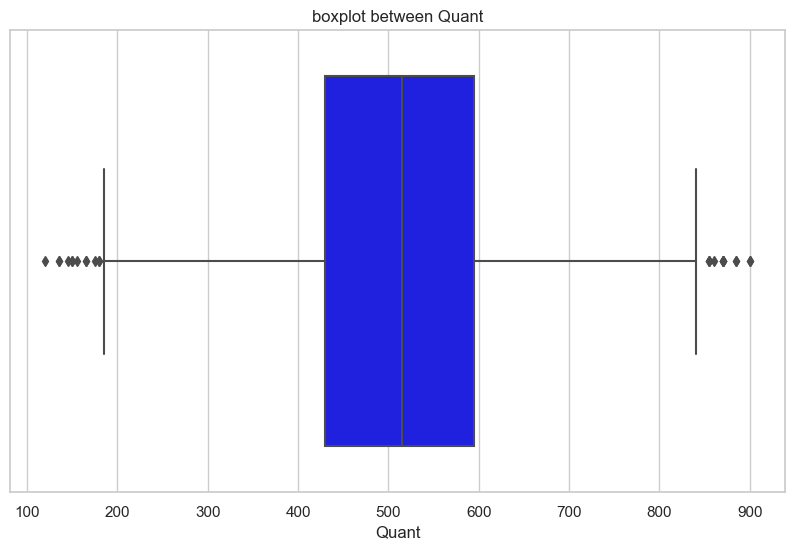

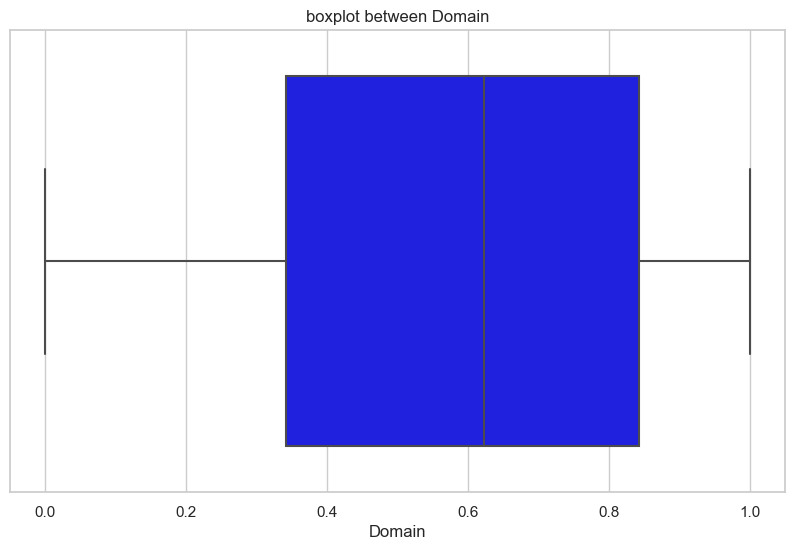

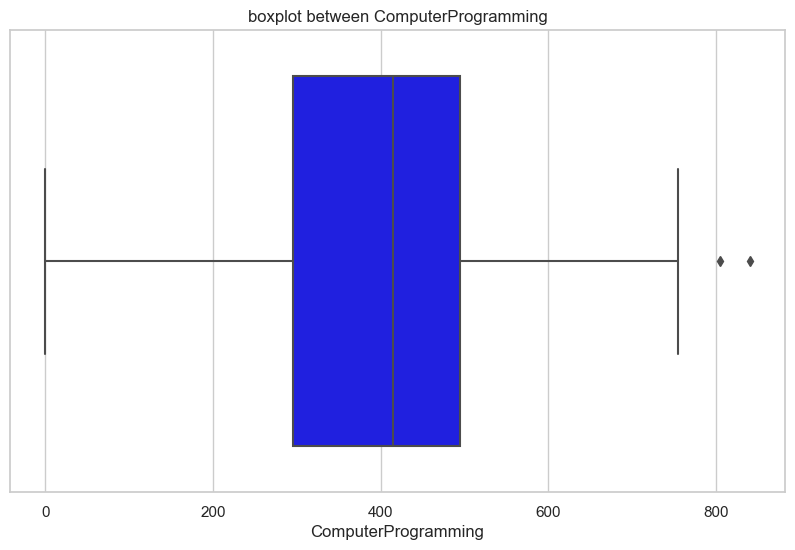

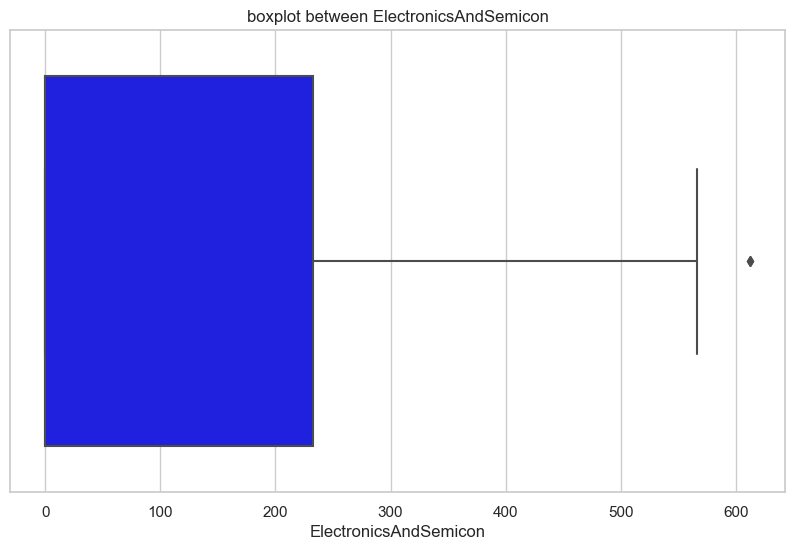

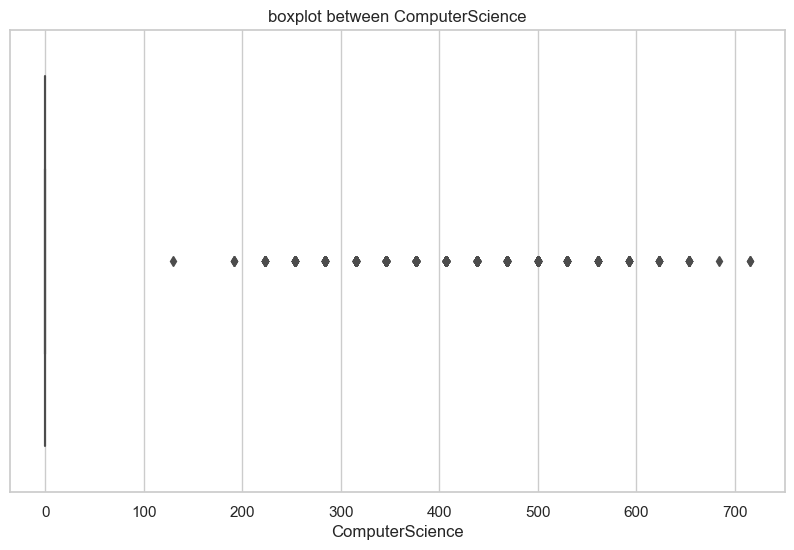

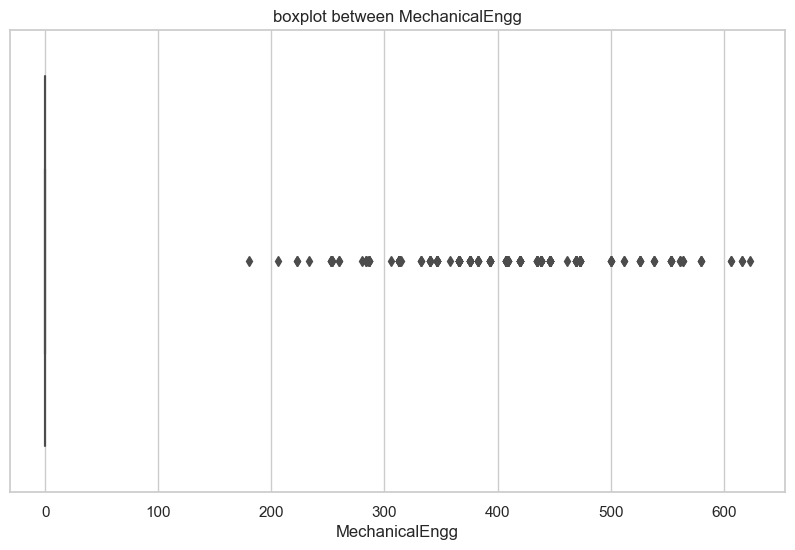

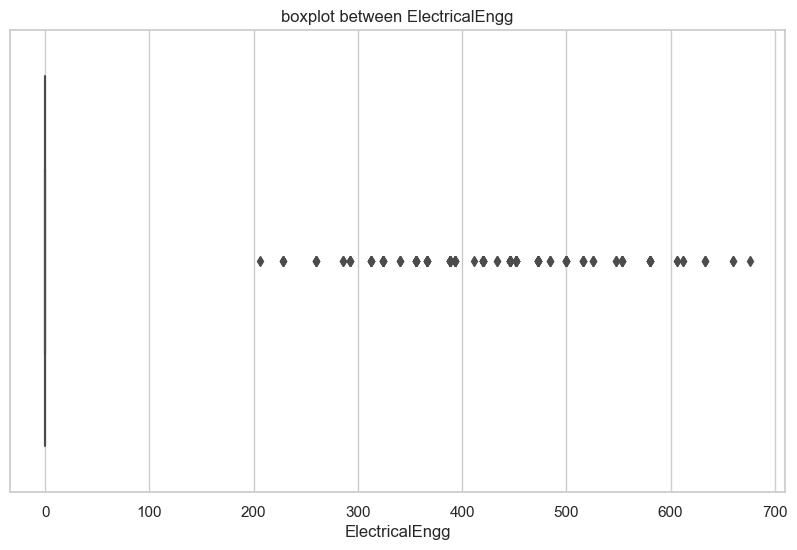

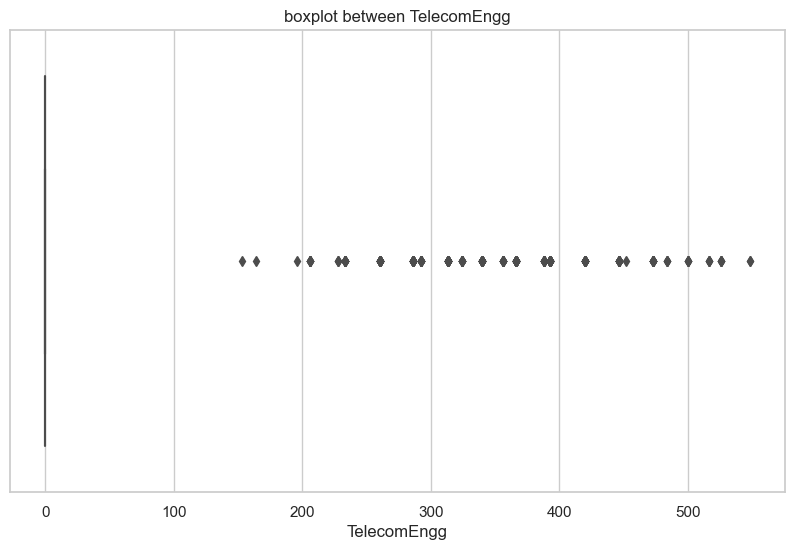

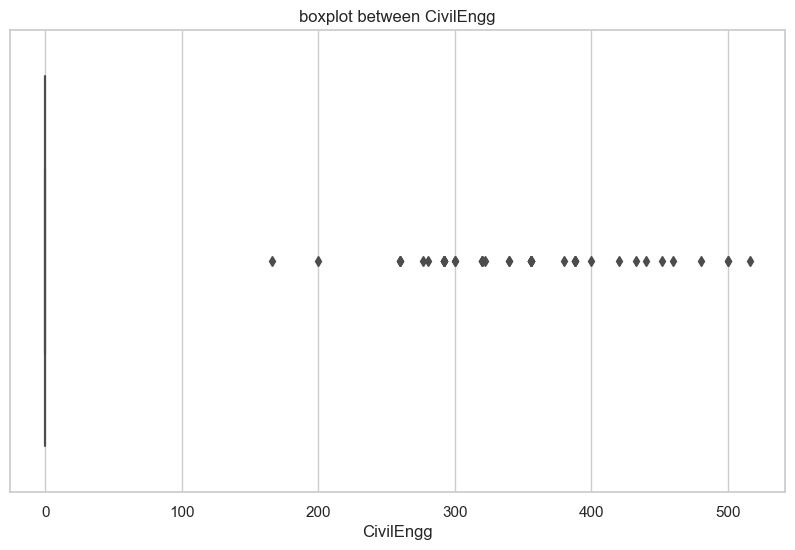

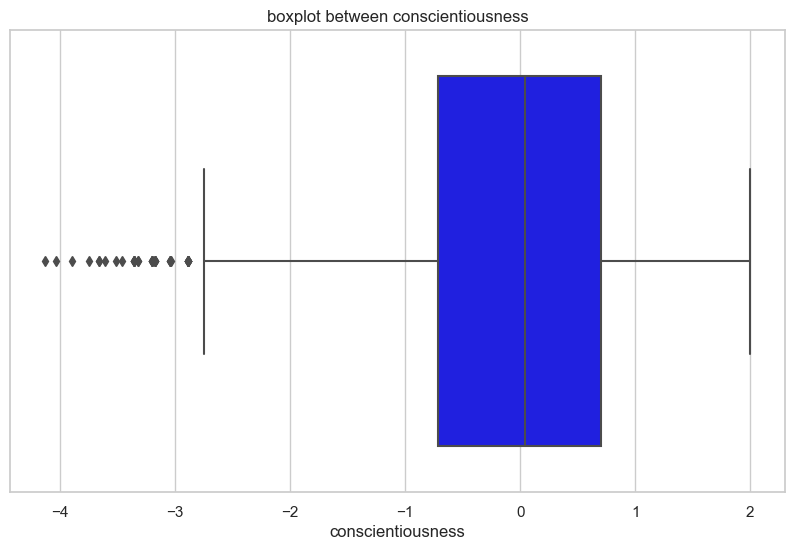

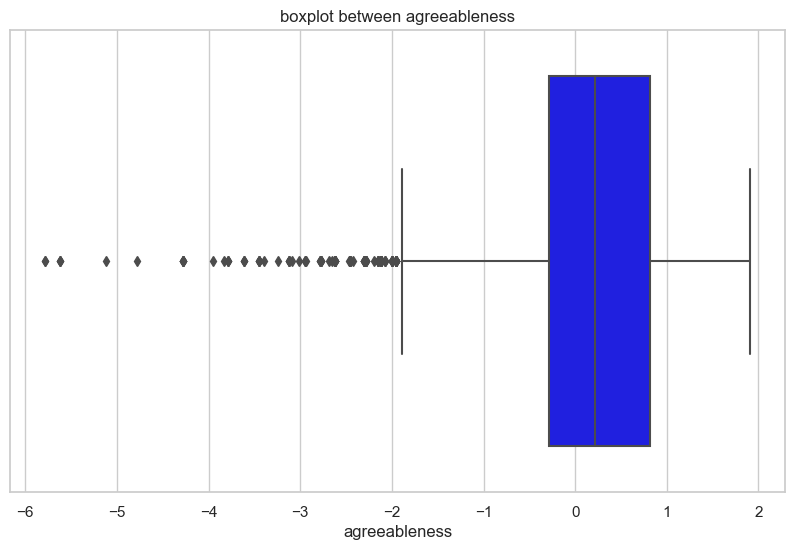

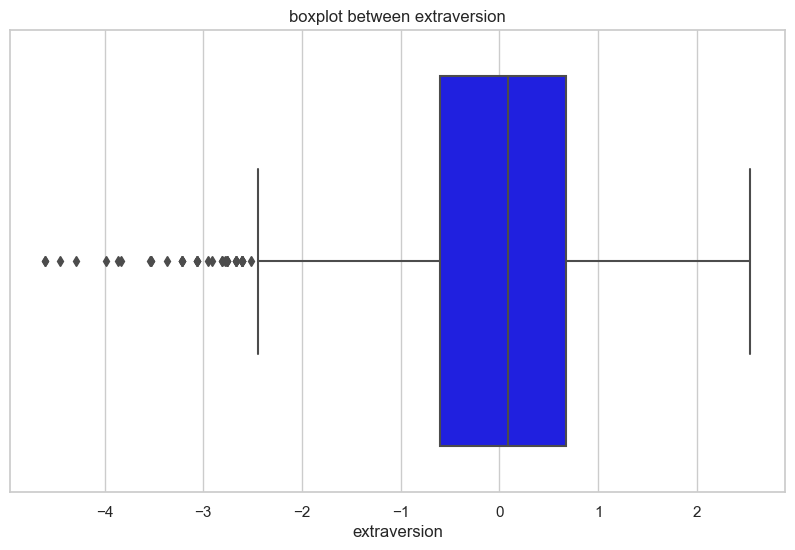

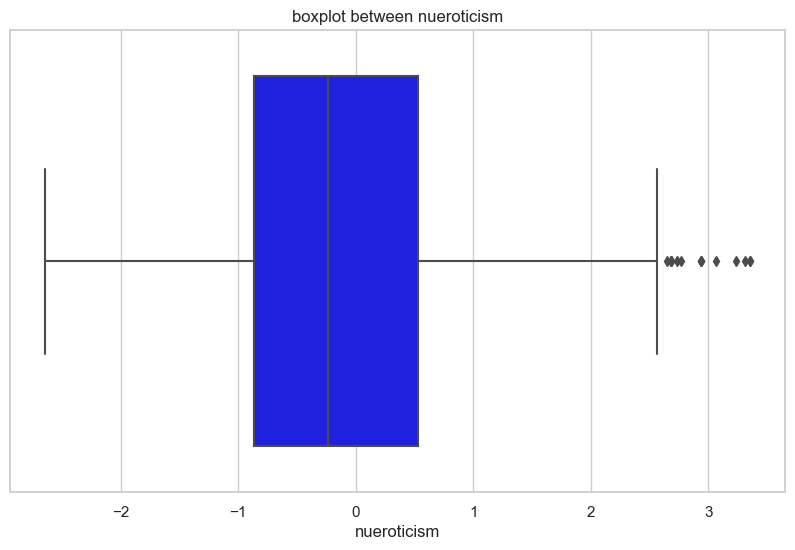

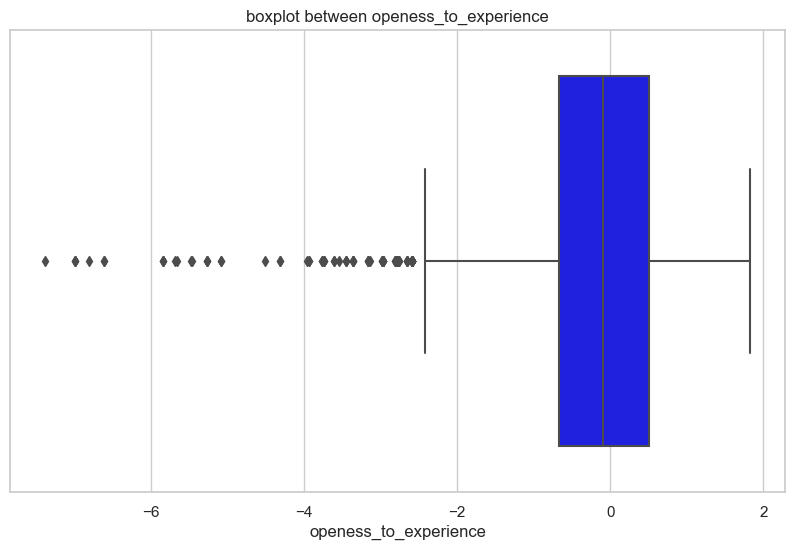

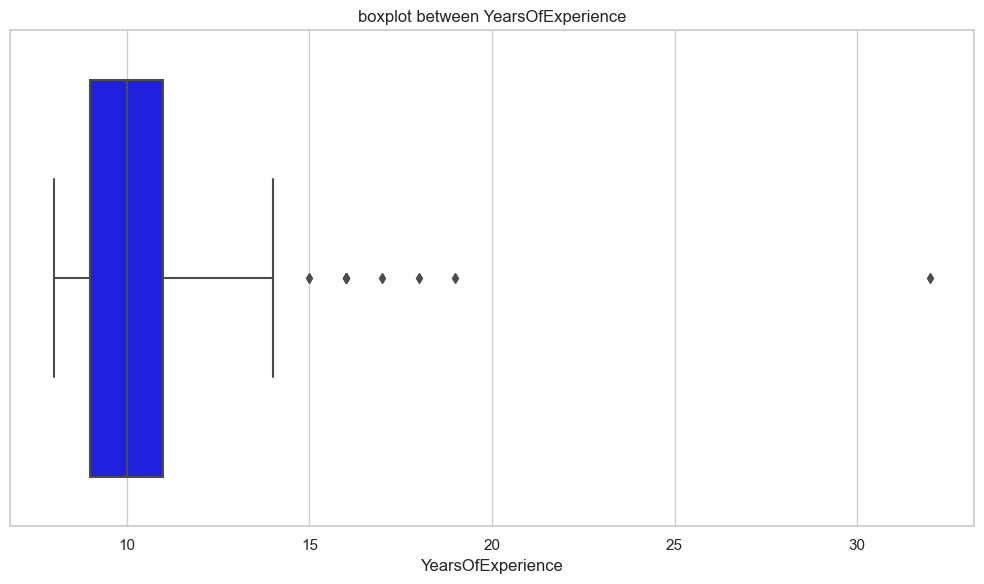

In [323]:
for i, column in enumerate(num_df,1):
        plt.figure(figsize=(10,6))
        sns.boxplot(x=df[column],color="blue")
        plt.title(f"boxplot between {column}")
plt.tight_layout()
plt.show()


# Boxplots provide a visual summary of the distribution of numerical data, highlighting the median, quartiles, and potential outliers for each column

# displot(PDE) plots using Seaborn. It visualizes the distribution of numerical columns in the DataFrame

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3

<Figure size 500x300 with 0 Axes>

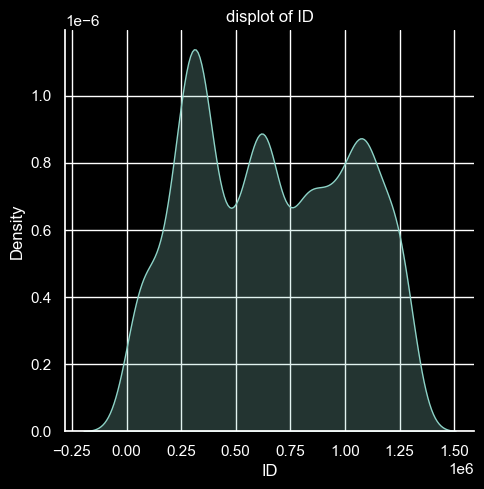

<Figure size 500x300 with 0 Axes>

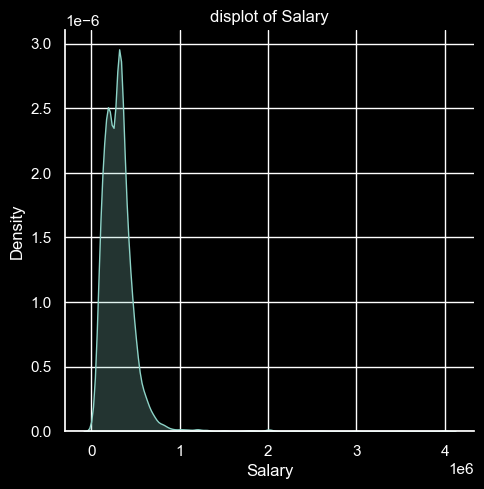

<Figure size 500x300 with 0 Axes>

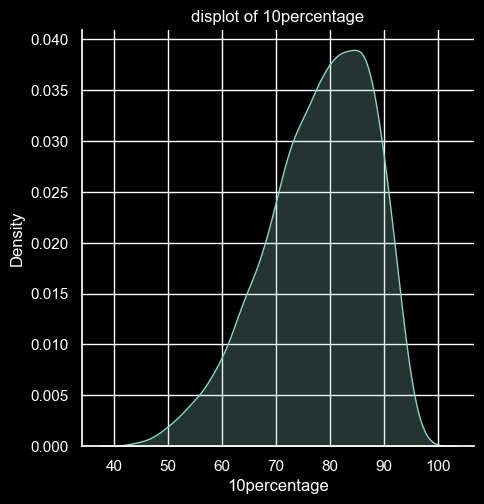

<Figure size 500x300 with 0 Axes>

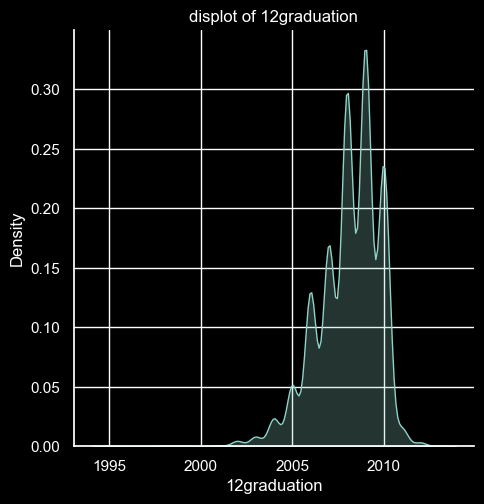

<Figure size 500x300 with 0 Axes>

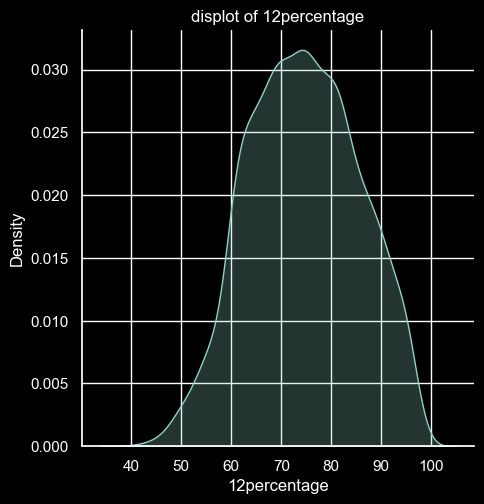

<Figure size 500x300 with 0 Axes>

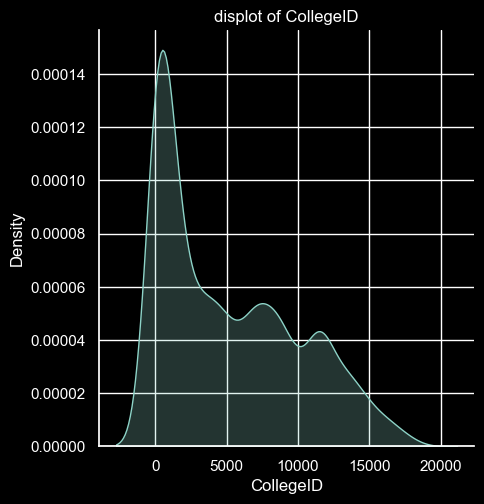

<Figure size 500x300 with 0 Axes>

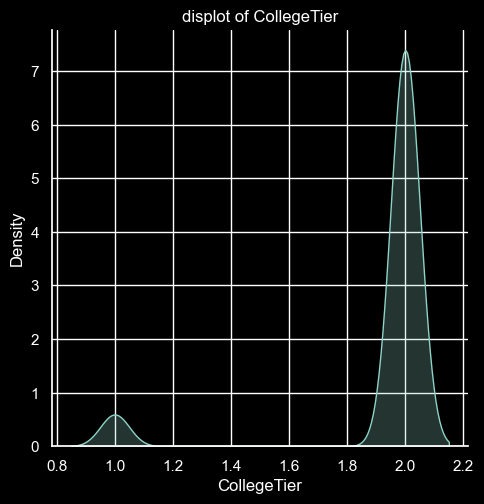

<Figure size 500x300 with 0 Axes>

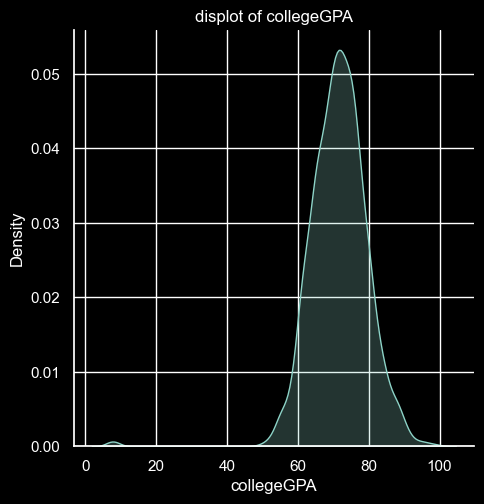

<Figure size 500x300 with 0 Axes>

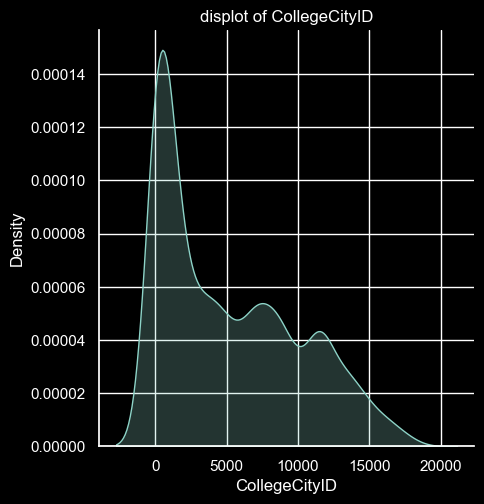

<Figure size 500x300 with 0 Axes>

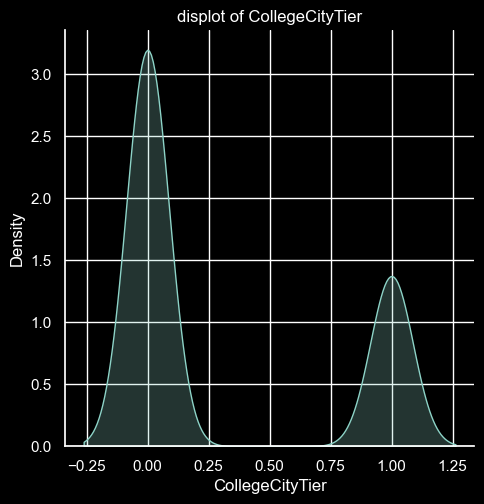

<Figure size 500x300 with 0 Axes>

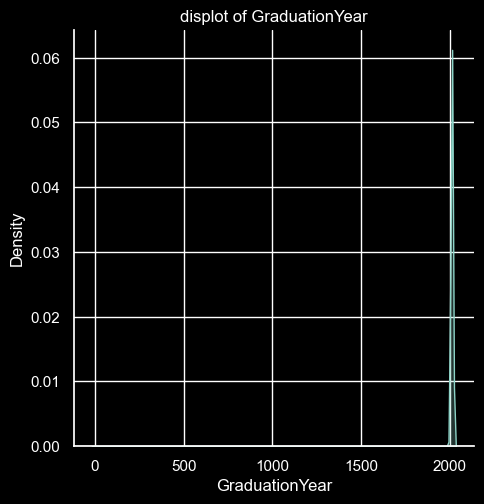

<Figure size 500x300 with 0 Axes>

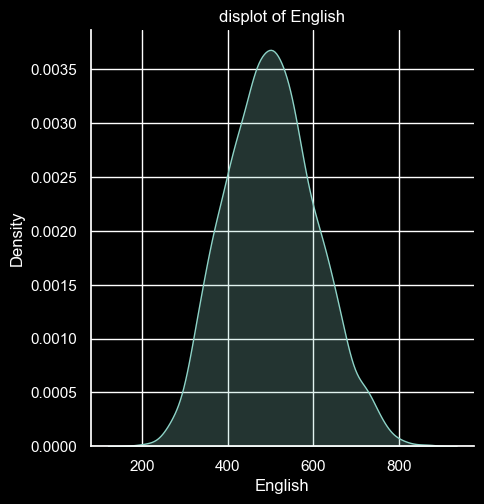

<Figure size 500x300 with 0 Axes>

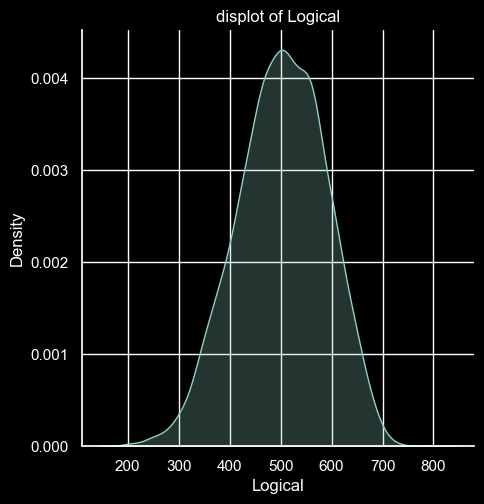

<Figure size 500x300 with 0 Axes>

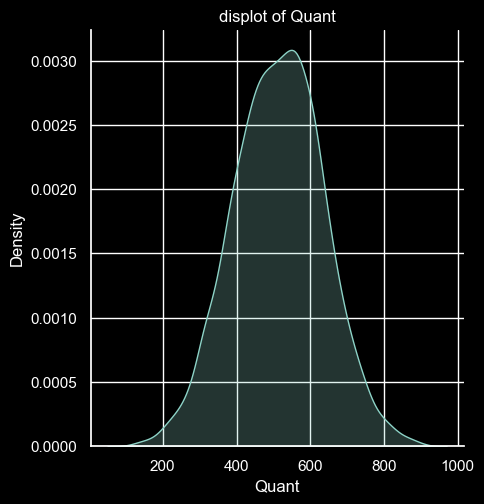

<Figure size 500x300 with 0 Axes>

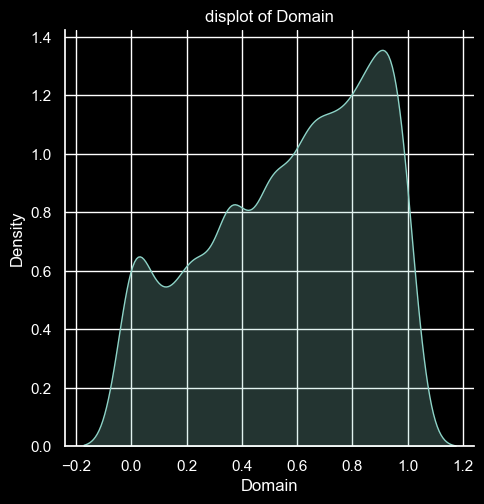

<Figure size 500x300 with 0 Axes>

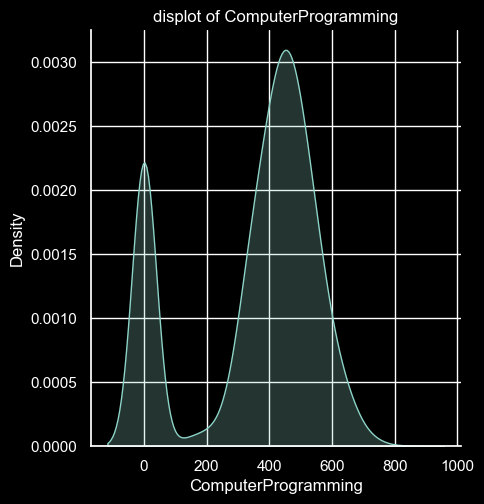

<Figure size 500x300 with 0 Axes>

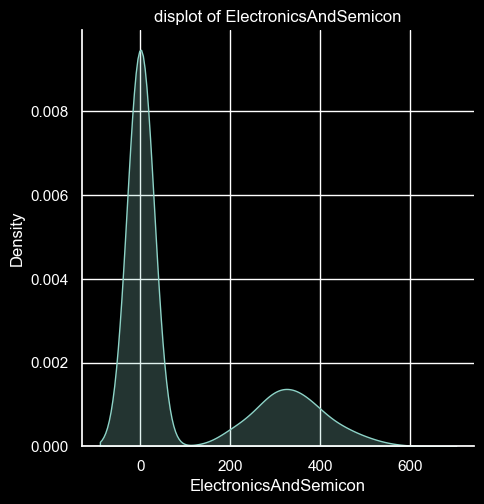

<Figure size 500x300 with 0 Axes>

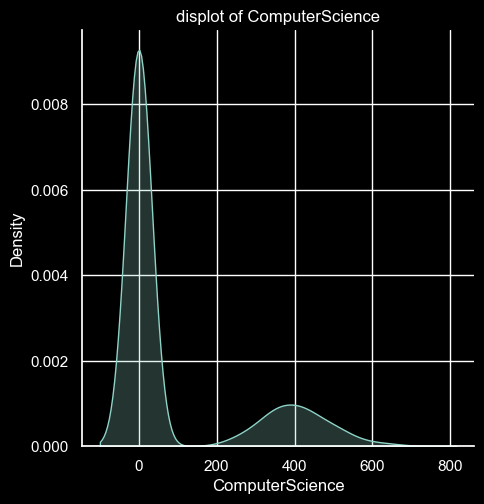

<Figure size 500x300 with 0 Axes>

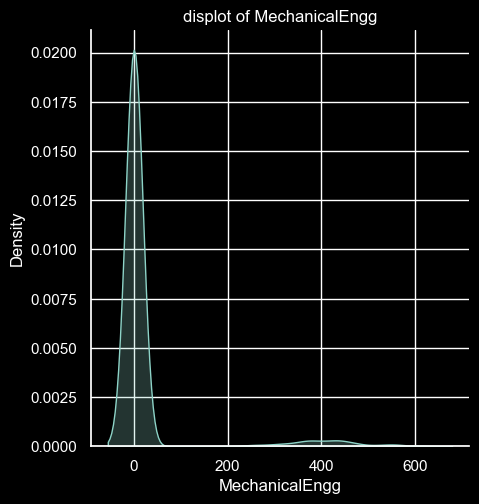

<Figure size 500x300 with 0 Axes>

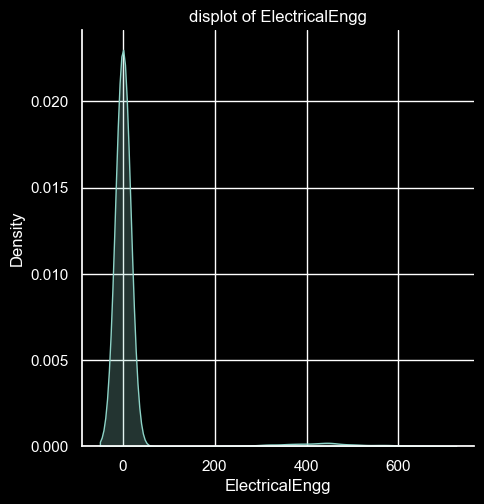

<Figure size 500x300 with 0 Axes>

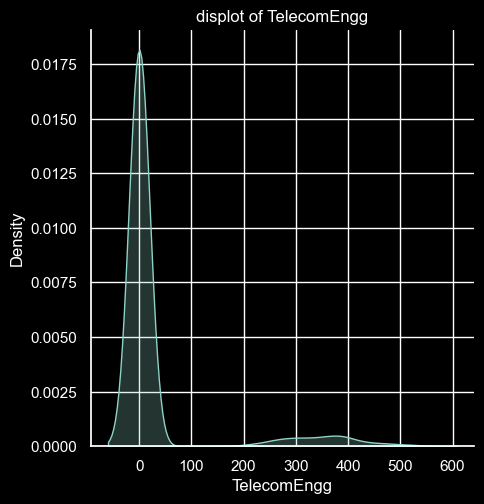

<Figure size 500x300 with 0 Axes>

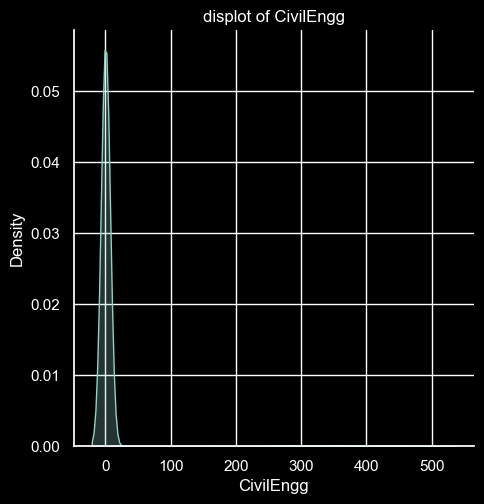

<Figure size 500x300 with 0 Axes>

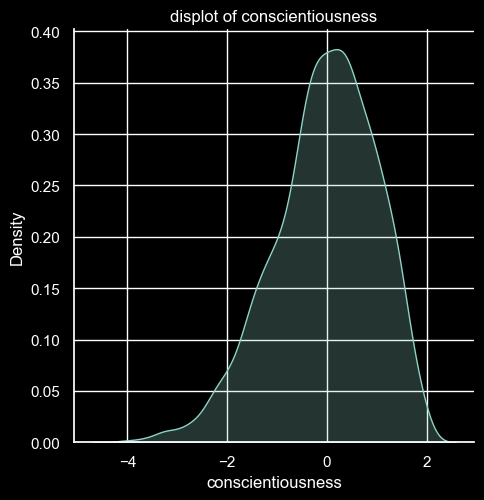

<Figure size 500x300 with 0 Axes>

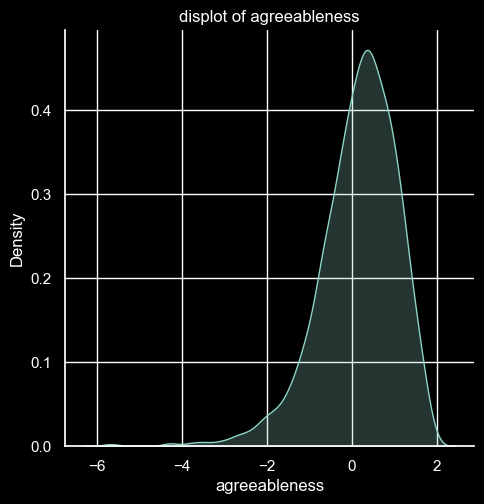

<Figure size 500x300 with 0 Axes>

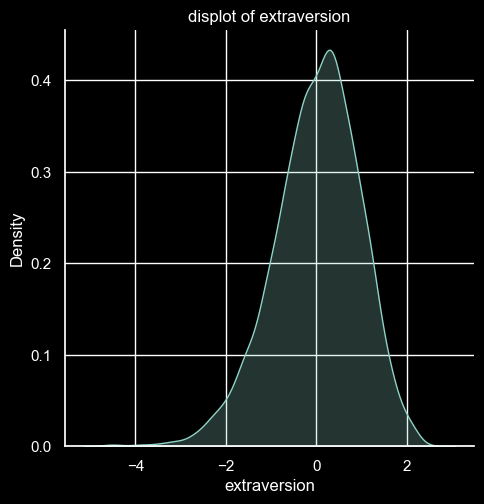

<Figure size 500x300 with 0 Axes>

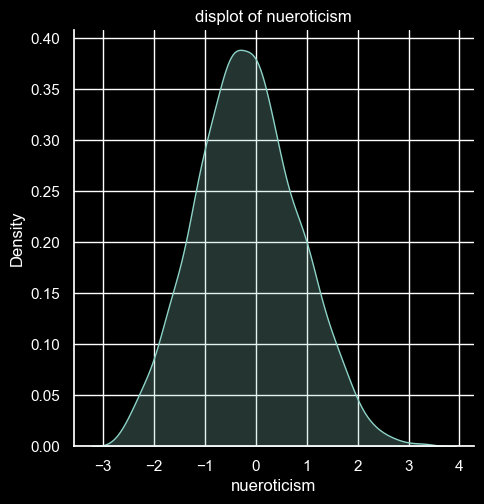

<Figure size 500x300 with 0 Axes>

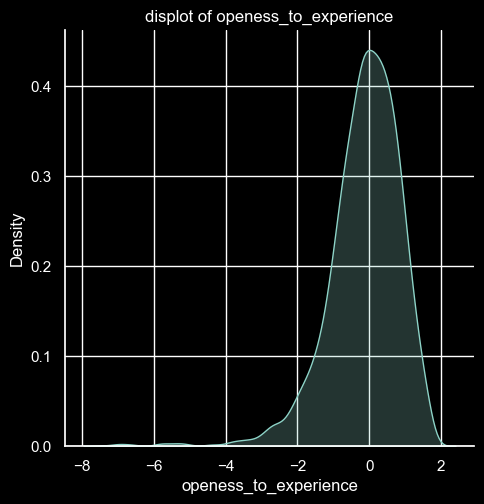

<Figure size 500x300 with 0 Axes>

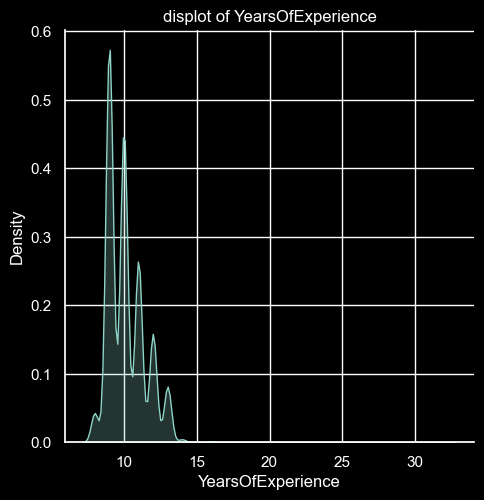

In [324]:
for i, column in enumerate(num_df,1):
    plt.style.use("dark_background")
    plt.figure(figsize=(5,3))
    sns.displot(df[column],kind="kde",fill=True)
    plt.title(f"displot of {column}")
plt.show()


# countplot

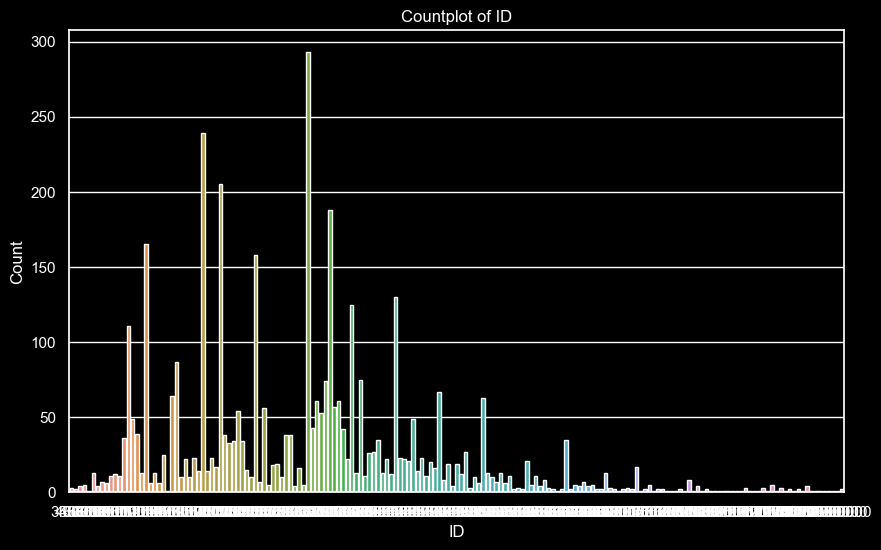

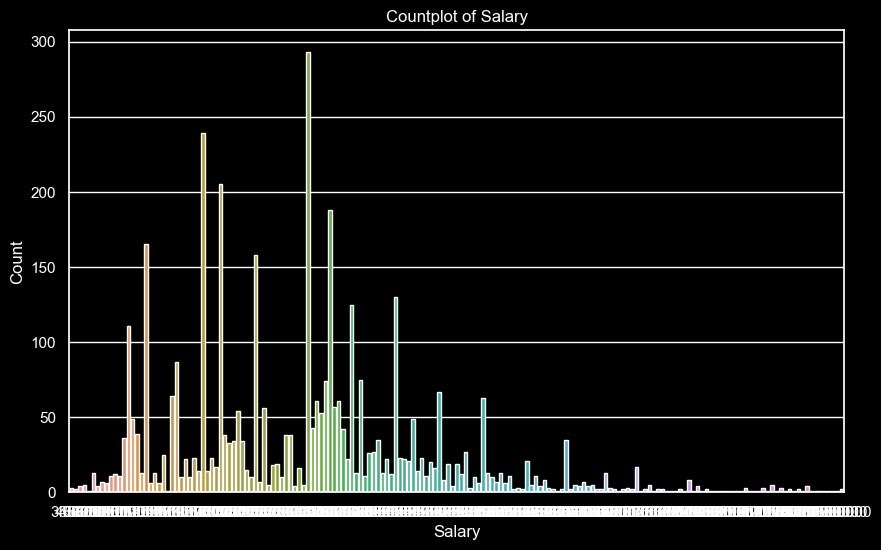

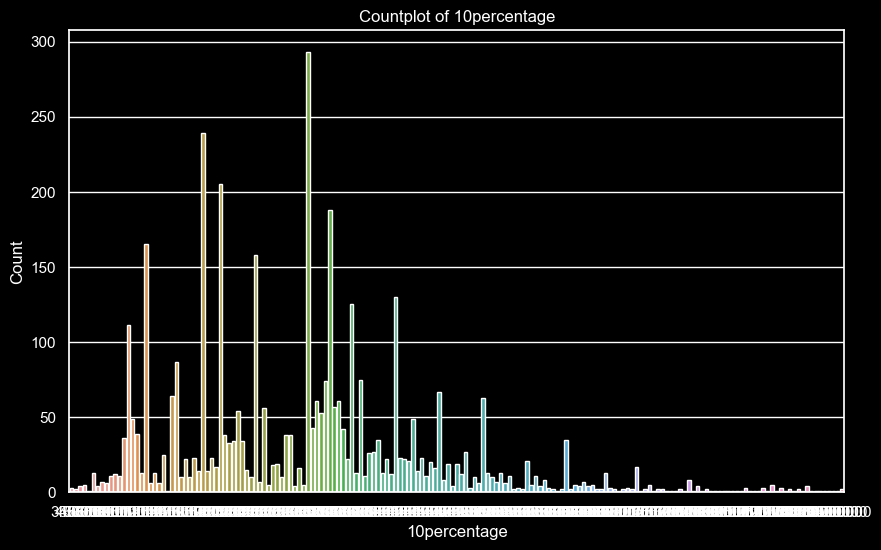

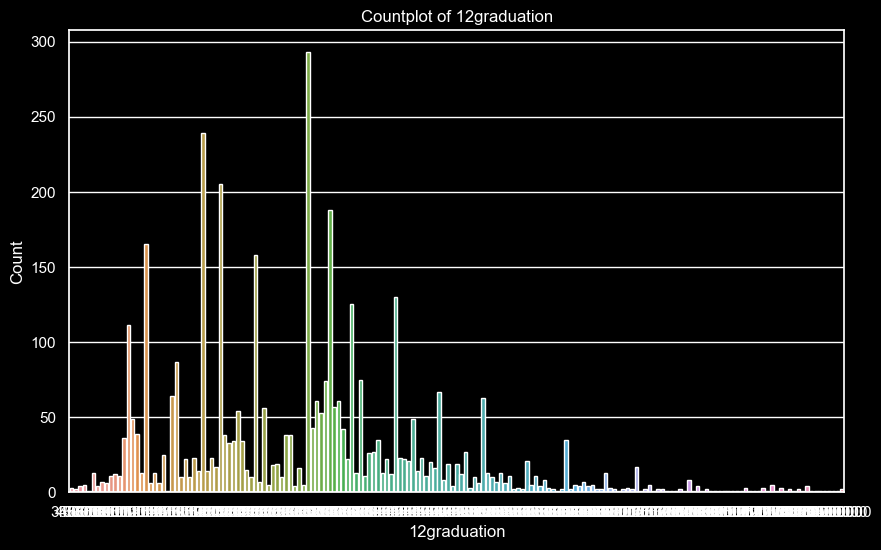

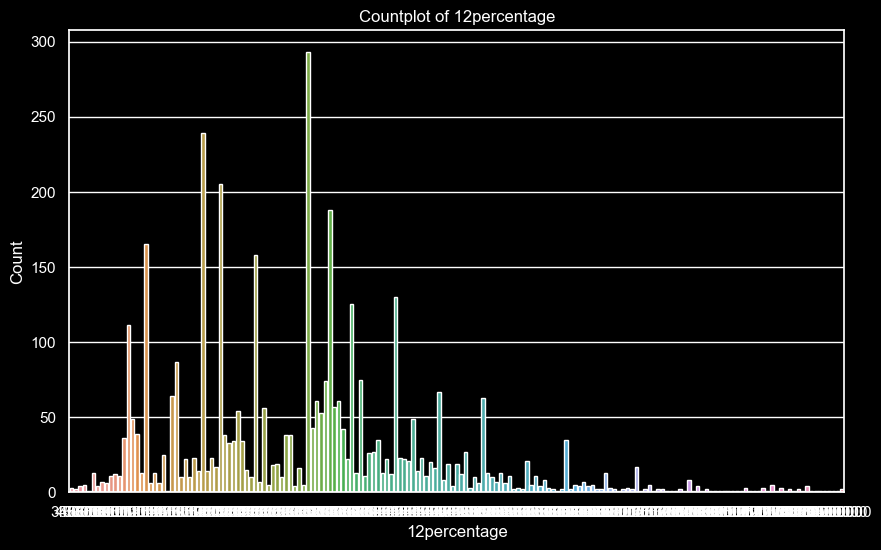

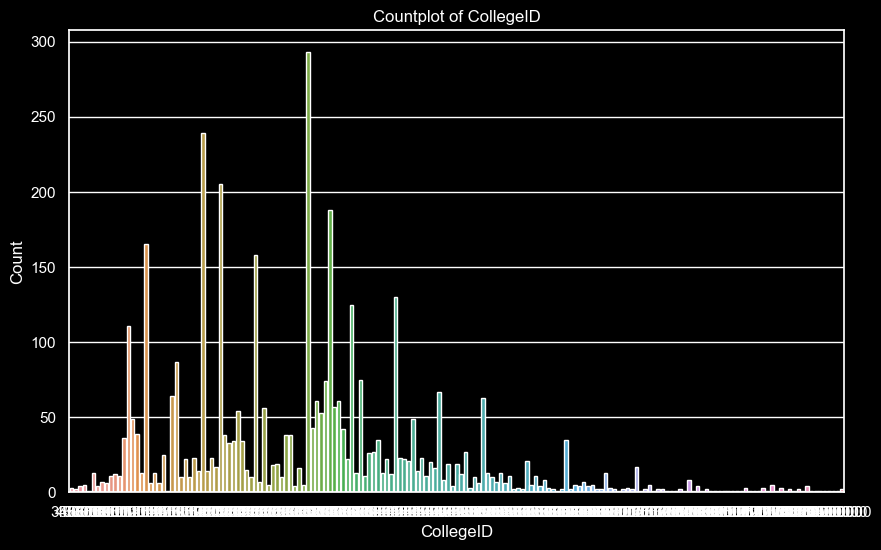

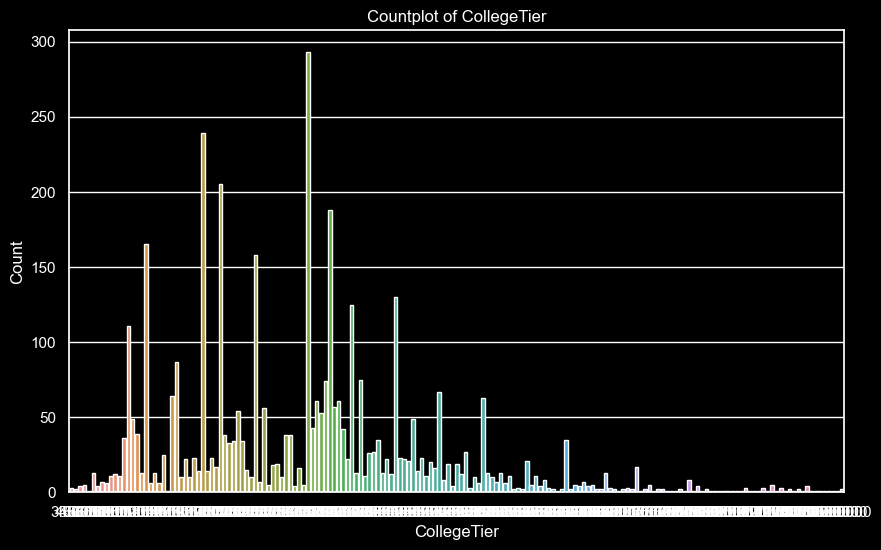

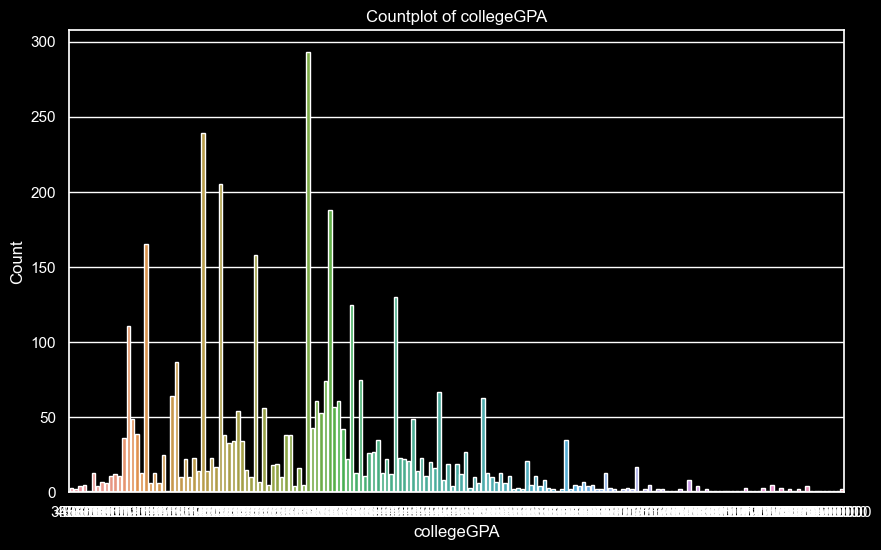

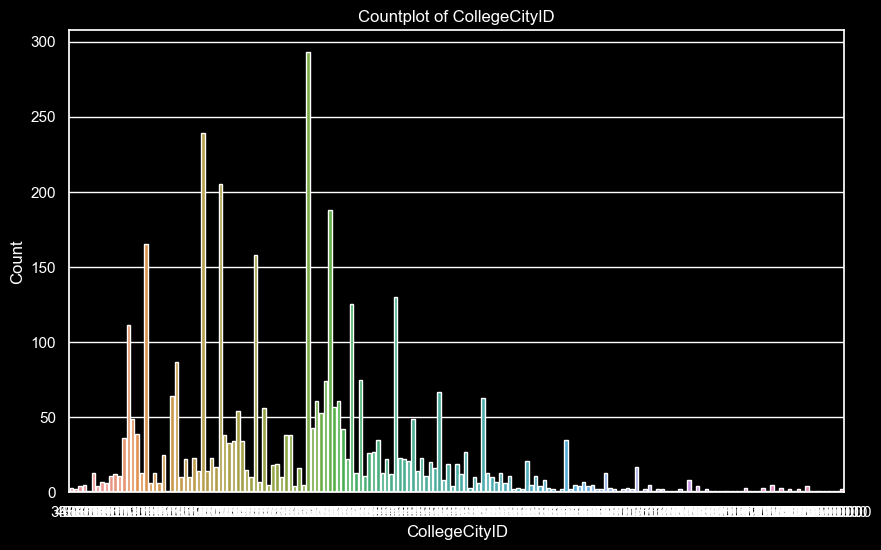

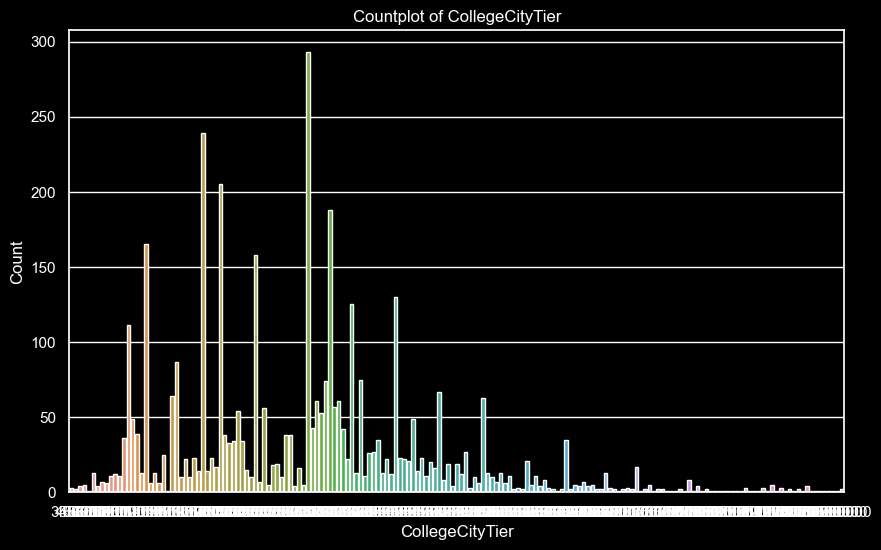

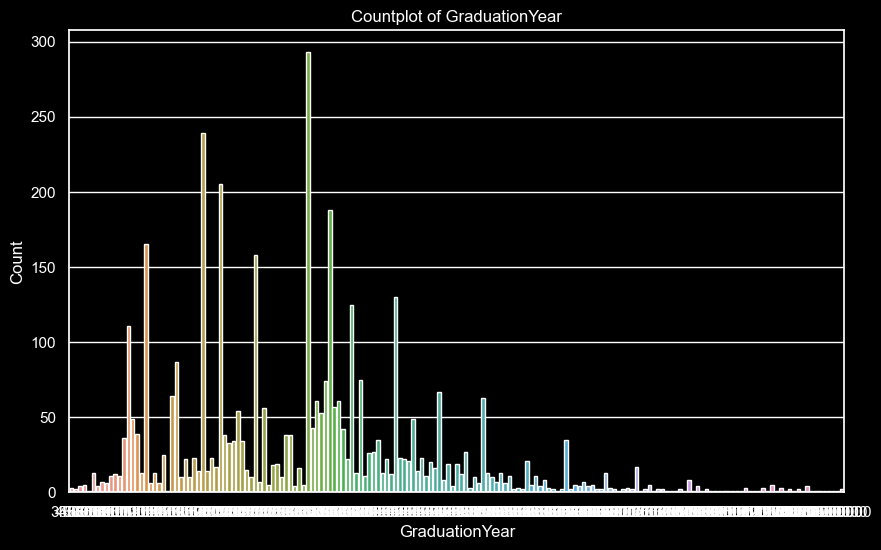

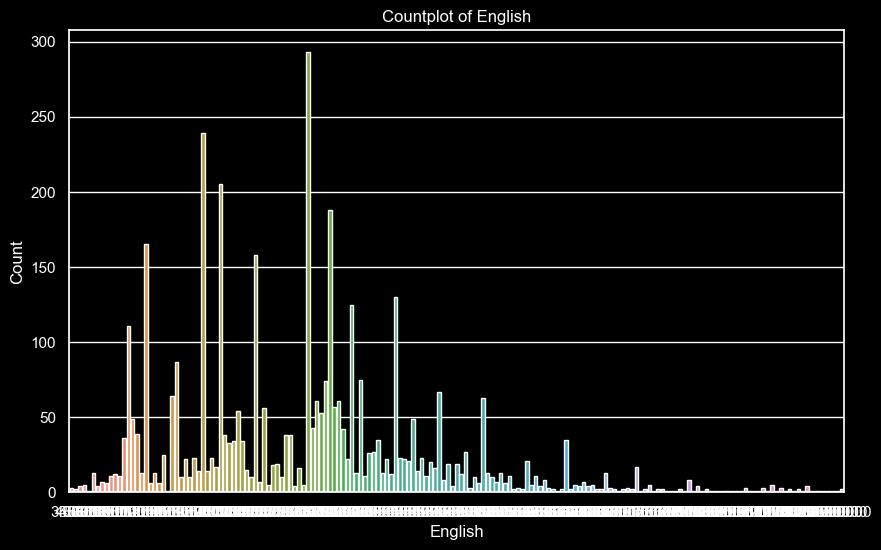

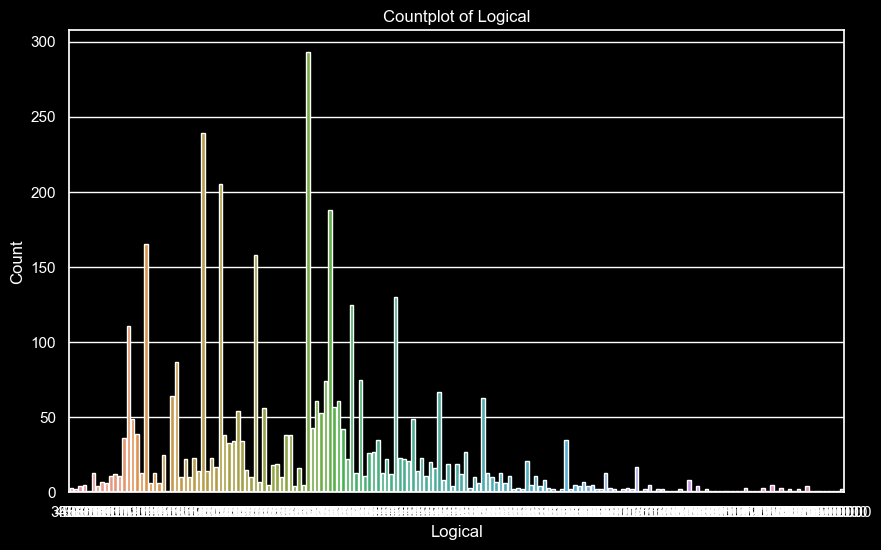

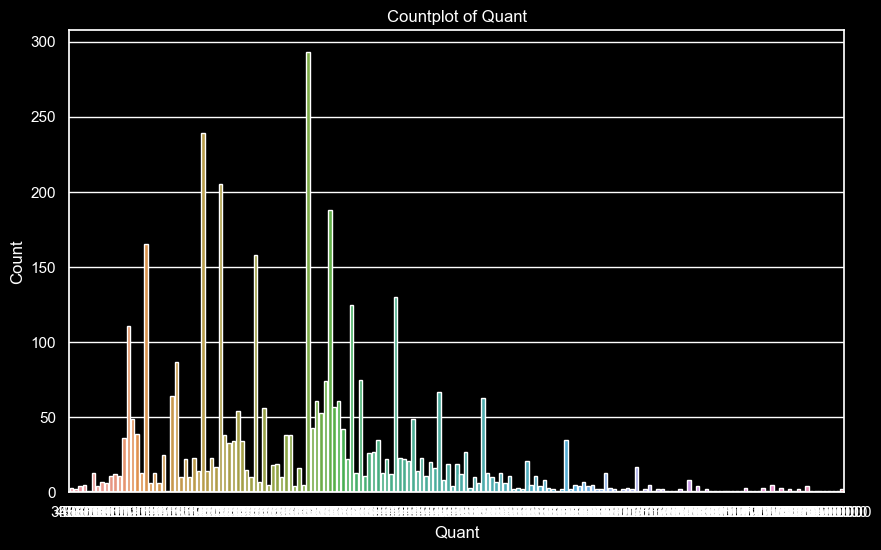

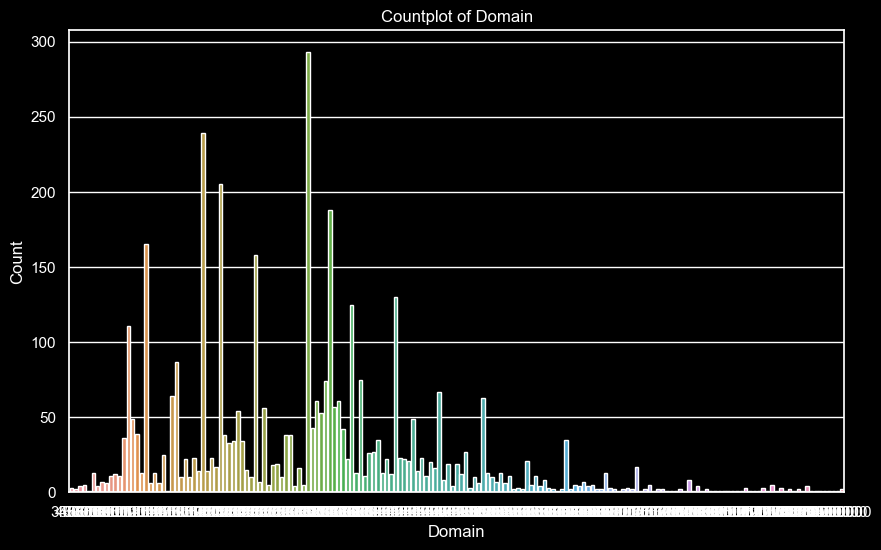

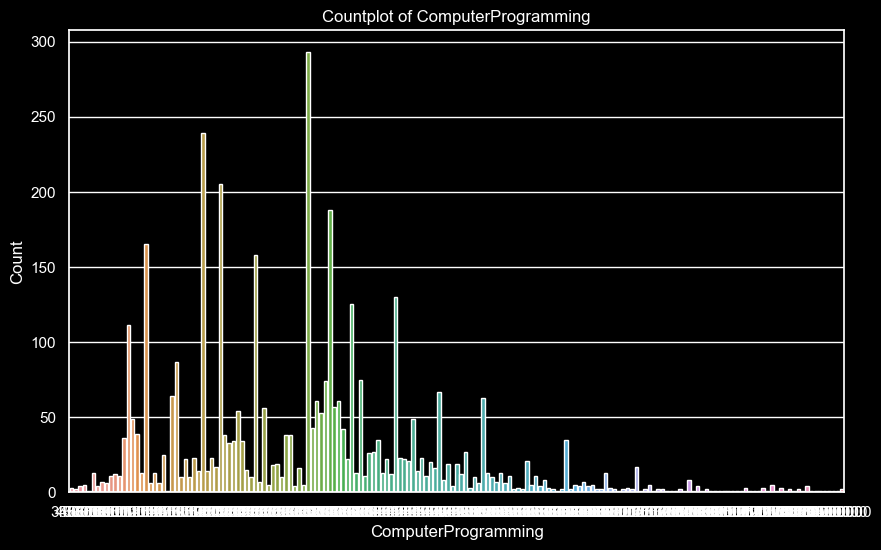

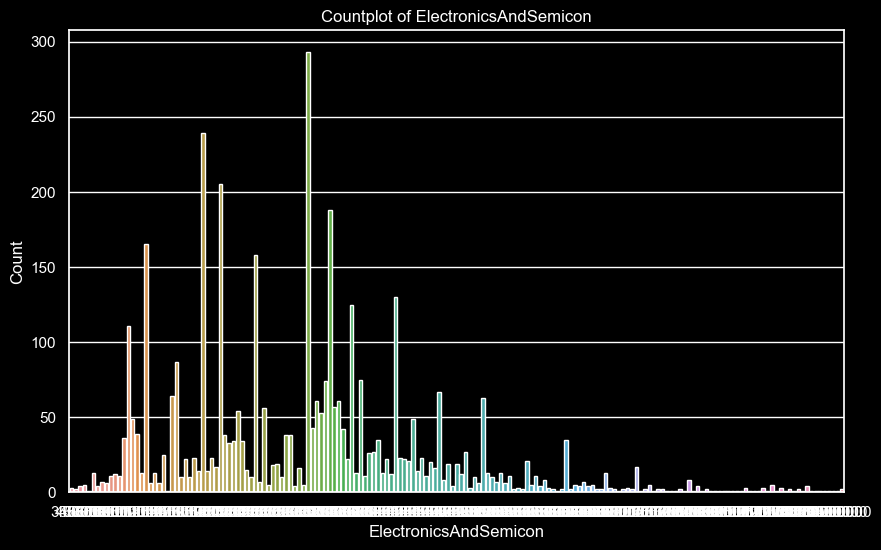

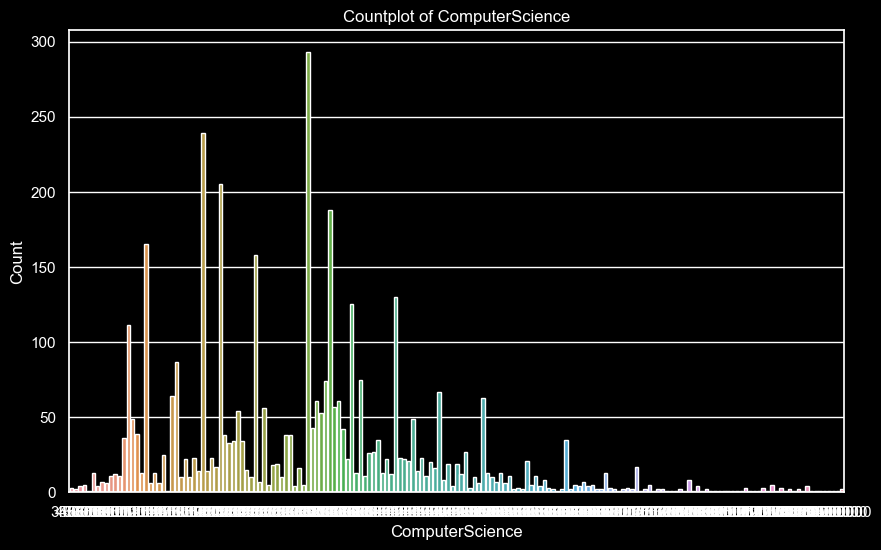

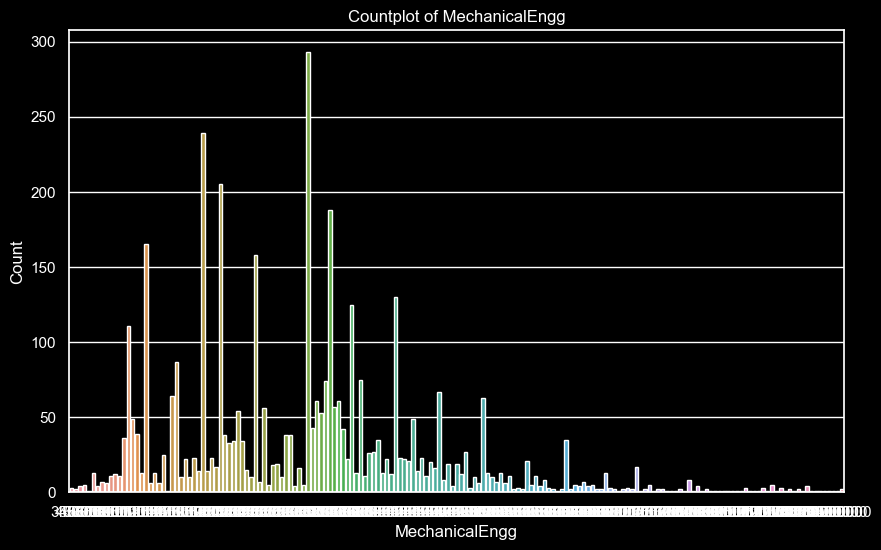

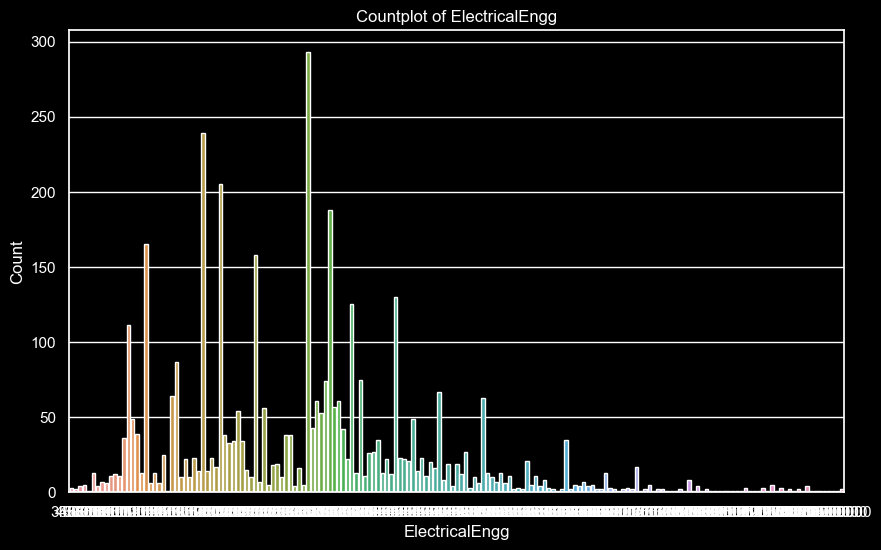

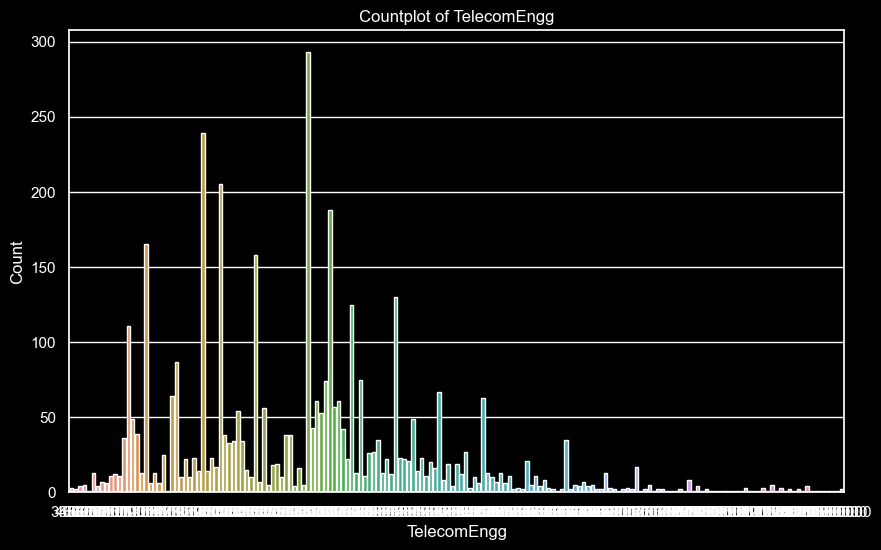

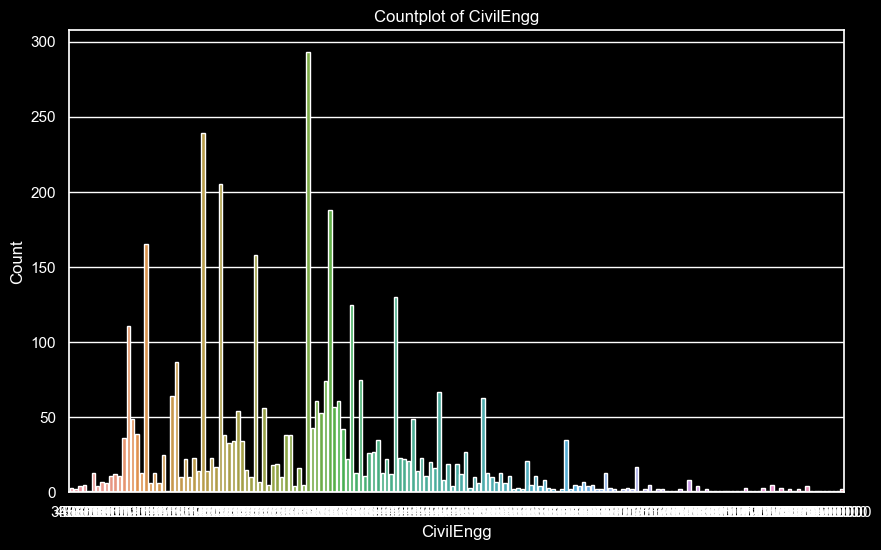

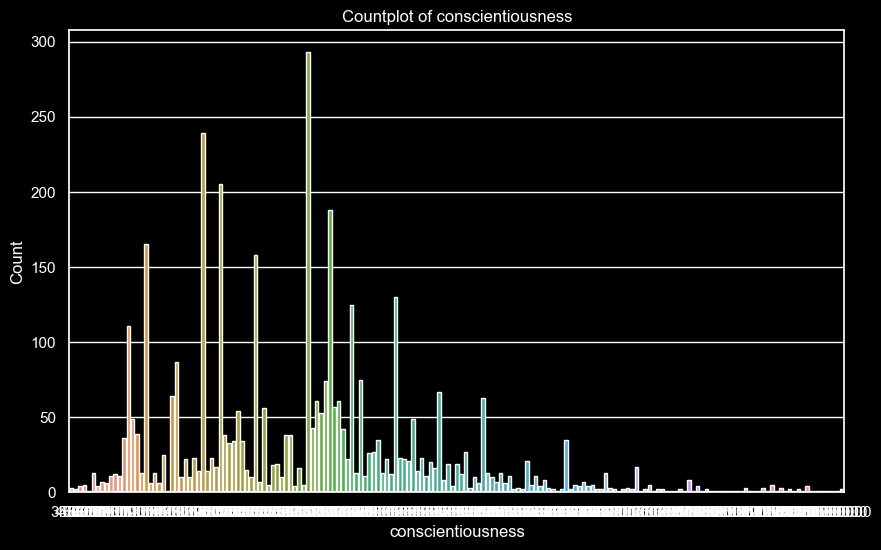

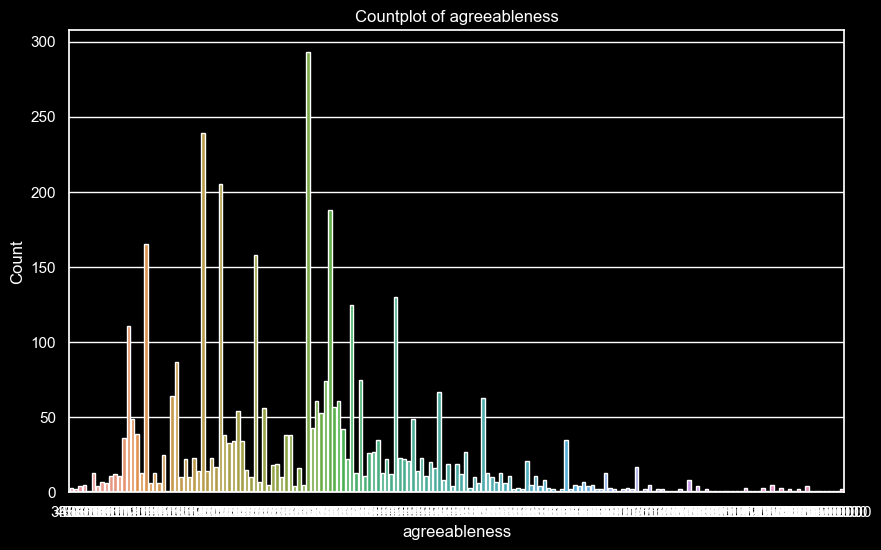

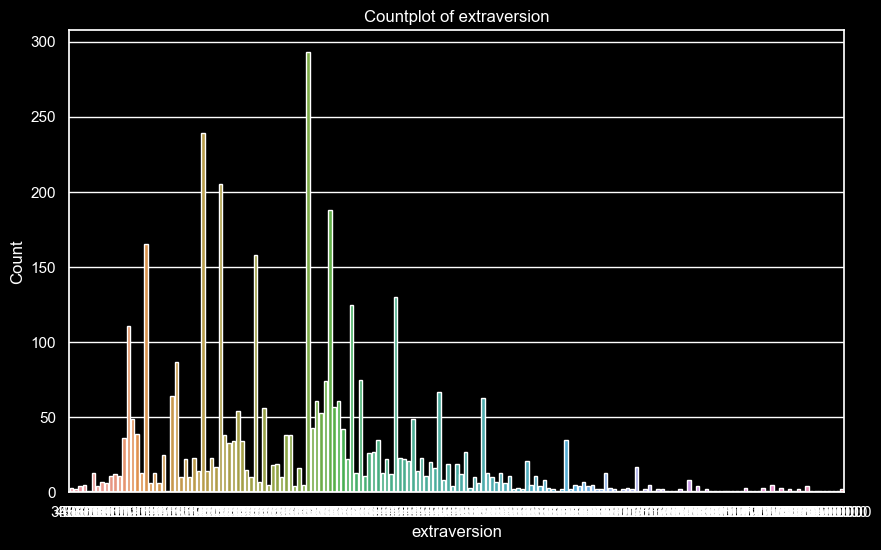

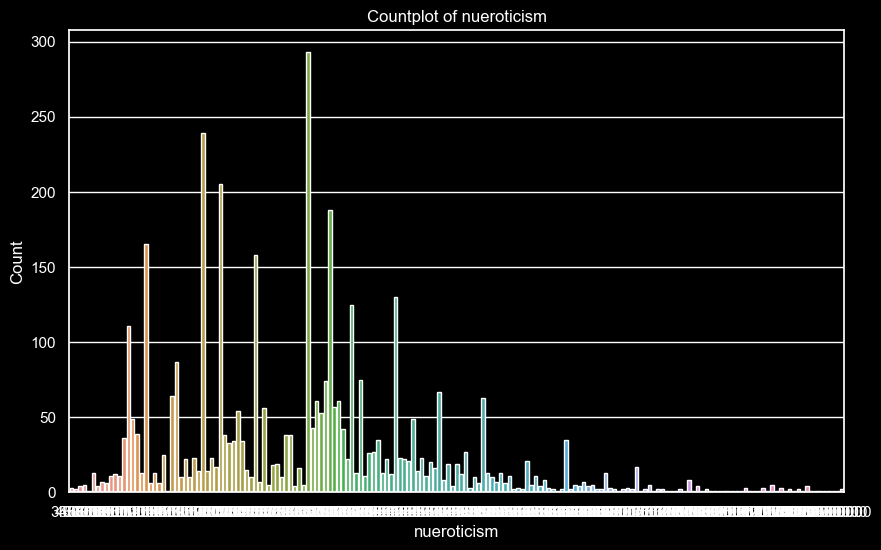

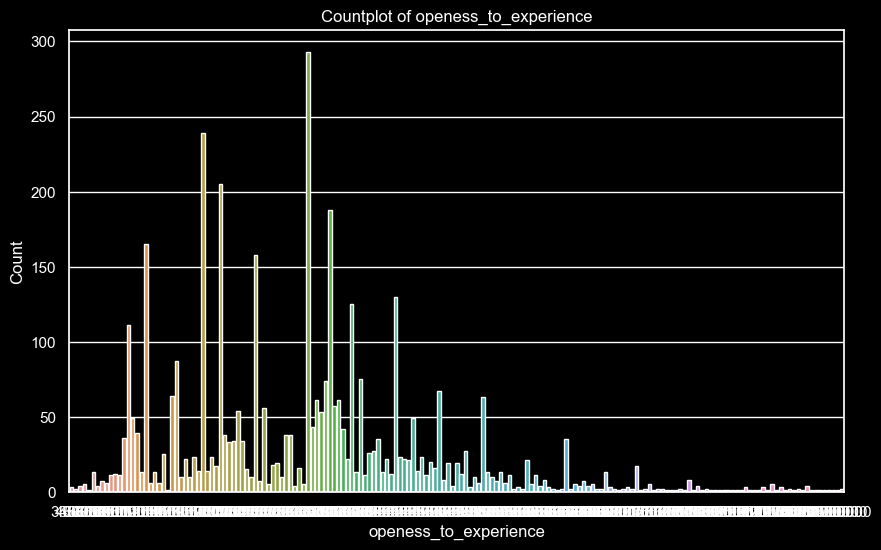

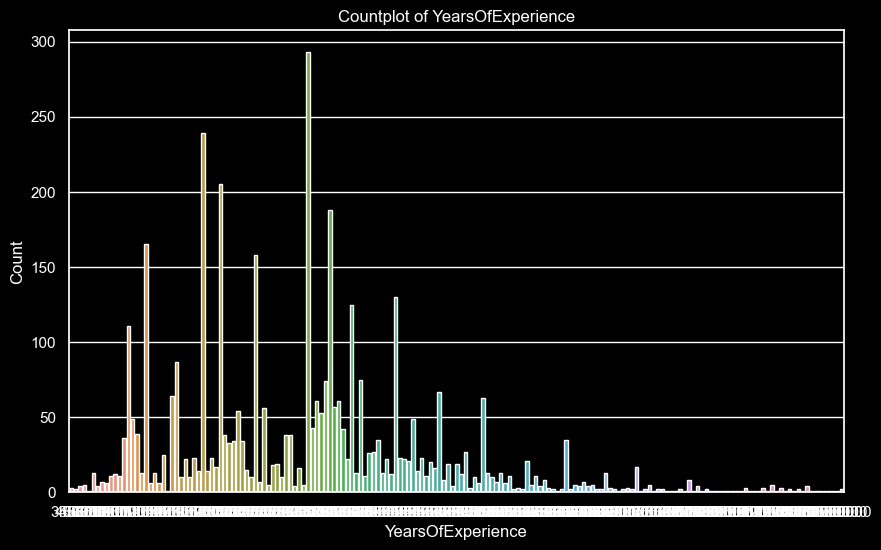

In [325]:
for i, column in enumerate(num_df,1):
    plt.style.use("dark_background")
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Salary', data=df)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


# countplot for Gender and Degree

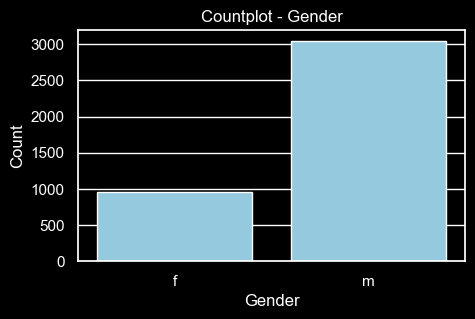

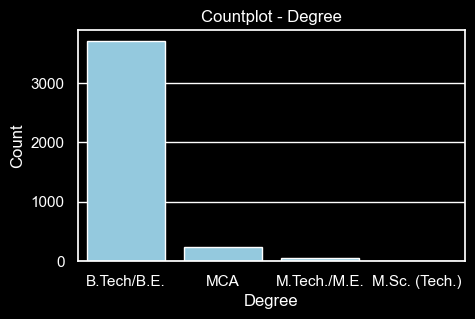

In [127]:
for column in ["Gender","Degree"]:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=column, color='skyblue')
    plt.title(f'Countplot - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [326]:
df["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [327]:
df["Designation"].nunique()

419

In [328]:
def refine_feature(input_val, input_list):
  if type(input_val) == str:
    for item in [i for i in input_list if len(i.split()) > 1]:
      if all([x in input_val for x in item.split()]):
        return item.title()
    for item in [i for i in input_list if len(i.split()) == 1]:
      if item in input_val:
        return item.title()
    if 'engineer' in input_val:
      return 'Hardware Engineer'
    try:
      matched_item = get_close_matches(input_val, input_list)[0]
      return matched_item.title()
    except:
      return 'Other'
  else:
    return np.nan

In [329]:

role_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

In [330]:

df['Job_Role'] = df['Designation'].apply(lambda x: refine_feature(x, role_list))
df['Job_Role'] = df['Job_Role'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})
df['Job_Role'].value_counts(dropna=False)

Job_Role
Software Engineer    941
Developer            753
System Engineer      477
Hardware Engineer    466
Other                413
Analyst              411
Administrator        197
Test Engineer        180
Manager              160
Name: count, dtype: int64

# QQplot

In [331]:
import statsmodels.api as sm

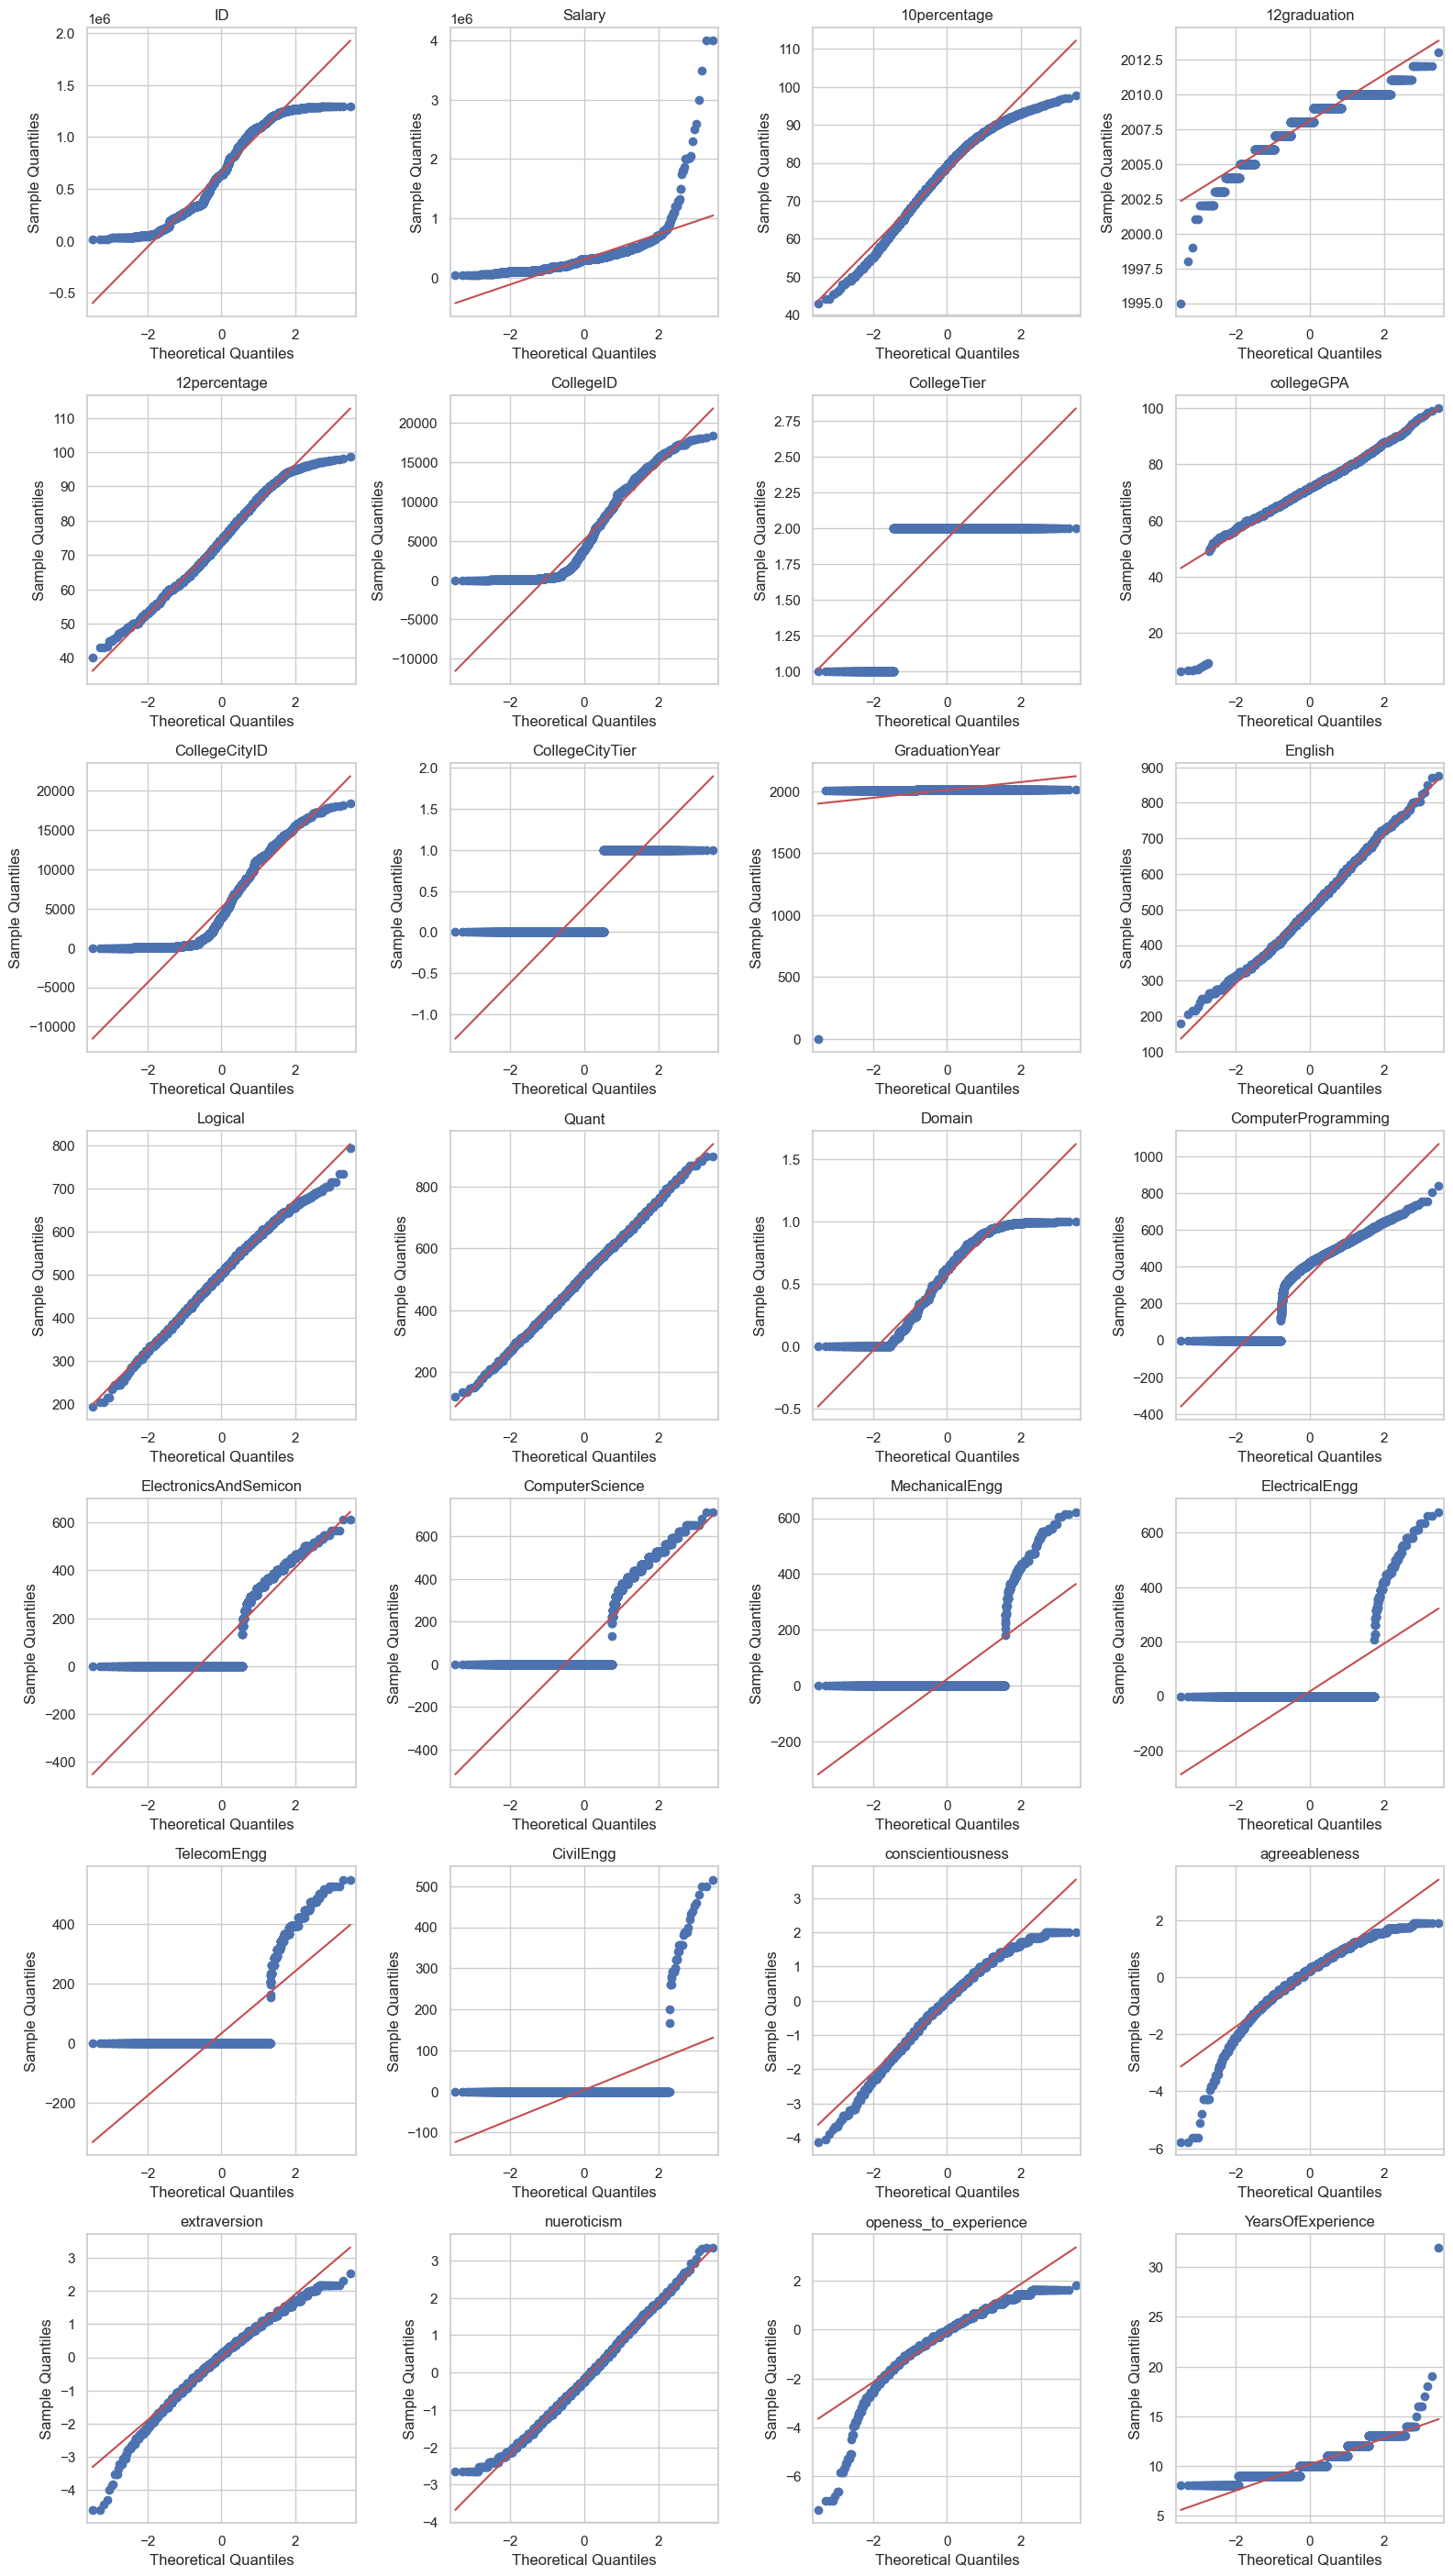

In [333]:
num_df = df.select_dtypes(include=['number']).columns
num_cols = len(num_df)
plt.figure(figsize=(16, 4 * num_cols))
sns.set(style="whitegrid") 
for i, column in enumerate(num_df, 1):
    plt.subplot(num_cols, 4, i)
    sm.qqplot(df[column], line='s', ax=plt.gca())
    plt.title(column)
plt.tight_layout()
plt.show()


 ### Quantile-Quantile (QQ) plots for numerical columns using the Seaborn and Statsmodels libraries.QQ plots help assess whether a distribution of a variable follows a theoretical distribution, such as a normal distribution. Points close to the reference line suggest normality, while deviations indicate departures from normal distribution.

In [334]:
num

['ID',
 'Salary',
 'DOJ',
 'DOL',
 'Designation',
 'JobCity',
 'DOB',
 '10percentage',
 '10board',
 '12graduation',
 '12percentage',
 '12board',
 'CollegeID',
 'Specialization',
 'collegeGPA',
 'CollegeCityID',
 'CollegeState',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'YearsOfExperience']

# Statistical Summary

In [335]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Summary for {column}:")
    print(df[column].describe())

Summary for ID:
count    3.998000e+03
mean     6.637945e+05
std      3.632182e+05
min      1.124400e+04
25%      3.342842e+05
50%      6.396000e+05
75%      9.904800e+05
max      1.298275e+06
Name: ID, dtype: float64
Summary for Salary:
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64
Summary for 10percentage:
count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64
Summary for 12graduation:
count    3998.000000
mean     2008.087544
std         1.653599
min      1995.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2013.000000
Name: 12graduation, dtype: float64
Summary for 12percentage:
count    3998.000000
mean       74.466366
std        10.999933
min        

# The above Shows the Statistical Summary of the numerical Columns

# Frequency Distribution of Categorical Variables

In [336]:
for column in df.select_dtypes(include='object').columns:
    print(f"Frequency Distribution for {column}:")
    print(df[column].value_counts())

Frequency Distribution for DataSource:
DataSource
train    3998
Name: count, dtype: int64
Frequency Distribution for DOL:
DOL
Not Applicable         1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: count, Length: 67, dtype: int64
Frequency Distribution for Designation:
Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419,

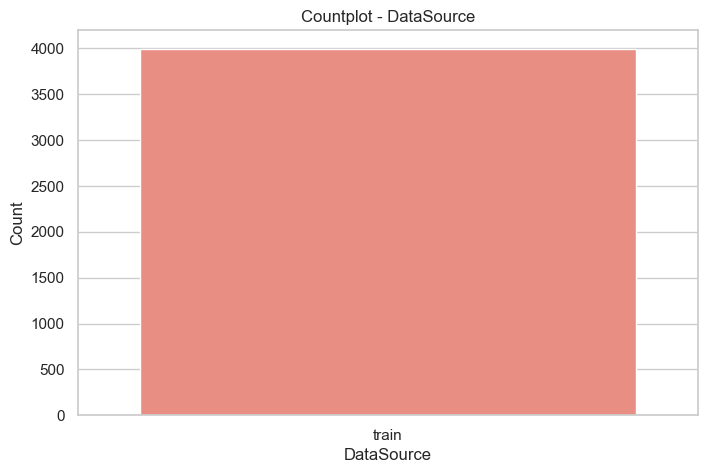

DateParseError: Unknown datetime string format, unable to parse: Not Applicable

<Figure size 800x500 with 0 Axes>

In [337]:
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, color='salmon')
    plt.title(f'Countplot - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


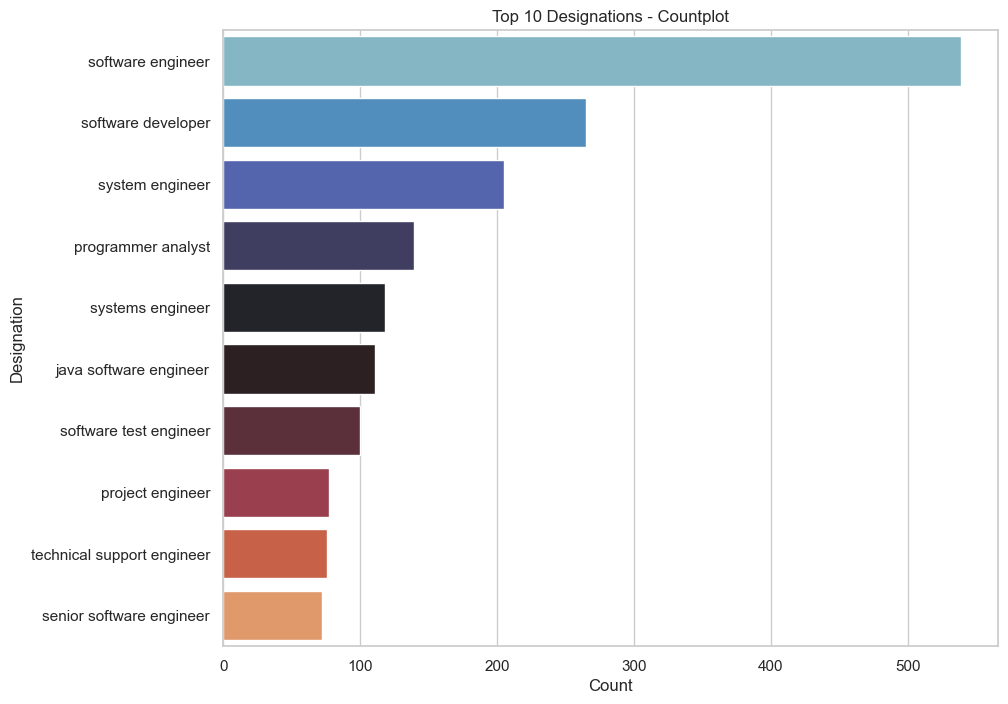

In [338]:
top_n_designations =10
top_designations = df['Designation'].value_counts().head(top_n_designations)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_designations.values, y=top_designations.index, palette='icefire')
plt.title(f'Top {top_n_designations} Designations - Countplot')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.show()

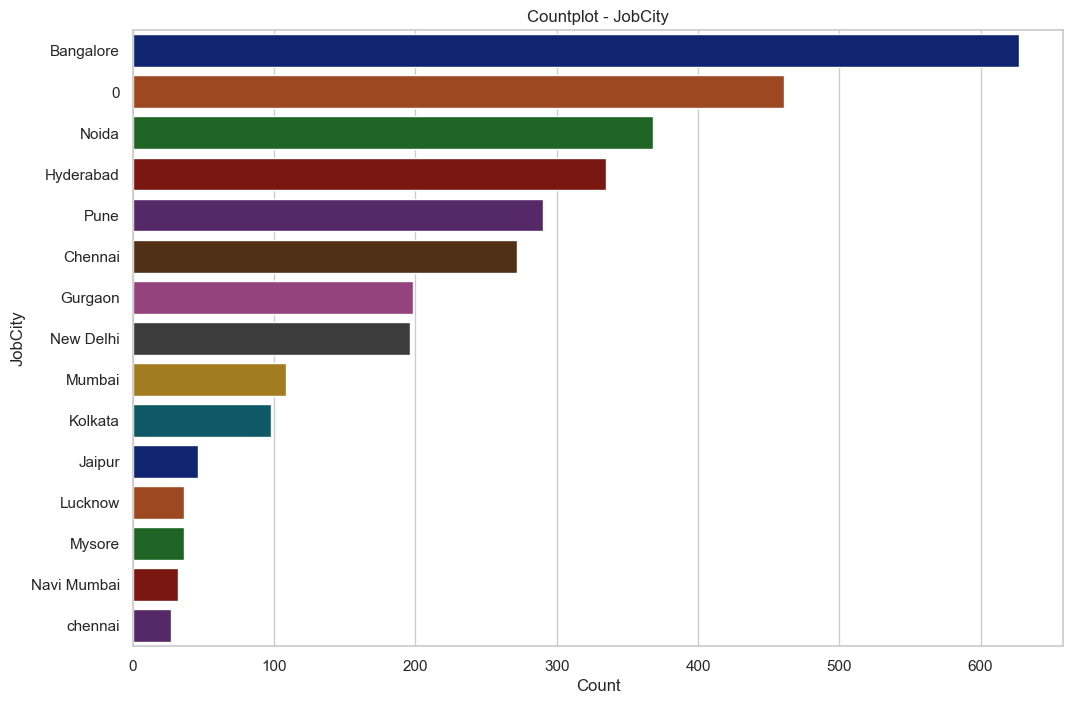

In [339]:
plt.figure(figsize=(12, 8))
jobcity_counts = df['JobCity'].value_counts().head(15)  
sns.barplot(x=jobcity_counts.values, y=jobcity_counts.index, palette='dark')
plt.title('Countplot - JobCity')
plt.xlabel('Count')
plt.ylabel('JobCity')
plt.show()

In [340]:
import plotly.express as px
designation_counts = df['Designation'].value_counts()
top_n = 10
top_designations = designation_counts.nlargest(top_n).index
df['Designation'] = df['Designation'].where(df['Designation'].isin(top_designations), 'Other')
fig = px.bar(df, x='Designation', title=f'Top {top_n} Designations and Others',labels={'Designation': 'Top Designations'},color='Salary',category_orders={'Designation': list(top_designations) + ['Other']},color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Designation',yaxis_title='Count',showlegend=False )
fig.show()

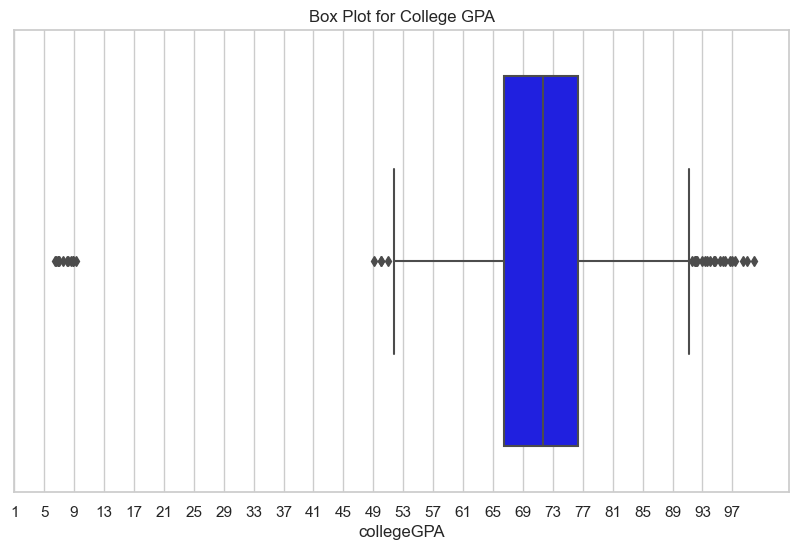

In [341]:
plt.figure(figsize=(10,6))
sns.boxplot(x='collegeGPA', data=df,color="blue")
plt.xticks(range(1, 101,4))
plt.title('Box Plot for College GPA')
plt.show()

### Most of the Student has less than 10 gpa ,the total gpa might be out of 10 and also may be out of 100

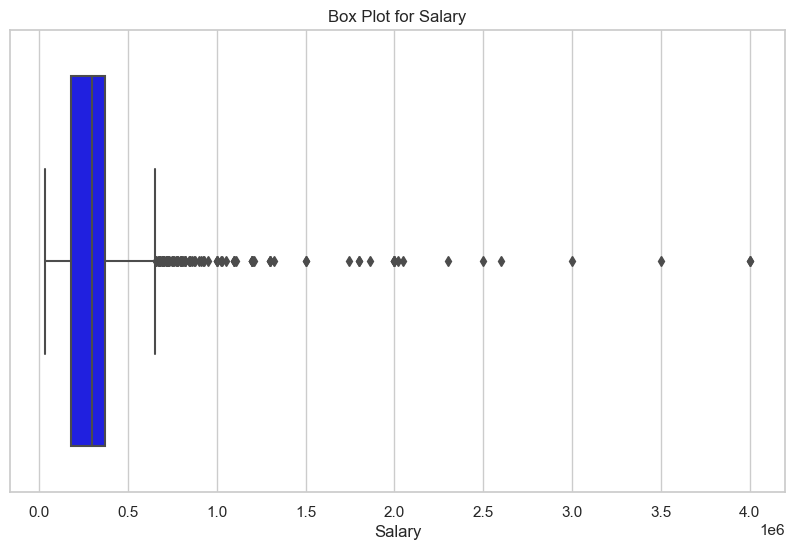

In [342]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', data=df,color="blue")
plt.title('Box Plot for Salary')
plt.show()

In [343]:
max_salary = df['Salary'].idxmax()
highest_salary = df.loc[max_salary, 'Salary']
salary_others= df.loc[max_salary, 'Designation']

print(f'Highest Salary: {highest_salary}')
print(f'Designation with Highest Salary: {salary_others}')

Highest Salary: 4000000
Designation with Highest Salary: senior software engineer


In [344]:
max_salary = df["Salary"].max()
print(f'Maximum Salary: {max_salary}')


Maximum Salary: 4000000


In [345]:
min_salary = df["Salary"].min()
print(f'minimum Salary:{min_salary}')

minimum Salary:35000


In [411]:
senior_software_engineer_count = df[df['Designation'] == 'senior software engineer'].shape[0]
print("Count of Senior Software Engineer:", senior_software_engineer_count)


Count of Senior Software Engineer: 72


In [413]:
senior_software_engineer_data = df[df['Designation'].str.lower() == 'senior software engineer'][['Designation', 'Salary']]
senior_software_engineer_data

Designation   Salary
3     senior software engineer  1100000
26    senior software engineer   345000
128   senior software engineer   675000
169   senior software engineer   275000
219   senior software engineer   510000
...                        ...      ...
3743  senior software engineer   395000
3798  senior software engineer   420000
3801  senior software engineer   240000
3863  senior software engineer   400000
3946  senior software engineer   650000

[72 rows x 2 columns]

# Bivariate analysis

# Gender vs Age

In [346]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [347]:
df['Age'] = 2015 - df['DOB'].dt.year 

In [348]:
df.columns

Index(['DataSource', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'YearsOfExperience',
       'EmploymentStatus', 'Job_Role', 'Age'],
      dtype='object')

In [349]:
df.groupby('Gender')['Age'].describe().round(3)

count    mean    std   min   25%   50%   75%   max
Gender                                                     
f        957.0  24.420  1.647  20.0  23.0  24.0  25.0  32.0
m       3041.0  24.621  1.801  18.0  23.0  24.0  26.0  38.0

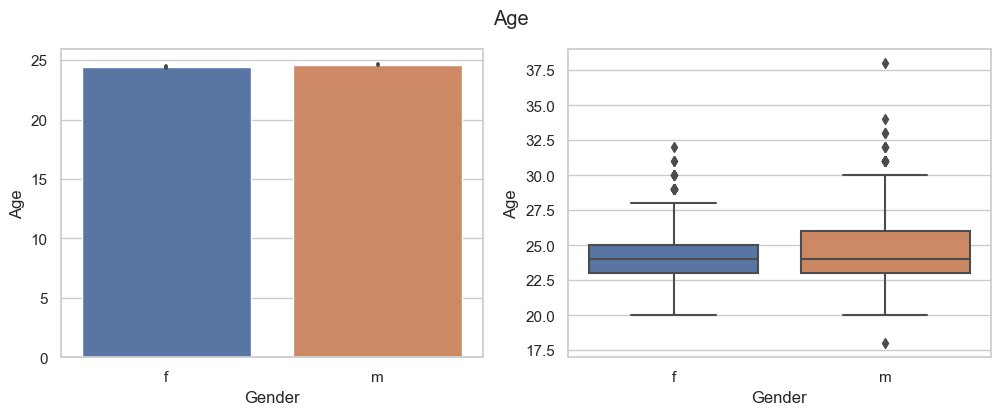

In [350]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Age', data=df, ax=ax1)
sns.boxplot(x='Gender', y='Age', data=df, ax=ax2)
plt.suptitle('Age')
plt.show()

### The age of both male and female are equally same their mean ages are also same

# Gender v/s Specialization

In [353]:
df["Specialization"].nunique()

46

In [354]:
df["Specialization"].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [355]:
specializations = [
    ('electronics|electrical|communication|computer|mechanical|system|instrumentation', 'engineering|eng|technology|communication|instrumentation|automation'),
    ('computer|information', 'science|engineering|technology|application|networking'),
    ('civil|industrial|automobile|aeronautical|polymer|bio|chemical|metallurgical|ceramic', 'engineering|technology')
]

choices = ['computer engineering', 'computer science', 'industrial engineering']

conditions = []

for spec in specializations:
    conditions.append((df['Specialization'].str.contains(spec[0]) & df['Specialization'].str.contains(spec[1])))

df['Specialty'] = np.select(conditions, choices, default='other')

df['Specialty'] = df['Specialty'].str.title()

df['Specialty'].value_counts(dropna=False)

Specialty
Computer Engineering      2964
Computer Science           935
Industrial Engineering      80
Other                       19
Name: count, dtype: int64

In [366]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Specialty'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Specialty'], margins=True).loc[['f', 'm'], 'All']
print('Female a`nd male Specialty counts')
crosstab

Female a`nd male Specialty counts


Specialty  Computer Engineering  Computer Science  Industrial Engineering  \
Gender                                                                      
f                           693               241                      22   
m                          2271               694                      58   

Specialty  Other  
Gender            
f              1  
m             18

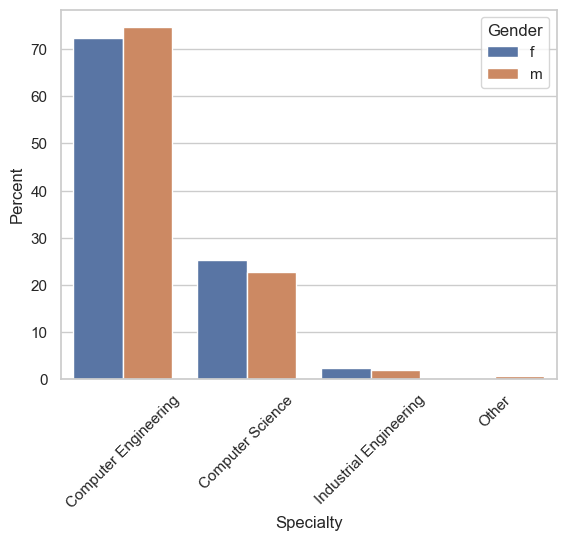

In [367]:
props = df.groupby('Gender', as_index=False)['Specialty'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Specialty'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.xticks(rotation=45)
plt.show()

## From the above graph the obervation is :
1.The male graduates prefer computer engineering more as their specialization than female

2.The female graduates prefer computer science more as their specialization than male

# Gender vs  10thGrade and 12thGrade

Overall marks obtained in 10th grade examinations


count  mean   std   min   25%   50%   75%   max
Gender                                                  
f        957.0  80.9   8.8  48.8  75.0  82.4  87.6  97.1
m       3041.0  77.0  10.0  43.0  70.7  78.0  85.0  97.8

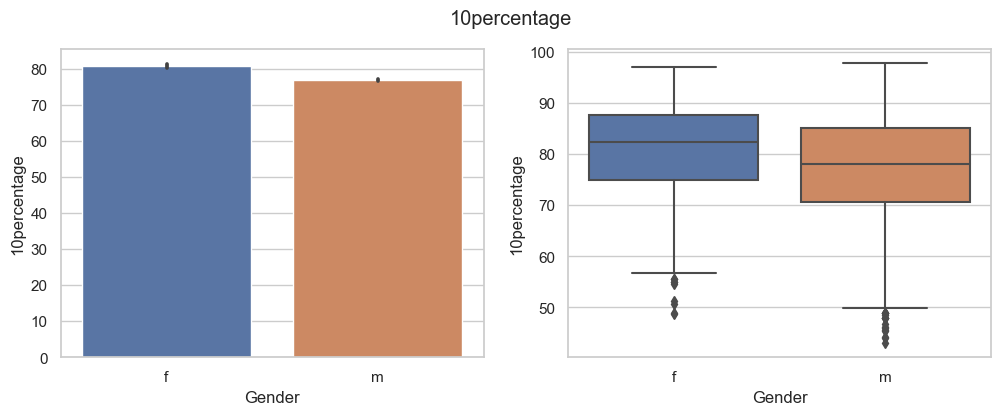


************************************************************

Overall marks obtained in 12th grade examinations


count  mean   std   min   25%   50%   75%   max
Gender                                                  
f        957.0  77.0  10.9  43.1  69.2  77.0  85.6  98.2
m       3041.0  73.7  10.9  40.0  65.2  73.4  81.8  98.7

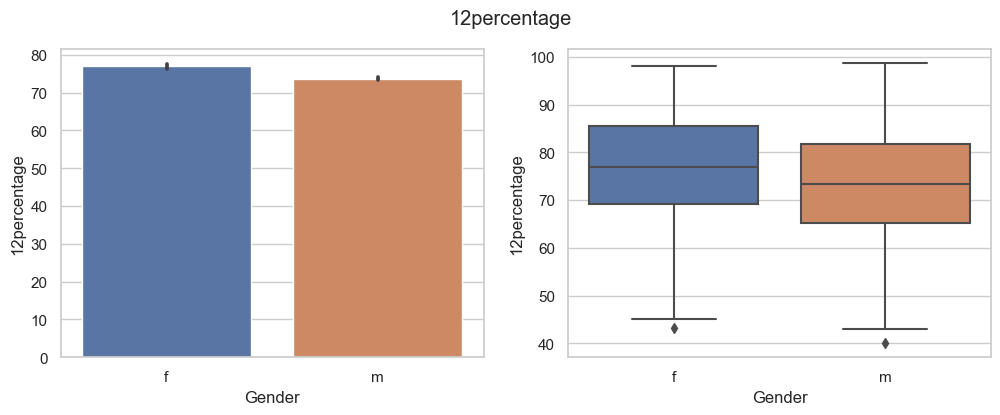

In [368]:
print('Overall marks obtained in 10th grade examinations')
display(df.groupby('Gender')['10percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='10percentage', data=df, ax=ax1)
sns.boxplot(x='Gender', y='10percentage', data=df, ax=ax2)
plt.suptitle('10percentage')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Overall marks obtained in 12th grade examinations')
display(df.groupby('Gender')['12percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='12percentage', data=df, ax=ax1)
sns.boxplot(x='Gender', y='12percentage', data=df, ax=ax2)
plt.suptitle('12percentage')
plt.show()

#### Females have obtained more grades or secured good grades as compared to mens

# Gender v/s collegeGPA

In [369]:
df.groupby('Gender')['collegeGPA'].describe()

count       mean       std   min    25%    50%    75%    max
Gender                                                               
f        957.0  74.048056  7.266736  9.30  70.00  74.00  78.15  99.93
m       3041.0  70.679947  8.269352  6.45  65.63  70.66  75.70  98.40

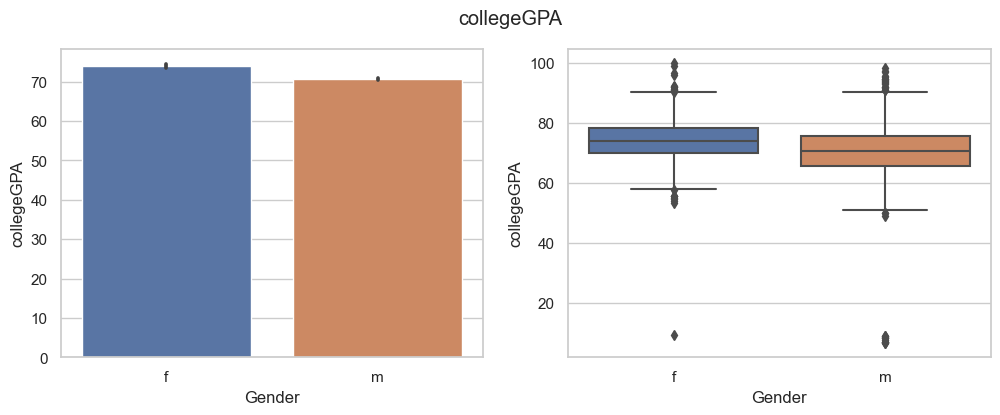

In [370]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='Gender', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('collegeGPA')
plt.show()

#### The women have higher college GPAs than men.

# Gender vs Degree

In [371]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Degree'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Degree'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Degree counts')
crosstab

Female and male Degree counts


Degree  B.Tech/B.E.  M.Sc. (Tech.)  M.Tech./M.E.  MCA
Gender                                               
f               889              1             9   58
m              2811              1            44  185

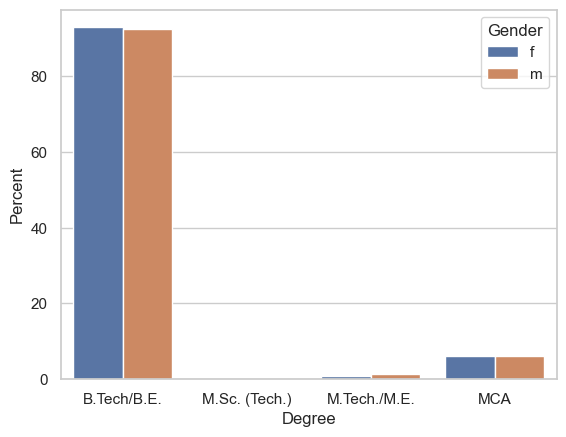

In [372]:
props = df.groupby('Gender', as_index=False)['Degree'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Degree'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.show()

### There is no difference between men and women in degrees obtained

# Gender vs Job

In [373]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Job_Role'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Job_Role'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Job counts')
crosstab

Female and male Job counts


Job_Role  Administrator  Analyst  Developer  Hardware Engineer  Manager  \
Gender                                                                    
f                    55      125        185                 64       29   
m                   142      286        568                402      131   

Job_Role  Other  Software Engineer  System Engineer  Test Engineer  
Gender                                                              
f           112                219              119             49  
m           301                722              358            131

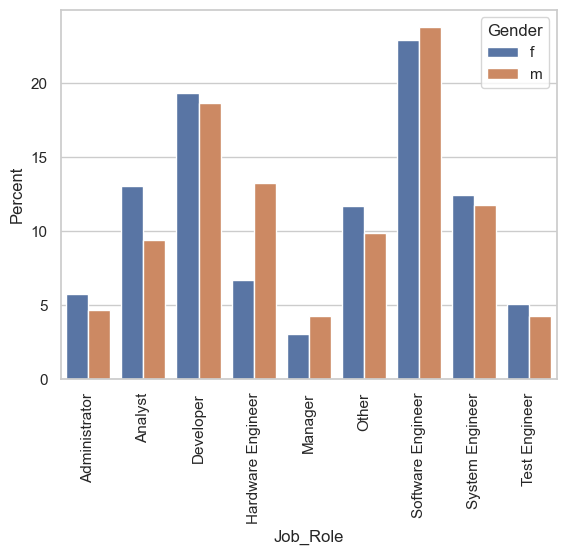

In [374]:
props = df.groupby('Gender', as_index=False)['Job_Role'].value_counts(normalize=True, sort=False)
props['proportion'] = props['proportion'] * 100
sns.barplot(x='Job_Role', y='proportion', data=props, hue='Gender')
plt.ylabel('Percent')
plt.xticks(rotation=90)
plt.show()

#### Female graduates are more likely than male graduates to work as analysts, while men are more likely to work as hardware engineers. In other positions, there is almost no gender difference.

# Gender vs Salary

In [375]:
df.groupby('Gender')['Salary'].describe()

count           mean            std      min       25%       50%  \
Gender                                                                      
f        957.0  294937.304075  191031.789503  35000.0  200000.0  300000.0   
m       3041.0  311716.211772  218999.537438  35000.0  180000.0  300000.0   

             75%        max  
Gender                       
f       355000.0  3500000.0  
m       380000.0  4000000.0

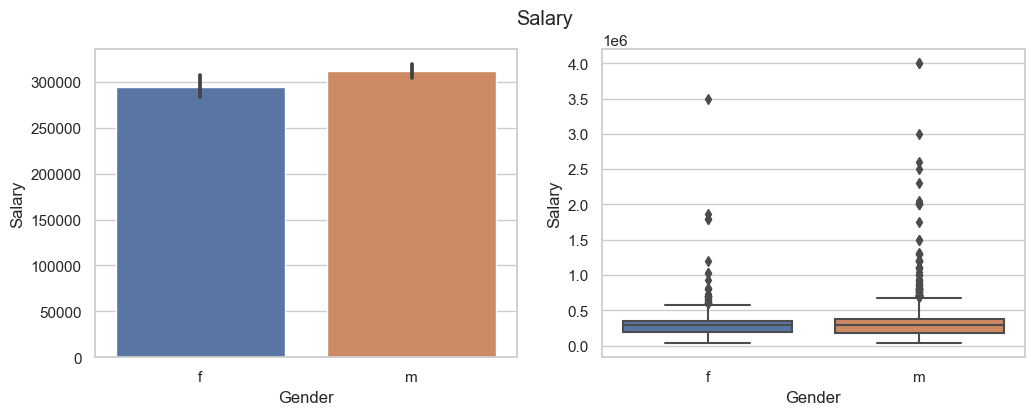

In [376]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Gender', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

#### There is a small difference in the mean salary between women and men, but it is hard to say whether this difference is significant.

# Gender vs AMCAT scores

English scores


count    mean     std    min    25%    50%    75%    max
Gender                                                           
f        957.0  501.91  100.66  250.0  430.0  500.0  570.0  870.0
m       3041.0  501.57  106.27  180.0  425.0  500.0  570.0  875.0

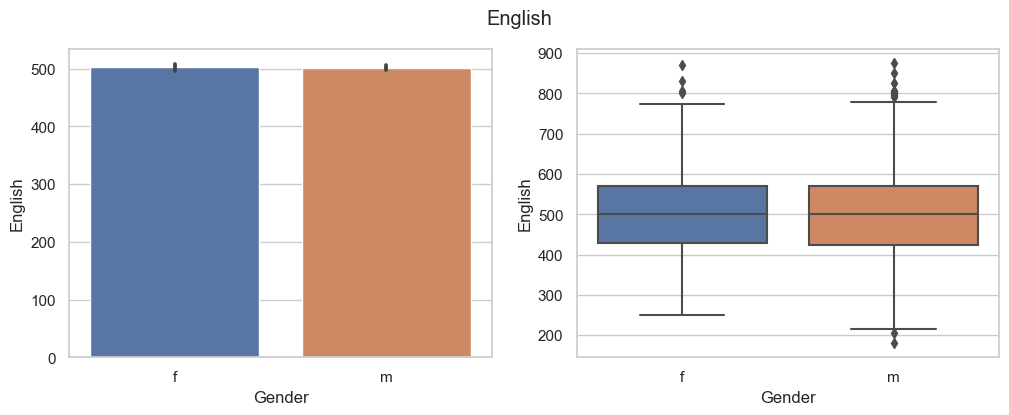

Logical scores


count    mean    std    min    25%    50%    75%    max
Gender                                                          
f        957.0  499.89  82.34  255.0  445.0  500.0  555.0  705.0
m       3041.0  502.14  88.14  195.0  445.0  505.0  565.0  795.0

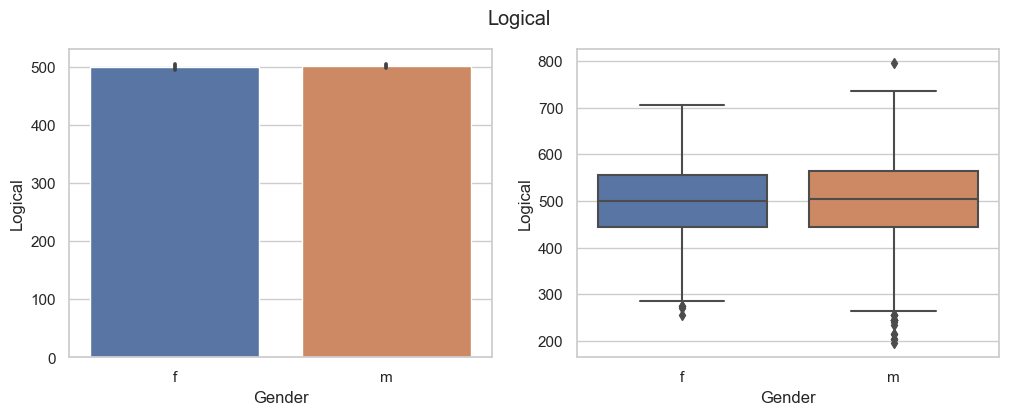

Quant scores


count    mean     std    min    25%    50%    75%    max
Gender                                                           
f        957.0  492.36  116.25  135.0  415.0  494.0  575.0  825.0
m       3041.0  519.99  123.43  120.0  435.0  525.0  605.0  900.0

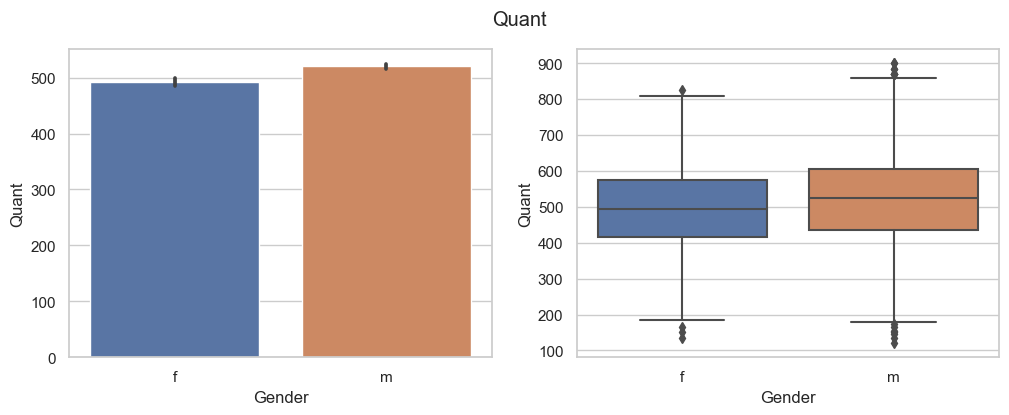

Domain scores


count  mean   std  min   25%   50%   75%  max
Gender                                                
f        957.0  0.57  0.29  0.0  0.36  0.62  0.82  1.0
m       3041.0  0.57  0.31  0.0  0.34  0.62  0.84  1.0

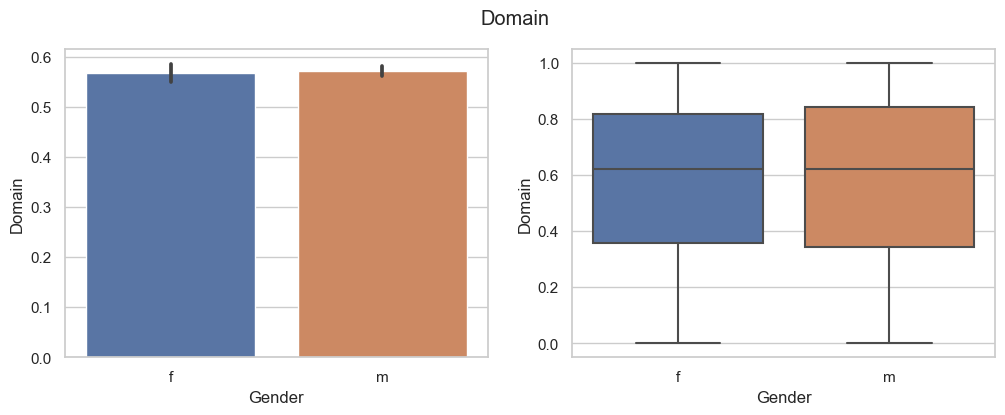

ComputerProgramming scores


count    mean     std  min    25%    50%    75%    max
Gender                                                         
f        957.0  362.72  185.32  0.0  335.0  415.0  475.0  745.0
m       3041.0  350.36  210.73  0.0  265.0  415.0  495.0  840.0

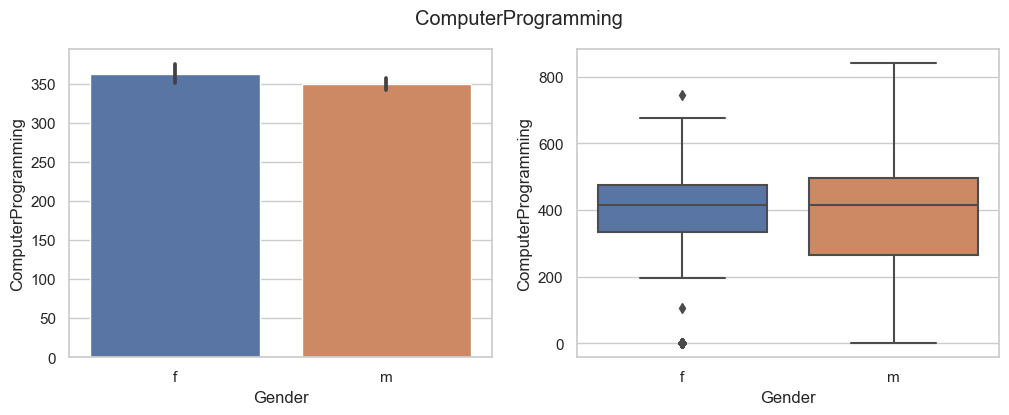

ElectronicsAndSemicon scores


count   mean     std  min  25%  50%    75%    max
Gender                                                    
f        957.0  92.51  153.97  0.0  0.0  0.0  233.0  612.0
m       3041.0  97.15  159.00  0.0  0.0  0.0  233.0  612.0

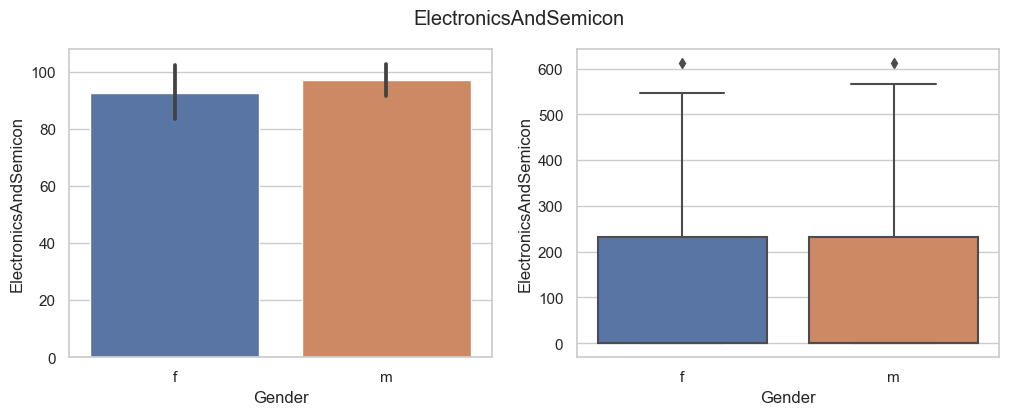

ComputerScience scores


count   mean     std  min  25%  50%  75%    max
Gender                                                  
f        957.0  92.27  173.98  0.0  0.0  0.0  0.0  715.0
m       3041.0  91.28  175.17  0.0  0.0  0.0  0.0  715.0

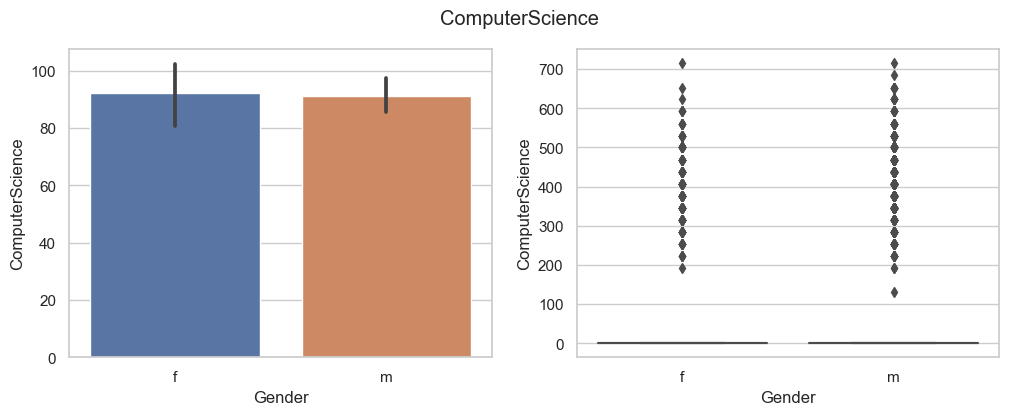

MechanicalEngg scores


count   mean     std  min  25%  50%  75%    max
Gender                                                  
f        957.0   7.44   56.17  0.0  0.0  0.0  0.0  606.0
m       3041.0  29.10  107.22  0.0  0.0  0.0  0.0  623.0

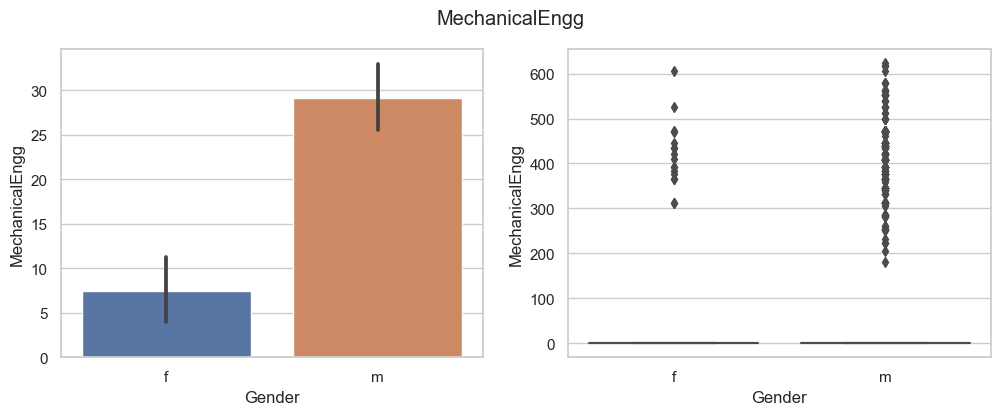

ElectricalEngg scores


count   mean    std  min  25%  50%  75%    max
Gender                                                 
f        957.0  13.04  75.10  0.0  0.0  0.0  0.0  633.0
m       3041.0  18.82  90.89  0.0  0.0  0.0  0.0  676.0

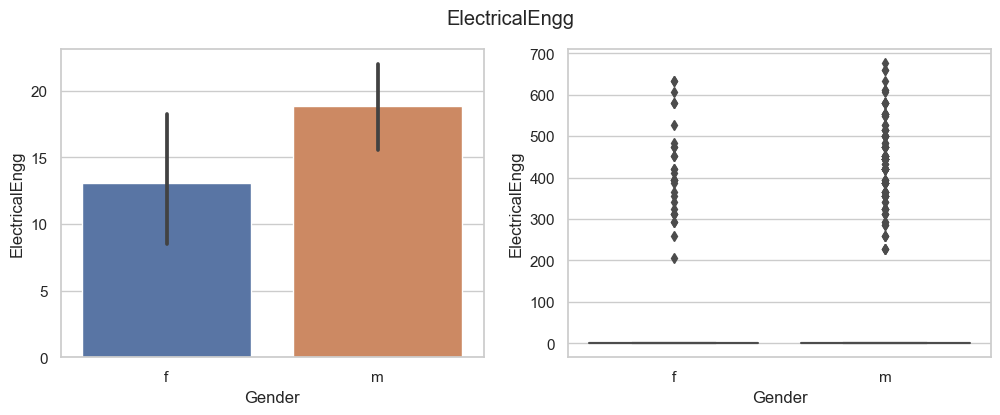

TelecomEngg scores


count   mean     std  min  25%  50%  75%    max
Gender                                                  
f        957.0  35.14  108.82  0.0  0.0  0.0  0.0  526.0
m       3041.0  32.01  103.20  0.0  0.0  0.0  0.0  548.0

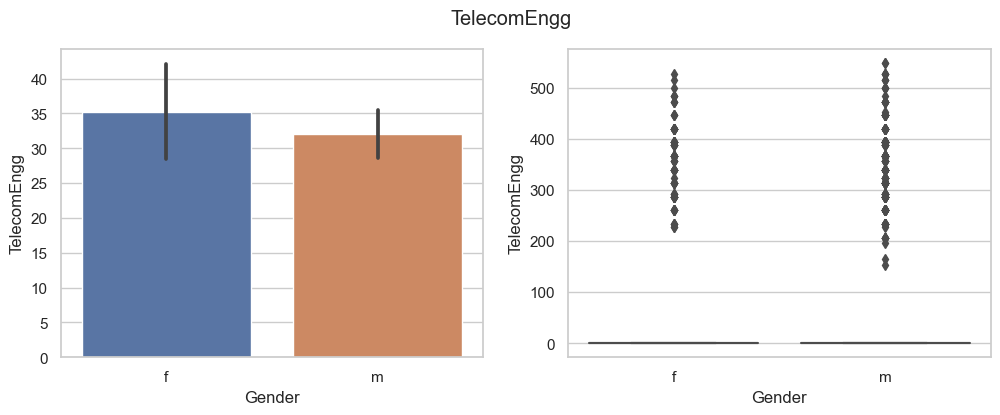

CivilEngg scores


count  mean    std  min  25%  50%  75%    max
Gender                                                
f        957.0  2.83  33.44  0.0  0.0  0.0  0.0  500.0
m       3041.0  3.94  37.49  0.0  0.0  0.0  0.0  516.0

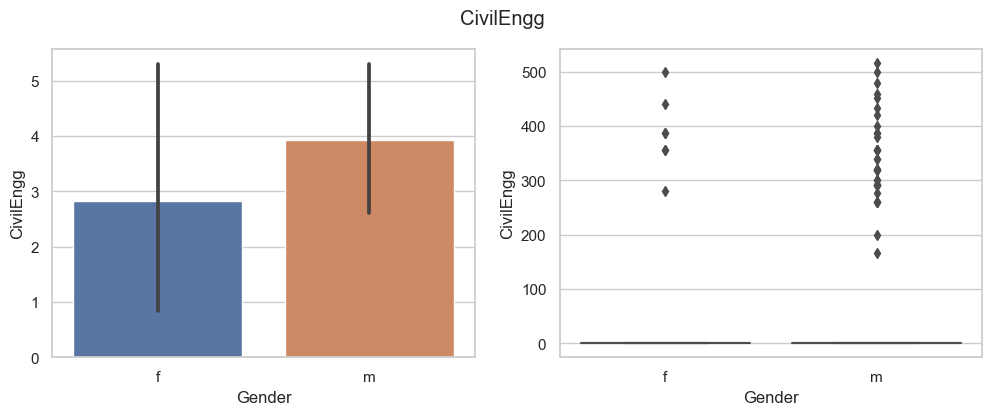

In [377]:
for col in scores:
  print(f'{col} scores')
  display(df.groupby('Gender')[col].describe().round(2))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=df, ax=ax1)
  sns.boxplot(x='Gender', y=col, data=df, ax=ax2)
  plt.suptitle(col)
  plt.show()

#### In the sections of English, Logical, Quantitative, Domain, Computer Programming, Electronics and Semiconductor Engineering, Computer Science, Mechanical Engineering, and Telecommunication Engineering, the differences in scores between genders are minor. In Civil Engineering, women outperform men, whereas men tend to excel in Electrical Engineering.

conscientiousness standardized scores


count  mean  std  min  25%  50%  75%  max
Gender                                            
f        953.0   0.1  0.9 -2.9 -0.4  0.3  0.8  2.0
m       3015.0  -0.1  1.0 -2.9 -0.7 -0.0  0.7  2.0

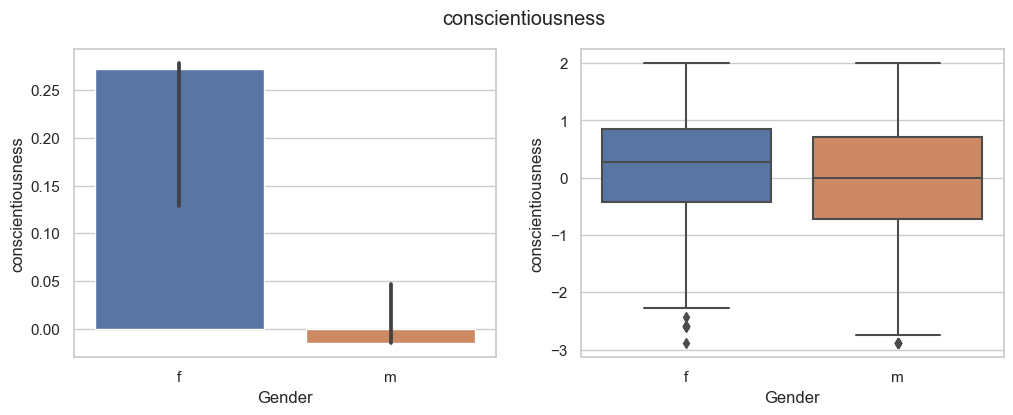

agreeableness standardized scores


count  mean  std  min  25%  50%  75%  max
Gender                                            
f        950.0   0.3  0.8 -3.0 -0.1  0.4  0.9  1.9
m       3015.0   0.1  0.9 -3.0 -0.4  0.2  0.7  1.9

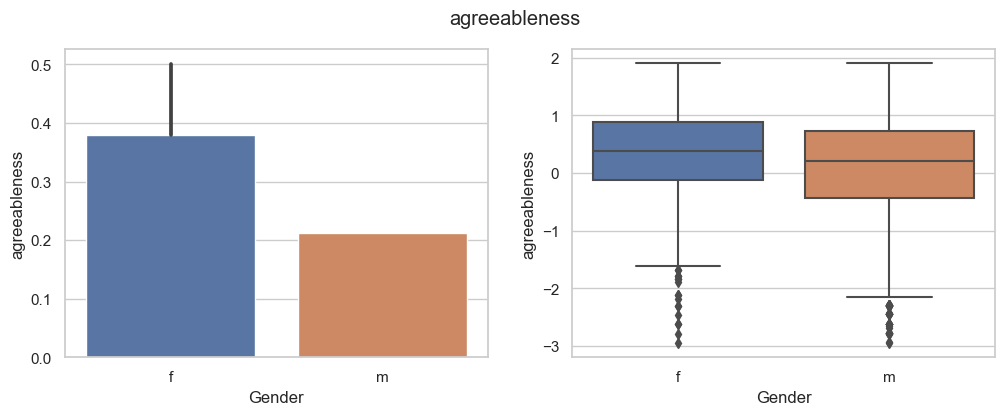

extraversion standardized scores


count  mean  std  min  25%  50%  75%  max
Gender                                            
f        952.0   0.0  0.9 -3.0 -0.6  0.1  0.7  2.2
m       3027.0   0.0  0.9 -2.9 -0.6  0.1  0.7  2.5

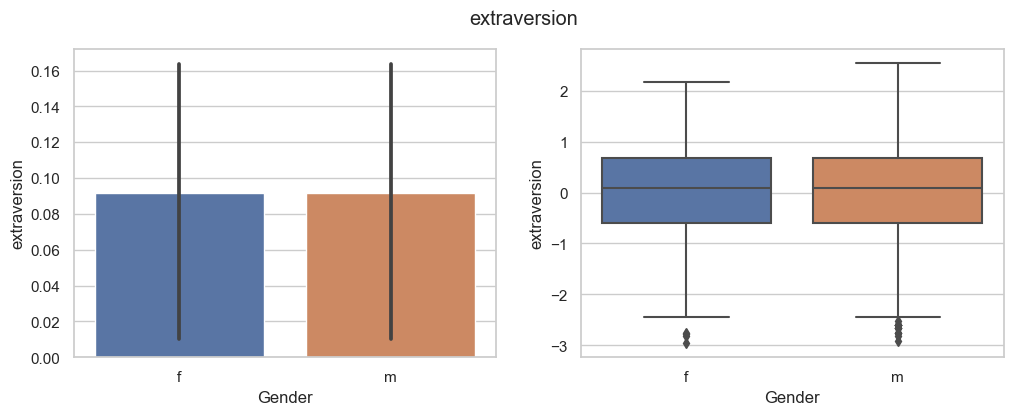

nueroticism standardized scores


count  mean  std  min  25%  50%  75%  max
Gender                                            
f        957.0  -0.2  1.0 -2.6 -0.9 -0.2  0.5  2.8
m       3041.0  -0.2  1.0 -2.6 -0.9 -0.2  0.5  3.4

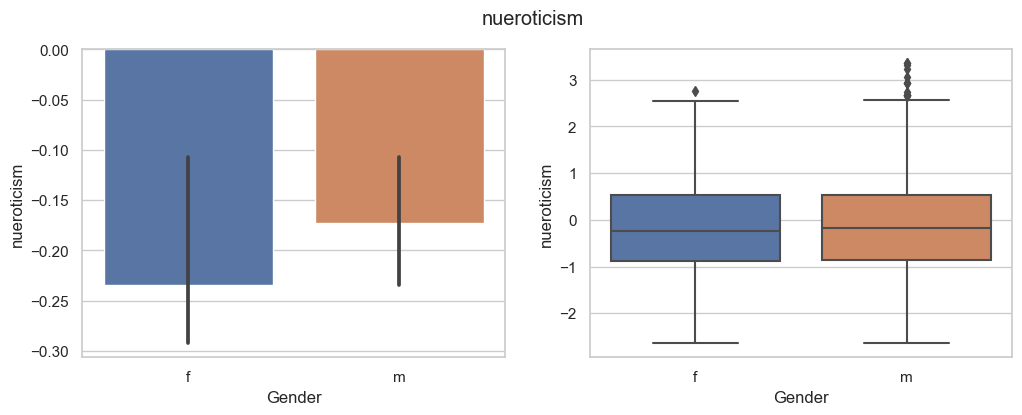

openess_to_experience standardized scores


count  mean  std  min  25%  50%  75%  max
Gender                                            
f        946.0   0.1  0.8 -3.0 -0.4  0.2  0.7  1.8
m       3006.0  -0.1  0.9 -3.0 -0.7 -0.1  0.5  1.6

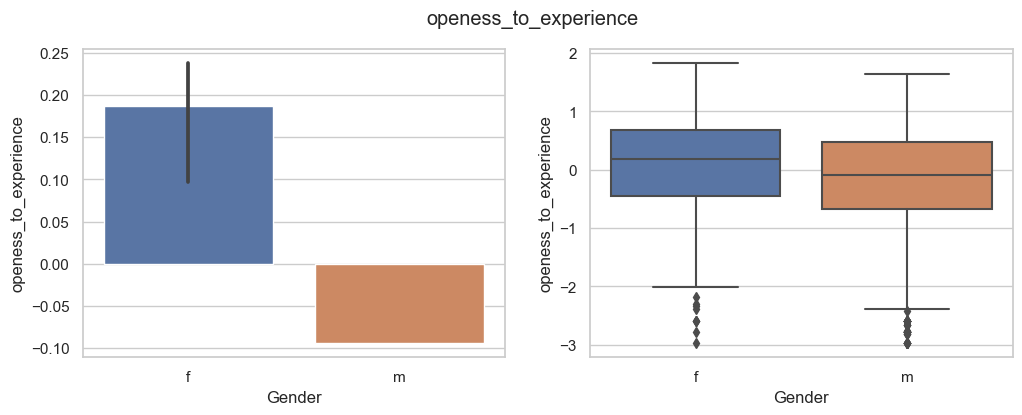

In [378]:
for col in standard_scores:
  df_cleaned = df[df[col] >= -3]
  print(f'{col} standardized scores')
  display(df_cleaned.groupby('Gender')[col].describe().round(1))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=df_cleaned, estimator='median', ax=ax1)
  sns.boxplot(x='Gender', y=col, data=df_cleaned, ax=ax2)
  plt.suptitle(col)
  plt.show()

#### Women tend to score higher on personality tests such as conscientiousness, agreeableness, and openness to experience.

# CollegeTier vs CollegeGPA

In [379]:
df.groupby('CollegeTier')['collegeGPA'].describe()

count       mean       std   min    25%    50%    75%    max
CollegeTier                                                               
1             297.0  73.987845  9.503475  8.58  69.40  74.30  79.29  99.93
2            3701.0  71.285415  8.018223  6.45  66.02  71.36  76.08  99.00

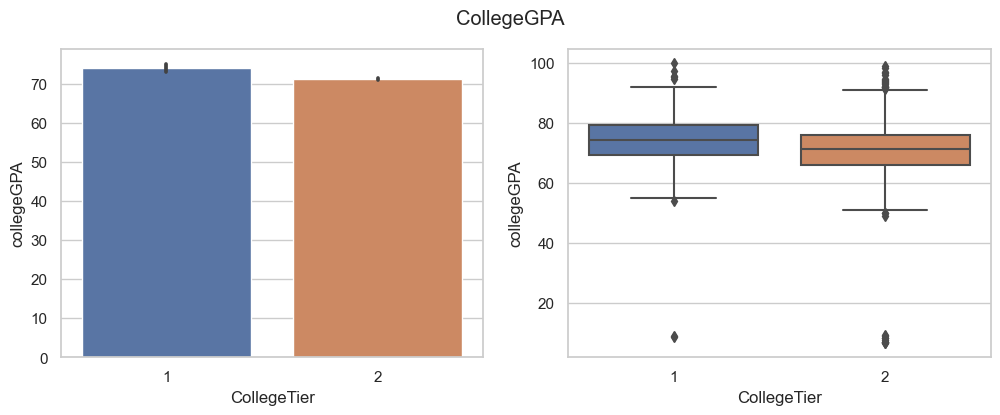

In [380]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('CollegeGPA')
plt.show()

#### Graduates from Tier 1 colleges have higher average grades.

# Salary v/s Specialty

In [381]:
order = df.groupby('Specialty')['Salary'].mean().sort_values().index

df.groupby('Specialty')['Salary'].describe().round(1).sort_values('mean')

count      mean       std       min       25%  \
Specialty                                                                
Other                     19.0  256842.1  142294.8   40000.0  137500.0   
Computer Science         935.0  300625.7  217044.6   35000.0  180000.0   
Computer Engineering    2964.0  309470.0  212548.7   35000.0  195000.0   
Industrial Engineering    80.0  336875.0  177780.6  100000.0  195000.0   

                             50%       75%        max  
Specialty                                              
Other                   240000.0  355000.0   600000.0  
Computer Science        300000.0  380000.0  4000000.0  
Computer Engineering    300000.0  365000.0  4000000.0  
Industrial Engineering  320000.0  400000.0   800000.0

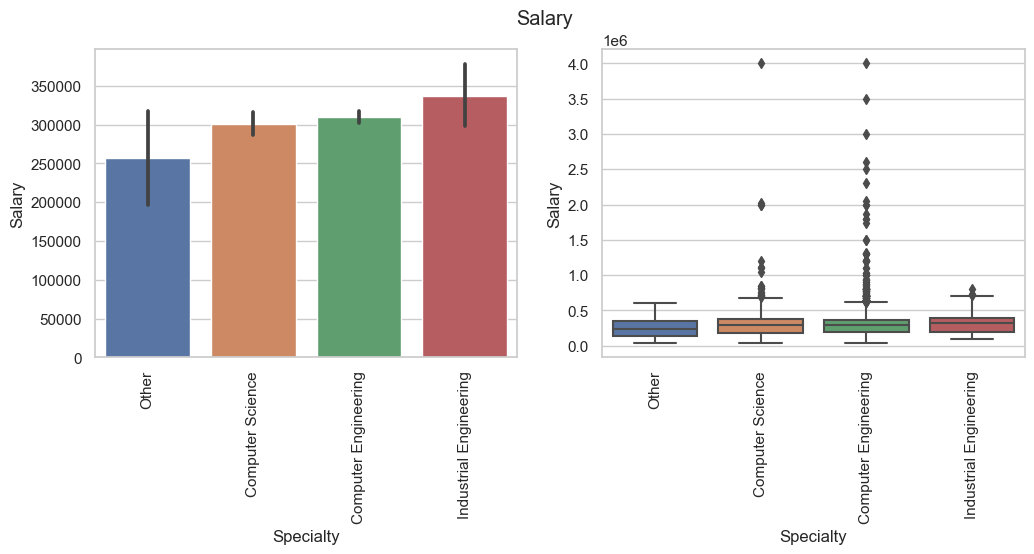

In [382]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Specialty', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Specialty', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.suptitle('Salary')
plt.show()

### The students who have graduated having specialization in Industrial Engineering earn more as compared to Computer Science Engineer.

# "Salary" vs "Job"

In [383]:
order = df.groupby('Job_Role')['Salary'].mean().sort_values().index

df.groupby('Job_Role')['Salary'].describe().round(1).sort_values('mean')

count      mean       std      min       25%       50%  \
Job_Role                                                                    
Administrator      197.0  230177.7  120526.5  60000.0  150000.0  200000.0   
Other              413.0  247046.0  230031.4  40000.0  145000.0  200000.0   
Developer          753.0  267994.7  221494.3  35000.0  135000.0  240000.0   
Hardware Engineer  466.0  291083.7  172999.6  50000.0  180000.0  265000.0   
Analyst            411.0  317335.8  158333.6  50000.0  205000.0  305000.0   
Test Engineer      180.0  329022.2  314984.9  60000.0  180000.0  310000.0   
Software Engineer  941.0  348512.2  223980.5  50000.0  240000.0  315000.0   
System Engineer    477.0  355167.7  176861.3  35000.0  315000.0  330000.0   
Manager            160.0  364687.5  225009.2  50000.0  210000.0  312500.0   

                        75%        max  
Job_Role                                
Administrator      255000.0   910000.0  
Other              280000.0  2000000.0  
Developer          340000.0  3000000.0  
Hardware Engineer  355000.0  1860000.0  
Analyst            360000.0  2020000.0  
Test Engineer      400000.0  4000000.0  
Software Engineer  400000.0  4000000.0  
System Engineer    415000.0  3500000.0  
Manager            442500.0  1320000.0

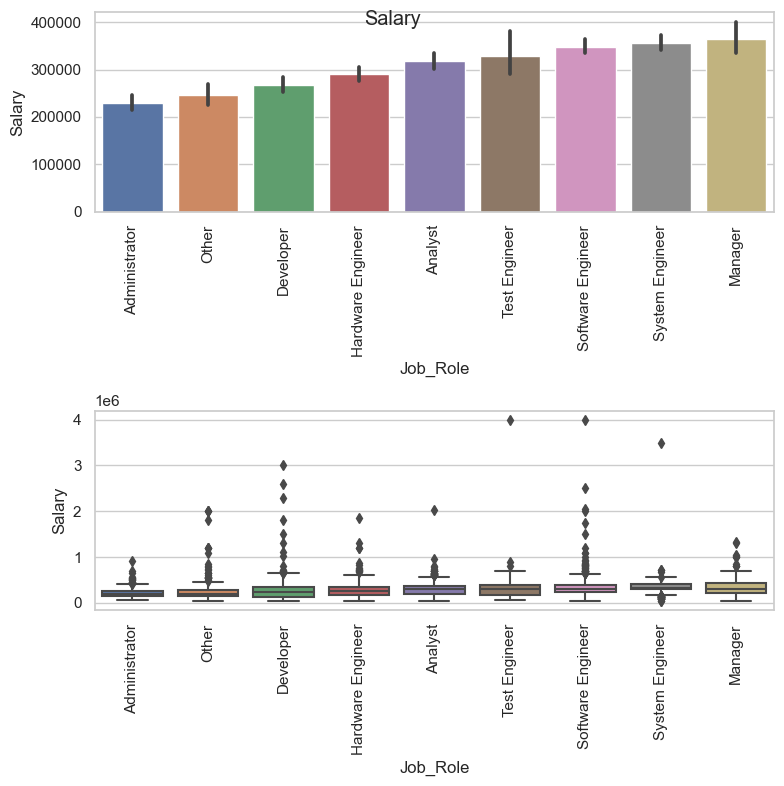

In [384]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()

#### Managers and system, software, and test engineers earn the highest salaries.

In [385]:
df.groupby('CollegeTier')['Salary'].describe()

count           mean            std       min       25%  \
CollegeTier                                                             
1             297.0  442356.902357  312169.285374  100000.0  315000.0   
2            3701.0  296893.812483  198800.849194   35000.0  180000.0   

                  50%       75%        max  
CollegeTier                                 
1            360000.0  500000.0  4000000.0  
2            300000.0  360000.0  4000000.0

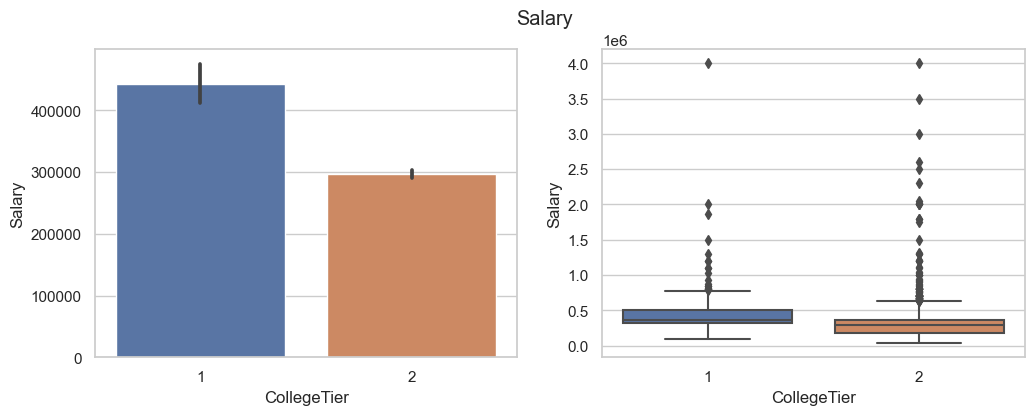

In [386]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='Salary', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

#### The student who have complerted their studies from Tier1 college is more likely to get good salary as coompared to the tIER2 student .

# Salary v/s Age

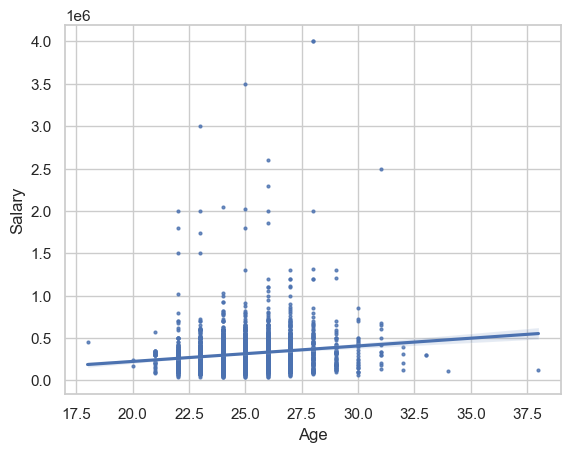

In [387]:
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'s':4})
plt.show()

# `Salary vs YearsOfExperience

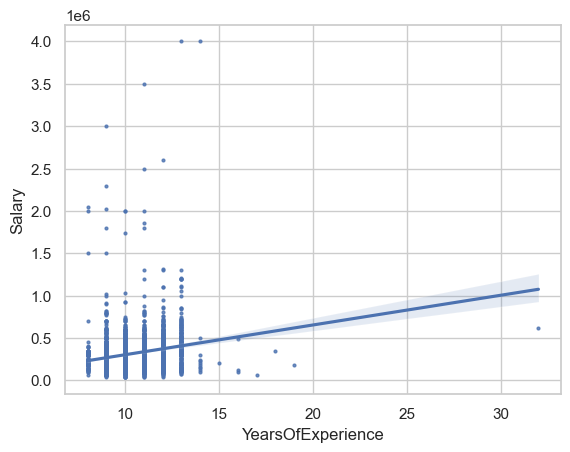

In [388]:
sns.regplot(x='YearsOfExperience', y='Salary', data=df, scatter_kws={'s':4})
plt.show()

In [389]:
df

DataSource      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01       Not Applicable   
1         train  579905   500000 2013-09-01       Not Applicable   
2         train  810601   325000 2014-06-01       Not Applicable   
3         train  267447  1100000 2011-07-01       Not Applicable   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01       Not Applicable   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01       Not Applicable   

                   Designation           JobCity Gender        DOB  \
0                        Other         Bangalore      f 1990-02-19   
1                        Other            Indore      m 1989-10-04   
2             systems engineer           Chennai      f 1992-08-03   
3     senior software engineer           Gurgaon      m 1989-12-05   
4                        Other           Manesar      m 1991-02-27   
...                        ...               ...    ...        ...   
3993         software engineer        New Delhi       m 1987-04-15   
3994                     Other         Hyderabad      f 1992-08-27   
3995                     Other         Bangalore      m 1991-07-03   
3996        software developer  Asifabadbanglore      f 1992-03-20   
3997                     Other           Chennai      f 1991-02-26   

      10percentage  ... conscientiousness  agreeableness  extraversion  \
0            84.30  ...            0.9737         0.8128        0.5269   
1            85.40  ...           -0.7335         0.3789        1.2396   
2            85.00  ...            0.2718         1.7109        0.1637   
3            85.60  ...            0.0464         0.3448       -0.3440   
4            78.00  ...           -0.8810        -0.2793       -1.0697   
...            ...  ...               ...            ...           ...   
3993         52.09  ...           -0.1082         0.3448        0.2366   
3994         90.00  ...           -0.3027         0.8784        0.9322   
3995         81.86  ...           -1.5765        -1.5273       -1.5051   
3996         78.72  ...           -0.1590         0.0459       -0.4511   
3997         70.60  ...           -1.1128        -0.2793       -0.6343   

     nueroticism  openess_to_experience  YearsOfExperience EmploymentStatus  \
0        1.35490                -0.4455                 11          Present   
1       -0.10760                 0.8637                 10          Present   
2       -0.86820                 0.6721                  9          Present   
3       -0.40780                -0.9194                 12          Present   
4        0.09163                -0.1295                  9             Left   
...          ...                    ...                ...              ...   
3993     0.64980                -0.9194                 12             Left   
3994     0.77980                -0.0943                 10             Left   
3995    -1.31840                -0.7615                 10          Present   
3996    -0.36120                -0.0943                  9             Left   
3997     1.32553                -0.6035                 11          Present   

               Job_Role  Age             Specialty  
0         Test Engineer   25  Computer Engineering  
1               Manager   26  Computer Engineering  
2       System Engineer   23      Computer Science  
3     Software Engineer   26  Computer Engineering  
4                 Other   24  Computer Engineering  
...                 ...  ...                   ...  
3993  Software Engineer   28      Computer Science  
3994              Other   23  Computer Engineering  
3995  Software Engineer   24  Co

In [390]:
df["Job_Role"].unique()

array(['Test Engineer', 'Manager', 'System Engineer', 'Software Engineer',
       'Other', 'Hardware Engineer', 'Developer', 'Analyst',
       'Administrator'], dtype=object)

In [391]:
df["Designation"].unique()

array(['Other', 'systems engineer', 'senior software engineer',
       'system engineer', 'java software engineer', 'project engineer',
       'software engineer', 'programmer analyst', 'software developer',
       'technical support engineer', 'software test engineer'],
      dtype=object)

In [392]:
filtered_df = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
filtered_df

DataSource       ID  Salary        DOJ                  DOL  \
19        train   466888  325000 2014-09-01       Not Applicable   
20        train   140069  320000 2010-11-01  2012-09-01 00:00:00   
21        train   339689  200000 2012-08-01  2013-12-01 00:00:00   
24        train   963123  335000 2014-06-01  2015-06-01 00:00:00   
31        train  1094324  340000 2014-08-01  2015-04-01 00:00:00   
...         ...      ...     ...        ...                  ...   
3979      train   212055  550000 2013-07-01  2014-04-01 00:00:00   
3981      train  1077872  220000 2014-09-01       Not Applicable   
3984      train   305041  480000 2011-12-01       Not Applicable   
3989      train  1204604  300000 2014-09-01       Not Applicable   
3993      train    47916  280000 2011-10-01  2012-10-01 00:00:00   

             Designation     JobCity Gender        DOB  10percentage  ...  \
19     software engineer        Pune      f 1990-11-30         79.00  ...   
20     software engineer   Bangalore      f 1988-07-25         91.20  ...   
21     software engineer           0      f 1991-08-20         75.67  ...   
24    programmer analyst   Hyderabad      m 1993-06-28         88.00  ...   
31     software engineer   Bangalore      m 1992-10-23         77.20  ...   
...                  ...         ...    ...        ...           ...  ...   
3979   software engineer   Bangalore      m 1989-07-22         69.16  ...   
3981   software engineer     Gurgaon      m 1991-12-17         53.40  ...   
3984   software engineer     Gurgaon      f 1990-01-18         89.80  ...   
3989   software engineer   Bangalore      m 1991-11-23         74.88  ...   
3993   software engineer  New Delhi       m 1987-04-15         52.09  ...   

     conscientiousness  agreeableness  extraversion nueroticism  \
19              0.8192         0.2668       -0.2714    -0.40780   
20             -0.1082         0.9688        0.5269    -0.29020   
21             -1.0355        -0.5913       -1.3599     0.06223   
24              0.4155         0.8027        0.1357    -0.99500   
31             -0.0154         1.2114        1.0859    -1.50210   
...                ...            ...           ...         ...   
3979           -0.5719         0.5008       -0.4891     0.41480   
3981            0.1282        -0.2871       -0.1437    -1.12180   
3984           -0.2628         0.1888        0.3817    -0.29020   
3989            0.1282         0.0459        1.2396     1.03330   
3993           -0.1082         0.3448        0.2366     0.64980   

      openess_to_experience  YearsOfExperience EmploymentStatus  \
19                  -0.1295                  9          Present   
20                   0.3444                 13             Left   
21                  -1.3539                 11             Left   
24                  -0.6692                  9             Left   
31                   0.2889                  9             Left   
...                     ...                ...              ...   
3979                -1.2354                 10             Left   
3981                 1.4386                  9          Present   
3984                 1.6082                 12          Present   
3989                 0.6721                  9          Present   
3993                -0.9194                 12             Left   

               Job_Role  Age             Specialty  
19    Software Engineer   25  Computer Engineering  
20    Software Engineer   27  Computer Engineering  
21    Software Engineer   24      Computer Science  
24              Analyst   22  Computer Engineering  
31    Software Engineer   23  Computer Engineering  
...                 ...  ...                   ...  
3979  Software Engineer   26  Computer Engineering  
3981  Software Engineer   24  Computer Engineering  
3984  Software Engineer   25  Computer Engineering  
3989  Software Engineer   24  Computer Engineering  
3993  Software Engineer   28      Computer Science  

[678 rows x 44 c

# Research Question
# After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate

# Relation between Salary and Job_Role

In [393]:
average_salary = filtered_df['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

The average salary for these roles is: 340921.82890855457


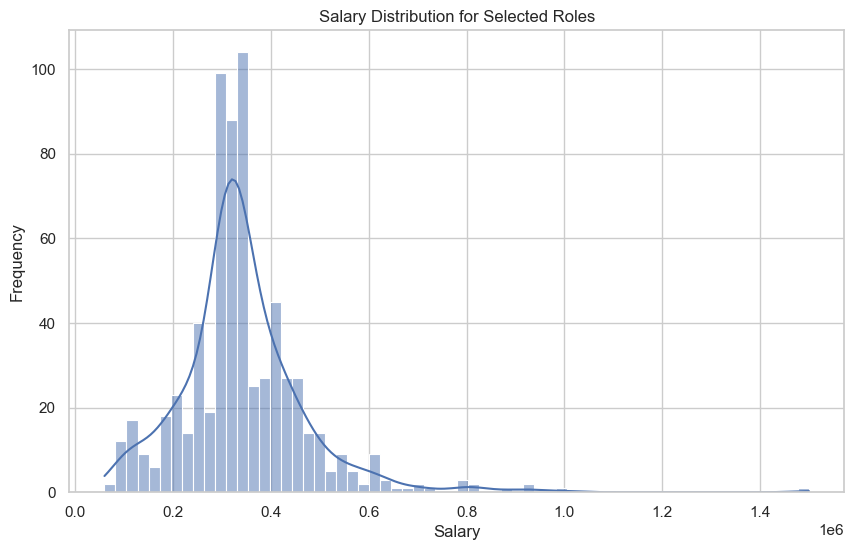

In [394]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [395]:
max_salary = filtered_df['Salary'].max()

In [396]:
if max_salary >= 250000 and max_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.


In [397]:
avg_salary=filtered_df['Salary'].mean()
avg_salary

340921.82890855457

In [398]:
if avg_salary >= 250000 and avg_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.


### Again we can prove it with the help of Inferential stats that The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.

In [402]:
from scipy.stats import zscore

filtered_df = filtered_df[zscore(filtered_df['Salary']) < 3]

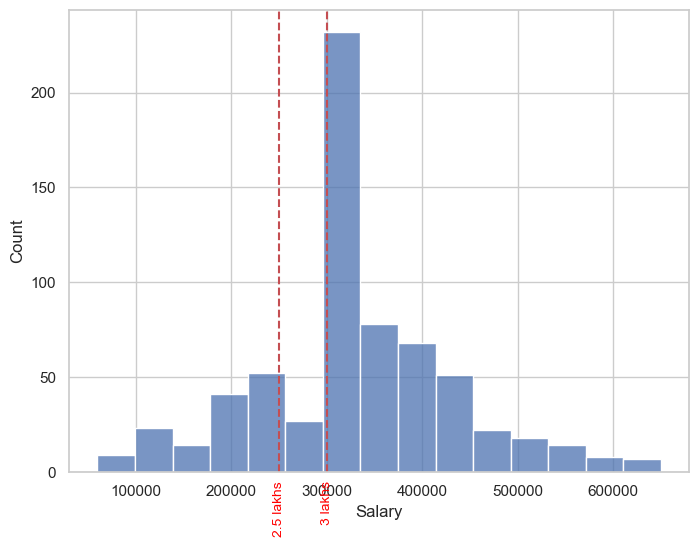

In [403]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(filtered_df['Salary'], bins=15)
ax.axvline(250000, ls='--', color='r')
ax.axvline(300000, ls='--', color='r')
ax.text(250000, -5, "2.5 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
ax.text(300000, -5, "3 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
plt.show()

# Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

# Gender v/s Specialization

In [404]:
pd.crosstab(index=df['Gender'], columns=df['Specialty'])

Specialty  Computer Engineering  Computer Science  Industrial Engineering  \
Gender                                                                      
f                           693               241                      22   
m                          2271               694                      58   

Specialty  Other  
Gender            
f              1  
m             18

### To ascertain if there's a difference in specialization preferences between men and women, we can employ the chi-square test. This test requires that all observed frequencies are no less than 5. Consequently, we should exclude the "Other" specialty.

We will conduct the test at a significance level of 0.05.

In [405]:
from scipy.stats import chi2_contingency

gen_spec_df = df[df['Specialty'] != 'Other']
cont_tab = pd.crosstab(index=gen_spec_df['Gender'], columns=gen_spec_df['Specialty'])
chi2 = chi2_contingency(cont_tab, correction=False)
print("statistic:", chi2.statistic)
print("p-value:", chi2.pvalue)

statistic: 2.7730043106374227
p-value: 0.24994805684722468


### The p-value of the statistic is greater than the significance level, indicating that the variables are independent. Hence, there's no association between gender and specialization.

### Is there a relationship between gender and salary?

In [406]:
df.groupby('Gender')['Salary'].describe()

count           mean            std      min       25%       50%  \
Gender                                                                      
f        957.0  294937.304075  191031.789503  35000.0  200000.0  300000.0   
m       3041.0  311716.211772  218999.537438  35000.0  180000.0  300000.0   

             75%        max  
Gender                       
f       355000.0  3500000.0  
m       380000.0  4000000.0

### At first glance, it would appear that men and women earn the same amount of money.

### Given that the salary variable is not normally distributed, a non-parametric test should be used to check the hypothesis that men and women earn equal amounts of money.

### The test's significance level will be set at 0.05.

In [407]:
from scipy.stats import mannwhitneyu

fem_sal = df[df['Gender'] == 'f']['Salary']
mal_sal = df[df['Gender'] == 'm']['Salary']

u_stat, p_value = mannwhitneyu(fem_sal, mal_sal, alternative='less')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 1400518.5
p-value: 0.03969567110195918


##### Surprisingly, there is a significant difference between men's and women's incomes. Women earn slightly less than men.

In [408]:
df.to_csv("AMEO.csv",index=False)

In [409]:
* To ascertain if there's a difference in specialization preferences between men and women, we can employ the chi-square test. This test requires that all observed frequencies are no less than 5. Consequently, we should exclude the "Other" specialty.

* We will conduct the test at a significance level of 0.05.

SyntaxError: unterminated string literal (detected at line 1) (3870961726.py, line 1)